# Ejemplo práctico: estimación de la precipitación en el valle de México usando datos de pluviómetros y radar meteorológico.

Autores: Daniel Vázquez-Ramírez$^{(1)}$ , Martín Díaz-Viera$^{(2)}$, Van Huong Le$^{(1)}$

1) Posgrado en Ciencias de la Tierra (UNAM)
2) Instituto Mexicano del Petróleo





# Introducción.
El siguiente ejemplo forma parte del artículo publicado por (Diaz,Et.Al,2009), donde se presenta una modificación del procedimiento geoestadístico de estimación espacial de la precipitación introducido por Krajewski (1987), el cual aplica el método de cokriging ordinario, combinando imágenes de radar meteorológico con datos de pluviómetros. Aquí, a diferencia del procedimiento de Krajewski, se incluye en el método de cokriging ordinario la dependencia espacial conjunta de radar-pluviómetros mediante un modelo de corregionalización lineal. La metodología propuesta es probada usando datos de pluviógrafos y de radar de una tormenta ocurrida en el valle de la ciudad de México.

## Abrir el proyecto en R Studio.

El proyecto precargado lo pueden descargar en la página del curso http://www.esmg-mx.org/activities/courses/geoestadistica. Para el análisis exploratorio descargamos la Clase Práctica 1: Análisis Exploratorio de Datos. Se descomprime el archivo y podemos ver que el proyecto se compone de un conjunto de carpetas; la carpeta "Functions" donde encontraran las funciones que usaremos durante la clase práctica y la carpeta "Scripts" donde encontrarán los archivos "Getting_Started_script.R" y "00 Lluvia_AED_2D.R". El primer script contiene las instrucciones para definir directorios, instalar los paquetes, cargar librerías y funciones, el segundo script contiene las instrucciones del ejemplo para hacer el análisis exploratorio. Les recomendamos que el archivo "lluvia.txt" lo guarden en la carpeta "Data".

Para abrir el proyecto en R Studio deben dar doble clic en "RGeoestad_2D_Vacio.Rproj".

![carpetas.png](images/carpetas.png)
NOTA: es importante que el proyecto se abra usando "RGeoestad_2D_Vacio.Rproj", si abren solo los scripts no podrán acceder a los directorios.

## Carga de bibliotecas y funciones.

Para obtener la estimación espacial debemos instalar en R Studio los siguientes paquetes: Rcpp, maps, mapproj, actuar, fields, fitdistrplus, geoR, gstat, MASS, moments, poweRlaw, RFOC, spatstat, ADGofTest, reshape, sp. 

Hay dos formas de instalar estos paquetes: la primera opción es ir a la barra de menús en la interfaz de R Studio, dar click en tools>install Packages.  En el renglón Packages pondrán los nombres de los paquetes separados por coma y después dan click en install (Para mayores detalles sobre como instalar Las bibliotecas use el siguiente link https://www.esmg-mx.org/media/courses/geoestadistica/practicas/R_and_Rstudio_Instalation.pdf).

![packages.png](images/packages.png)

La segunda opción es usando scripts, para eso abrimos el script "Getting_Started_script.R" y ejecutar las siguientes lineas.

In [ ]:
root_dir<-getwd()

#install_dir- installation directory

install_dir<-paste(root_dir,"/Installation",sep="")

setwd(install_dir)

install.packages("Rcpp")
install.packages("maps")
install.packages("mapproj")
install.packages("actuar")
install.packages("fields")
install.packages("fitdistrplus")
install.packages("gstat")
install.packages("MASS")
install.packages("moments")
install.packages("poweRlaw")
#install.packages("RFOC")
install.packages("spatstat")
install.packages("ADGofTest")
install.packages("reshape")
install.packages("sp")

#set back to root work directory

Despues de instalar las bibliotecas debemos cargarlos de la siguiente forma:

In [2]:
root_dir<-getwd()
setwd(root_dir)

#### Load Packages ####
library(actuar)
library(Rcpp)
library(maps)
library(mapproj)
library(fields)
library(fitdistrplus)
library(geoR)
library(gstat)
library(MASS)
library(moments)
library(poweRlaw)
#library(RFOC)
library(spatstat)
library(ADGofTest)
library(reshape)
library(sp)

Comprobamos que todos los paquetes hayan sido cargados, si es asi, cargaremos las funciones. Estas nos permitirán obtener los graficos, modelos, etc.

In [73]:
root_dir<-getwd()

function_dir<-paste(root_dir,"/Functions",sep="")

setwd(function_dir)

source("AllModel.R", encoding='ISO-8859-1')
source("BestModel.R")
source("CDF.R")
source("CoKrigingOrd.R")
source("CoKrigingOrdAnis.R")
source("CrossValidation.R")
source("CrossValidation2.R")
source("CrossVariograma.R")
source("DEspacial.R", encoding='ISO-8859-1')
source("Estadisticas.R")
source("EyeModel.R", encoding='ISO-8859-1')
source("FitDistribution.R", encoding='ISO-8859-1')
source("GDirecciones.R", encoding='ISO-8859-1')
source("HistBoxplot.R")
source("HistModel.R")
source("hist2.R")
source("KrigingOrd.R", encoding='ISO-8859-1')
source("KrigingOrdAnis.R", encoding='ISO-8859-1')
source("ModelVariogram.R")
source("nscore.R")
source("OutliersPos.R")
source("PPplot.R")
source("QQplot.R")
source("ScatterPlot.R")
source("scaterplotReg.R")
source("SGS.R")
source("Tendencia.R")
source("Trend.R")
source("Val_Estadisticos.R", encoding='ISO-8859-1')
source("Validacion.R", encoding='ISO-8859-1')
source("Variograma.R", encoding='ISO-8859-1')
source("Variograma4D.R", encoding='ISO-8859-1')

setwd(root_dir)

Para saber si todos los directorios fueron cargados adecuadamente, veremos que el directorio final mostrado en la consola es "RGeoestad_2D_Vacio" como se muestra en la siguiente imagen.

![directorio.png](images/directorio.png)

De lo contrario, se debe poner en la consola la instrucción "setwd(root_dir)" o bien se puede redirigir el directorio en la barra de menus>Session>Set Working Directory>To Project Directory. 

![root.png](images/root.png)

Despues de cargar las funciones podemos continuar con el análisis exploratorio.

Es importante recordar que cada vez que se abre el proyecto en R Studio se deben cargar solo las librerias como se muestra en la siguiente imagen.

![librerias.png](images/librerias.png)

## Carga de datos.

Ahora tenemos que cargar los datos de cada variable con su respectiva posición espacial en coordenadas UTM. Es importante que cada columna tenga su propio encabezado, así será fácil localizarlos e indexarlos. Para seleccionar el archive que contiene la información que necesitamos, ejecutamos el comando “read.table”, el cual contiene las siguientes tres instrucciones: file=file.choose(), esta instrucción indica que quieres seleccionar el archivo usando una ventana emergente similar a la mostrada en la siguiente imagen:

![popup.png](images/popup.png)

header=TRUE indica que las columnas tienen encabezado y  na.strings="-999.25" es una condicional para que cualquier celda nula sea llenada con el número -999.25.

NOTA: solo en este notebook se da la instrucción directa de la localización del archivo, en R studio se puede usar el comando file.choose() sin problemas

In [4]:
Data_File <- read.table(file='Data/lluvia.txt',header=TRUE,na.strings="-999.25")

Si desea abrir un archivo con información delimitada por comas (.csv) se cambia la instrucción por: "Data_File <- read.csv(file=file.choose(),header=T,na.strings="-999.25")" 

Para ordenar los resultados necesitamos crear una carpeta que usemos específicamente para el análisis exploratorio de datos (AED), ahí se almacenarán tablas e imágenes, esto lo hacemos con el comando "dir.create", donde le indicaremos la ruta donde se creará la carpeta AED.

$\textbf{Nota: no es necesario ejecutar esta línea más de una vez, de lo contrario R Studio mostrará un error}$ "Warning message in dir.create(paste(getwd(), "/Results/AED", sep = ""))  already exists"

In [5]:
dir.create(paste(getwd(),"/Results/AED", sep=""))

Warning message in dir.create(paste(getwd(), "/Results/AED", sep = "")):
"'C:\Users\danie\Downloads\ejemplo lluvia\ejemplo lluvia\Results\AED' already exists"


# Análisis exploratorio de datos.

Como se mostró en clase, el objetivo del análisis exploratorio es examinar las variables aleatorias disponibles y establecer si estas cumplen con los supuestos que requiere la estimación. Por lo tanto, es necesario verificar verificar su normalidad, linealidad, homocedasticidad, identificar los valores atípicos (outliers) y evaluar el impacto que tendrán estos valores durante el análisis variográfico y por supuesto, la estimación.

Para este ejemplo las variables son los valores obtenidos de los pluviómetros (Pluv_mm) y del radar meteorológico (Radar_mm), los cuales tienen una distribución espacial en coordenadas UTM.


Después de cargar el archivo con la información y asignarle el nombre "Data_File", se necesitan las variables aleatorias y su posición espacial. Esas columnas pueden extraerse de la siguiente forma:

In [6]:
XCoord<-Data_File$UTM_X_m      #Coordenada UTM en x
YCoord<-Data_File$UTM_Y_m      #Coordenada UTM en y
Radar_mm<-Data_File$Radar_mm   #variable con la información del radar metereológico
Pluv_mm<-Data_File$Pluv_mm     #variable con la información de los pluviómetros

Ya que tenemos las variables necesitamos saber sobre sus estadígrafos, esto lo podemos calcular usando la función "Estadisticas". Es importante mencionar que los valores calculados en este paso se usarán en los gráficos.

In [7]:
XCoord_Stat<-Estadisticas(XCoord)
YCoord_Stat<-Estadisticas(YCoord)
Radar_mm_Stat<-Estadisticas(Radar_mm)
Pluv_mm_Stat<-Estadisticas(Pluv_mm)

##  Análisis estadístico univariado.

Para la interpretación estadística univariada comenzaremos dos elementos: la tabla con los valores estadísticos y el histograma con boxplot. La tabla con los estadígrafos la obtenemos usando la función "Val_Estadisticos" y la guardamos en la carpeta "AED" con la instrucción "write.csv".

In [8]:
Data_File_Stat <- Val_Estadisticos(Data_File)
write.csv(Data_File_Stat , file = "Results/AED/Data_File_Stat.csv")  #esta linea sirve para guardar los resultados en un archivo csv
print(Data_File_Stat[,3:4])

                   Radar_mm  Pluv_mm
No_muestras        50.00000 50.00000
Minimo              0.18000  0.25000
Cuartil_1er         0.87750  0.31250
Mediana             1.42500  1.00000
Media               1.83500  1.47000
Cuartil_3er         2.37500  1.93750
Maximo              7.79000  7.75000
Rango               7.61000  7.50000
Rango_Intercuartil  1.49750  1.62500
Varianza            2.47352  2.57561
Desv_Estandar       1.57274  1.60487
Simetria            2.02492  2.46929
Curtosis            7.99412 10.05416


### Análisis estadístico univariado para el radar meteorológico (Radar_mm).

El histograma con boxplot se grafica usando la función "HistBoxplot", esta necesita que le indiquemos el vector con los valores (x), su valor esperado (mean) y su mediana (median). Si observan la instrucción para obtener el histograma para el radar meteorológico, el valor esperado y la mediana la toma de la tabla que se generó con la función "Estadisticas". Por ejemplo, la instrucción "Radar_mm_Stat[5,2]" indica que el valor esperado se encuentra en la fila 5 columna 2. también podemos indicar el número de bins que necesitamos, en este caso es "nbin = 9", es importante recordar que el número por default que encontrarán es 9, pero puede cambiarse según las necesidades del usuario. En este curso se usan dos reglas: la regla de Sturges, propuesta por Herbert Sturges en 1926, cuya ecuación es 

$$c=1+\frac{log(M)}{log(2)}=1+log_2(M)$$ 

Donde c es el número de clases o "bins" y M es el número de muestras. El logaritmo es base 10. En R se calcula usando la función "nclass.Sturges", esta solo requiere que se ingrese una de las variables. 

In [9]:
nb=nclass.Sturges(Radar_mm)
nb

[1] 7

La regla de Sturges se recomienda para datos continuos con buena simetría, por lo que no es recomendable si las muestras presentan fuerte asimetría. Tampoco se recomienda si el número de muestras es menor a 30 ya que el resultado sería un histograma con pocos intervalos; si la muestra es muy grande puede derivar en histogramas sobresuavizados. 

La regla de la raíz cuadrada simplemente requiere obtener la raíz cuadrada del número de muestras redondeado a un número entero, su ecuación es

$$c=\sqrt{(M)}$$

Para implementar esta regla se debe calcular el número de muestras con la función "lenght", despues se calcula la raíz cuadrada con la función "sqrt" y se redondea el resultado con la función "round", el "0" corresponde a un parámetro solicitado por la función "round" para que el resultado sea un número entero.

In [10]:
nb_sqrt=round(sqrt(length(Radar_mm)),0)
nb_sqrt

[1] 7

Otra opcion es la regla de Rice. Su formula es

$$c=2*\sqrt[3]{(M)}$$

In [11]:
nb_rice=round(2*(length(Radar_mm)^(1/3)),0)
nb_rice

[1] 7

La función "HistBoxplot" puede generar dos tipos de histograma: de frecuencia absoluta y de frecuencia relativa. Para obtener el histograma de frecuencia absoluta se indica que "AbsFreq = TRUE, PercentFreq = FALSE" y para el histograma de frecuencia relativa se indicar que "AbsFreq = FALSE, PercentFreq = TRUE".

El histograma para el radar meteorológico (Radar_mm) con frecuencia absoluta es:

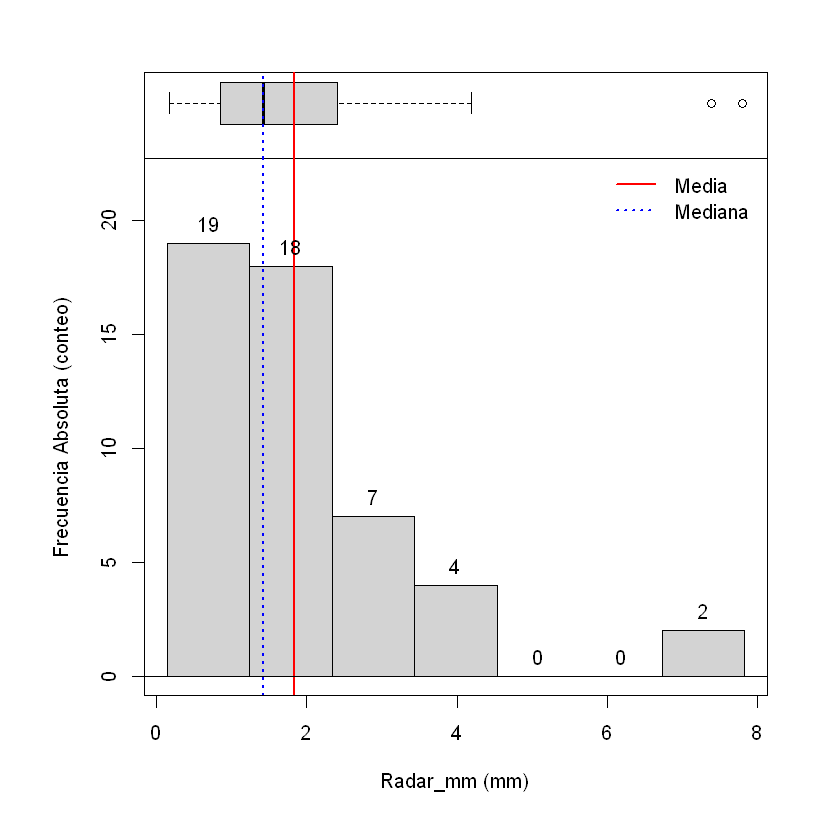

In [12]:
HistBoxplot(x=Radar_mm, mean = Radar_mm_Stat[5,2], median = Radar_mm_Stat[4,2], main ="",  
            xlab = "Radar_mm (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

Y el histograma del radar meteorológico con frecuencia relativa es:

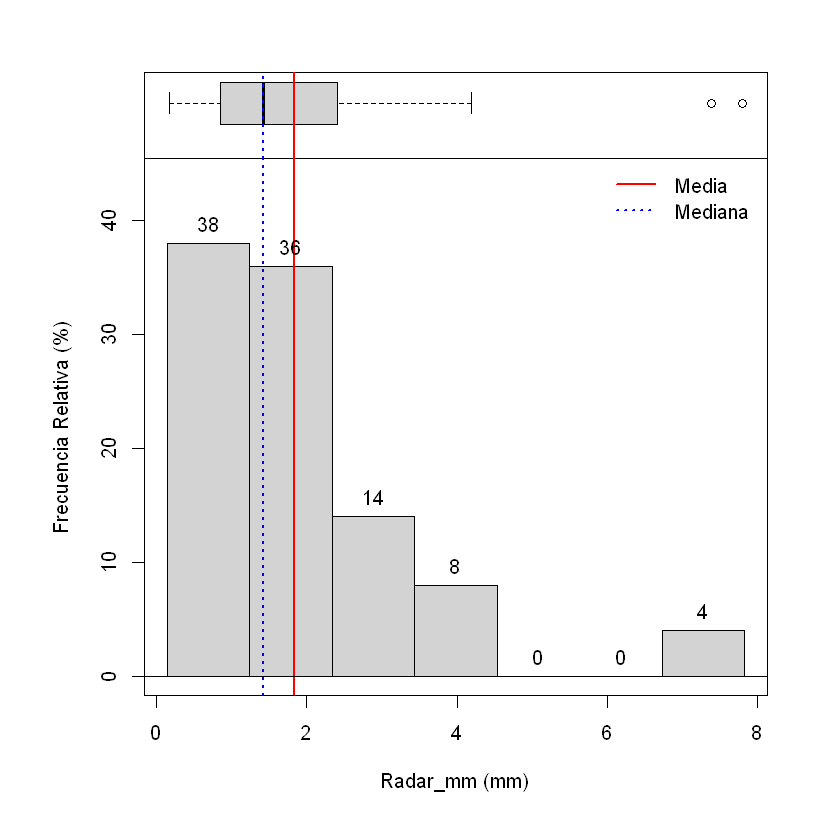

In [13]:
HistBoxplot(x=Radar_mm, mean = Radar_mm_Stat[5,2], median = Radar_mm_Stat[4,2], main ="", 
            xlab = "Radar_mm (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = nb)

Analizando los histogramas y los estadígrafos de la variable del radar meteorológico (Radar_mm) tiene una diferencia entre la media y la mediana de 0.47, su coeficiente de asimetría es de 2.46929, lo cual significa que la variable es asimétrica. Esto se confirma con los histogramas, los cuales muestran que la asimetría es positiva. También podemos notar que el boxplot muestra dos valores atípicos localizados en el extremo derecho. El valor de la curtosis es de 7.99412, lo cual nos indica que es leptocúrtica.

Si deseamos obtener el gráfico Q-Q plot primero hay que realizar el ajuste los valores de la variable del radar meteorológico (Radar_mm) a una función de distribución normal, esto se hace usando la función "FitDistribution", la cual pide como parámetros los datos de la variable (data), el tipo de distribución de probabilidad (DISTR), en este caso es una distribución de probabilidad normal, el número de intervalos (BREAKS) el color para el histograma (col) y el nombre de la distribución (DistName). 

Warning message in ks.test.default(data, DISTRIBUTION, Fit$estimate[1], Fit$estimate[2]):
"ties should not be present for the Kolmogorov-Smirnov test"


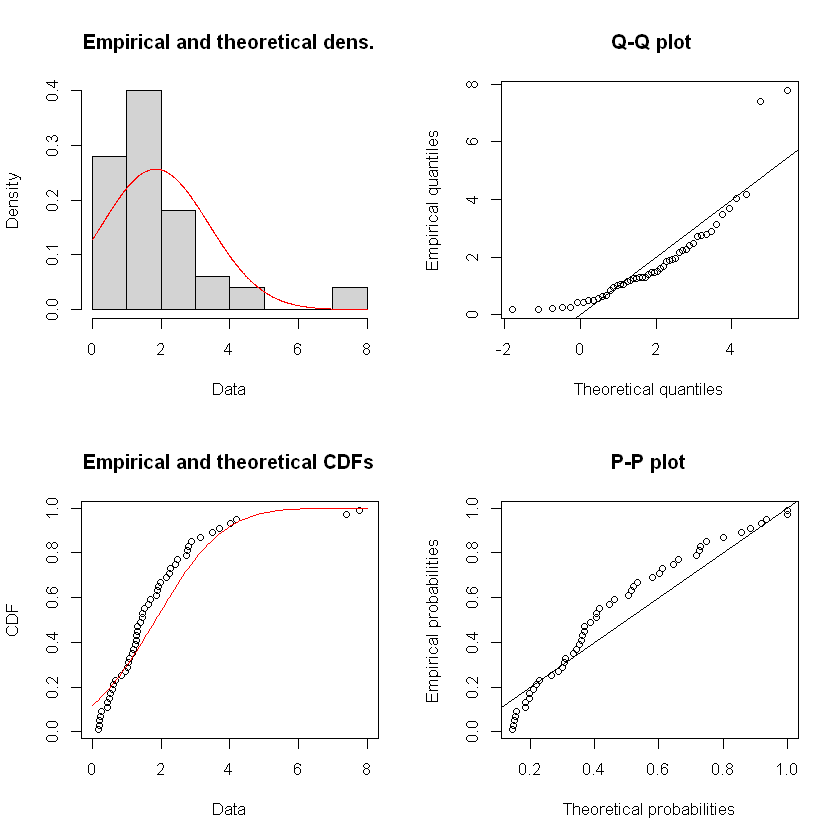

In [74]:
FitDistr2_Radar_mm_normal<-FitDistribution(data = Radar_mm, 
                                           DISTR="norm", BREAKS = "Sturges", col = "gray",  DistName = "Normal")

Esta función nos da como resultado cuatro gráficos, los cuales nos ayudaran a saber el grado de simetría basado en la función de distribución de probabilidad normal. Como podemos ver, las líneas en rojo muestran que la simetría no es buena debido a que las muestras (puntos en gris) se alejan de su trayectoria. 

Para graficar por separado el Q-Q plot primero hay que obtener los parámetros de la estimación de la función de distribución normal usando los datos de la variable del radar meteorológico (Radar_mm). Para eso seleccionamos los resultados guardados en la columna "y" en FitDistr2_Radar_mm_normal 

In [71]:
FD_FP_Radar_mm_normal<-FitDistr2_Radar_mm_normal$y
FD_FP_Radar_mm_normal

,Normal
,<dbl>
Mean,1.835000
Standard deviation,1.556937
Maximum likelihood,-93.082950
AIC,190.165900


El resultado es una tabla que contiene la media y la mediana del ajuste con la función de distribución de probabilidad normal, esos valores se guardan en una lista de la siguiente forma 

In [75]:
PARA_Radar_mm_normal <- list(mean = as.numeric(FD_FP_Radar_mm_normal[1,1]), sd = as.numeric(FD_FP_Radar_mm_normal[2,1]))

El gráfico Q-Q plot se puede obtener con la función "QQplot". Los parámetros para esta función son: la variable a usar (x= Radar_mm) el tipo de distribución, en este caso es distribución normal (norm) y los parámetros para la distribución normal (para), los cuales fueron extraídos de la tabla anterior. 

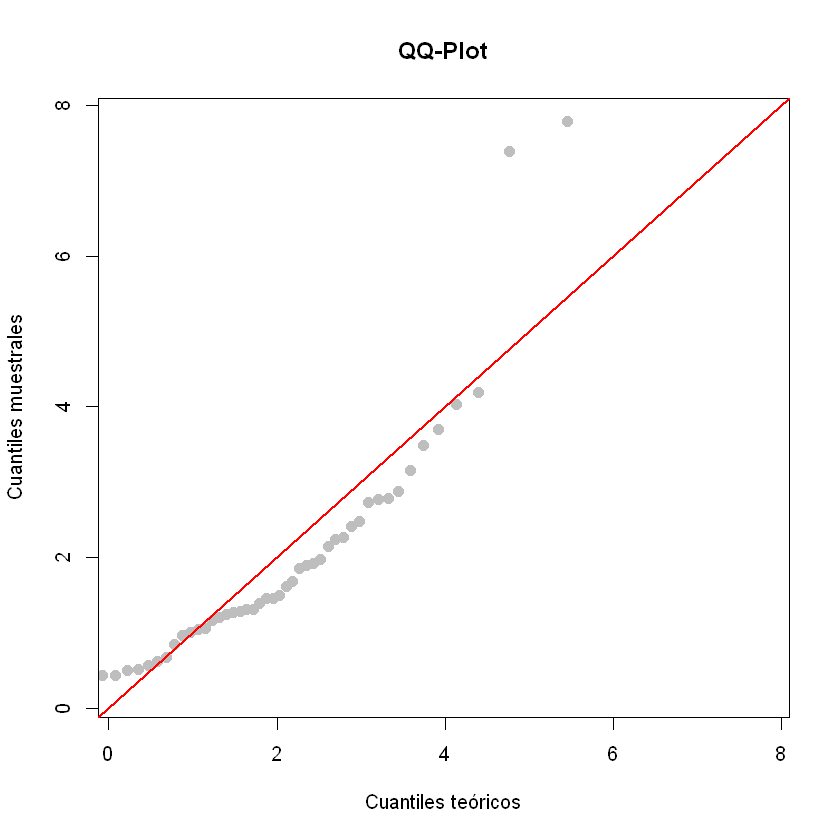

In [72]:
QQplot(x = Radar_mm, distr = "norm", para = PARA_Radar_mm_normal, col = "gray", main = "QQ-Plot", 
       xlab = "Cuantiles teóricos", lcol = "red", lwd = 2)

El siguiente paso es localizar y retirar los valores atipicos. Para saber cuáles son esos valores atípicos usamos la función "OutliersPos".

In [14]:
Radar_mm_outliers<-OutliersPos(Radar_mm)
Data_File[Radar_mm_outliers,c(1,2,3)]

,UTM_X_m,UTM_Y_m,Radar_mm
,<int>,<int>,<dbl>
32,482135,2129478,7.79
36,497898,2129469,7.39


El resultado indica que la muestra 32 y 36 son los valores atípicos, por lo tanto, se elimina esos valores de la variable creando una nueva variable que llamaremos "Radar_mm_out". También se calcula calcular los estadísticos para esta nueva variable.

NOTA: Eliminar los outliers no significa que no se usen más adelante, los valores atípicos son necesarios para saber si conviene o no eliminarlos y para la estimación del variograma, para ello se genera un nuevo vector. Por ejemplo, el vector "Radar_mm" es el vector original, el vector "Radar_mm_out" contiene todos los valores del vector original excepto aquellos que se marcaron como valores atípicos.

NOTA: Si desea utilizar el vector sin los valores atípicos, también deberá eliminar las coordenadas de los valores atípicos detectados, de lo contrario, no se podrá seguir con el análisis variográfico. 

Para retirar los valores atípicos y sus coordenadas hay que generar una nueva tabla de la siguiente forma: primero hay que unir las columnas de las coordenadas (XCoord,YCoord) y la variable que se está analizando (Radar_mm) usando la función "cbind"

In [15]:
Radar_DF<-cbind(XCoord,YCoord,Radar_mm)

Después hay que convertir esa tabla en un data frame. Para esto se usa la función "data.frame", además, se debe indicar cuales son las filas a retirar, para esto se usa el argumento "Radar_DF[-c(Radar_mm_outliers),]", en este caso "-c" indica que se retiran las filas con los números indicados en "Radar_mm_outliers" en la tabla antes generada, la cual se llama "Radar_DF"

In [16]:
Radar_mm_out_DF<-data.frame(Radar_DF[-c(Radar_mm_outliers),])

Generado este nuevo dataframe, podemos llamar a la columna de la variable sin los valores atípicos usando la instrucción "$"

In [17]:
Radar_mm_out<-Radar_mm_out_DF$Radar_mm
Radar_mm_out_Stat<-Estadisticas(Radar_mm_out)
Radar_mm_out_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,48.0000
minimos,Minimum,0.1800
cuantiles1,1st. Quartile,0.8050
medianas,Median,1.3500
medias,Mean,1.5952
cuantiles3,3rd. Quartile,2.2475
maximos,Maximum,4.1900
rangos,Rank,4.0100
rangosInt,Interquartile Rank,1.4425


Volvemos a graficar el histograma para los valores obtenidos con el radar meteorológico sin valores atípicos (Radar_mm_out) con frecuencia absoluta.

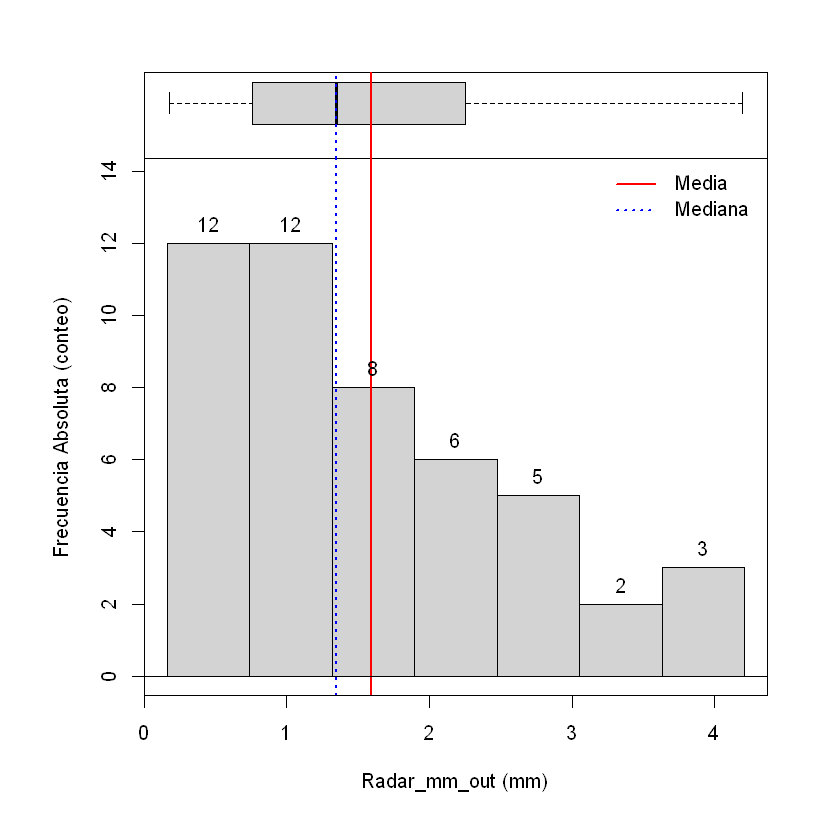

In [18]:
HistBoxplot(x=Radar_mm_out, mean = Radar_mm_out_Stat[5,2], median = Radar_mm_out_Stat[4,2], main ="",  
            xlab = "Radar_mm_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

Y el histograma para los valores obtenidos con el radar meteorológico sin valores atípicos (Radar_mm_out) con frecuencia relativa.

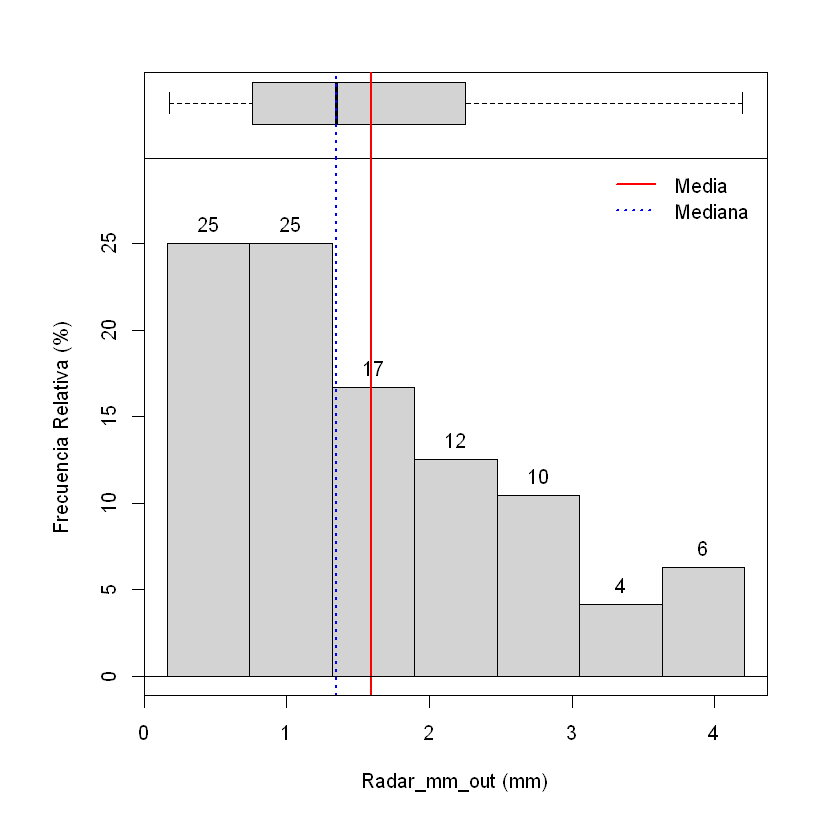

In [19]:
HistBoxplot(x=Radar_mm_out, mean = Radar_mm_out_Stat[5,2], median = Radar_mm_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_out (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = nb)

Analizando la diferencia entre la media y la mediana de esta nueva variable es de 0.2452 y su asimetría es de 0.6937. En principio esto nos indica que la asimetría disminuyó, sin embargo, la variable sigue mostrando asimetría positiva. Con el caso de la curtosis, el valor pasó de 7.99412 a 2.7723, con lo cual consideramos que es planicúrtica.

Ahora podemos observar que los boxplot no muestran nuevos valores atípicos para la variable del radar meteorológico sin valores atípicos (Radar_mm_out). Esto lo podemos confirmar usando la función "OutliersPos".

In [20]:
Radar_mm_out_outliers<-OutliersPos(Radar_mm_out)
print(Radar_mm_out_outliers)

numeric(0)


#### Transformación de variable para el radar meteorológico (Radar_mm).

Dado que no se logró obtener la normalidad en esta variable, podemos usar alguna transformación. 

En estadística, la transformación de datos es la aplicación de una función matemática determinista a cada punto en un conjunto de datos, es decir, cada punto de datos $z_i$ se reemplaza con el valor transformado $y_i=f(z_i)$, donde $f$ es una función.

Las transformaciones generalmente se aplican para que los datos parezcan cumplir más con los supuestos de un procedimiento de inferencia estadística que se aplicará o para mejorar la interpretabilidad o la apariencia de los gráficos. 

Las razones más comunes para aplicar una transformación son:

* Reducir la asimetría.
* Lograr relaciones de dependencia lineales o cuasi lineales
* Conveniencia.

Las transformaciones más comunes son:

Para Asimetrías positivas:

* Raíz cuadrada $v_{at}=\sqrt{v_a}$

* Logarítmica  $v_{at}=Log(v_a)$

* Recíproca  $v_{at}=\frac{1}{v_a}$

Para asimetrías negativas:

* Potencias  $v_{at}=v_a^n$ 

* Arcseno $v_{at}=arcsen(v_a)$ 

* Exponencial  $v_{at}=exp(v_a)$ 


Donde ${v_a}$ es la variable aleatoria y $v_{at}$ es la variable aleatoria transformada.

$\textbf{NOTA: El usuario debe saber si la transformación puede ser usada en la variable aleatoria}$. Por ejemplo, si la variable aleatoria contiene muestras con valor cero, entonces no podrá usar las transformaciones logarítmica o reciproca. Si desea usar la transformación arcseno, la variable aleatoria debe tener componente trigonométrica.

Dado que la variable del radar meteorológico (Radar_mm) presenta asimetría positiva, se van a usar dos tipos de transformaciones: raíz cuadrada y logarítmica.

$\textbf{Transformación de raíz cuadrada}$

Empezaremos con la transformación de raíz cuadrada usando el vector "Radar_mm", la cual se hace de la siguiente forma:



In [21]:
Data_File$Radar_mm_Sqrt<-sqrt(Radar_mm)
Radar_mm_Sqrt <- Data_File$Radar_mm_Sqrt

Ya que obtenemos la variable aleatoria transformada por raíz cuadrada (Radar_mm_Sqrt), debemos obtener sus estadígrafos.

In [22]:
# Estadística básica
Radar_mm_Sqrt_Stat<-Estadisticas(Radar_mm_Sqrt) #estos valores los necesitamos para poder graficar los histogramas

# Estadística básica comparativa entre (Radar_mm) y la transformación (Radar_mm_Sqrt)
Data_File_Stat <- Val_Estadisticos(Data_File)
Data_File_Stat[,c(3,5)]

,Radar_mm,Radar_mm_Sqrt
,<dbl>,<dbl>
No_muestras,50.00000,50.00000
Minimo,0.18000,0.42426
Cuartil_1er,0.87750,0.93641
Mediana,1.42500,1.19364
Media,1.83500,1.25106
Cuartil_3er,2.37500,1.54098
Maximo,7.79000,2.79106
Rango,7.61000,2.36679
Rango_Intercuartil,1.49750,0.60456


Y graficamos los histogramas con frecuencia absoluta y relativa de la transformación raíz cuadrada.

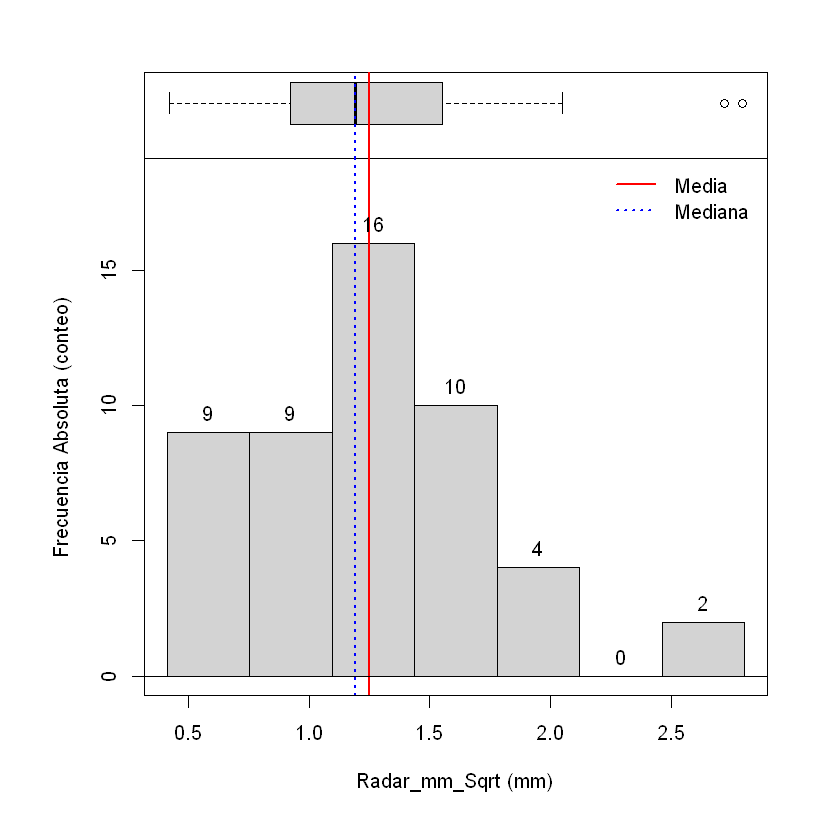

In [24]:
HistBoxplot(x=Radar_mm_Sqrt, mean = Radar_mm_Sqrt_Stat[5,2], median = Radar_mm_Sqrt_Stat[4,2], main ="",  
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

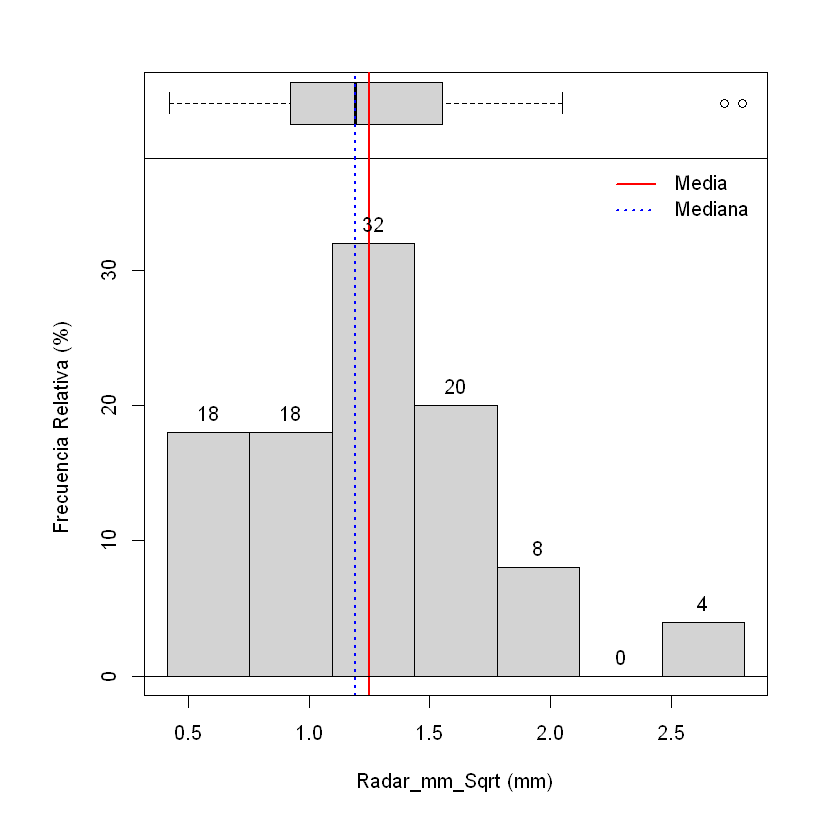

In [25]:
HistBoxplot(x=Radar_mm_Sqrt, mean = Radar_mm_Sqrt_Stat[5,2], median = Radar_mm_Sqrt_Stat[4,2], main ="", 
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = nb)

Si observamos la diferencia entre la media y la mediana de la variable transformada (Radar_mm_Sqrt) podemos notar que es de 0.05742, lo cual podemos considerar como muy bajo en comparación de la diferencia obtenida de la variable sin transformar que es de 0.47, sin embargo, observamos que el boxplot muestra la presencia de dos valores atípicos, los cuales debemos retirar y verificar que no afecten la supuesta simetría que hemos logrado con la transformación.

In [26]:
Radar_mm_Sqrt_outliers<-OutliersPos(Radar_mm_Sqrt)
Data_File[Radar_mm_Sqrt_outliers,c(1,2,5)]

,UTM_X_m,UTM_Y_m,Radar_mm_Sqrt
,<int>,<int>,<dbl>
32,482135,2129478,2.791057
36,497898,2129469,2.718455


Ahora que se sabe cuáles son los valores atípicos, se debe generar una nueva tabla para retirar los valores atípicos junto con sus coordenadas, para esto se usan las siguientes líneas:

In [27]:
Radar_sqrt_DF<-cbind(XCoord,YCoord,Radar_mm_Sqrt)

In [28]:
Radar_mm_sqrt_out_DF<-data.frame(Radar_sqrt_DF[-c(Radar_mm_Sqrt_outliers),])

Se calculan los estadígrafos

In [29]:
Radar_mm_Sqrt_out<-Radar_mm_sqrt_out_DF$Radar_mm_Sqrt
Radar_mm_Sqrt_out_stat<-Estadisticas(Radar_mm_Sqrt_out)
Radar_mm_Sqrt_out_stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,48.0000
minimos,Minimum,0.4243
cuantiles1,1st. Quartile,0.8961
medianas,Median,1.1618
medias,Mean,1.1884
cuantiles3,3rd. Quartile,1.4992
maximos,Maximum,2.0469
rangos,Rank,1.6227
rangosInt,Interquartile Rank,0.6031


In [30]:
Comparative_sqrt<-cbind(Radar_mm_Stat[2],Radar_mm_out_Stat[2],Radar_mm_Sqrt_Stat[2],Radar_mm_Sqrt_out_stat[2])
colnames(Comparative_sqrt)<-c("Radar_mm","Radar_mm_out","Radar_mm_Sqrt","Radar_mm_Sqrt_out")
Comparative_sqrt

,Radar_mm,Radar_mm_out,Radar_mm_Sqrt,Radar_mm_Sqrt_out
,<dbl>,<dbl>,<dbl>,<dbl>
muestras,50.0000,48.0000,50.0000,48.0000
minimos,0.1800,0.1800,0.4243,0.4243
cuantiles1,0.8775,0.8050,0.9364,0.8961
medianas,1.4250,1.3500,1.1936,1.1618
medias,1.8350,1.5952,1.2511,1.1884
cuantiles3,2.3750,2.2475,1.5410,1.4992
maximos,7.7900,4.1900,2.7911,2.0469
rangos,7.6100,4.0100,2.3668,1.6227
rangosInt,1.4975,1.4425,0.6046,0.6031


Con los resultados obtenidos al retirar los dos valores atípicos podemos notar que la diferencia entre la media y la mediana pasaron de  0.05742 a 0.0266, podemos considerar que la transformación cumplió su propósito al reducir de manera significativa la asimetría, sin embargo, comparando las muestras transformadas con y sin valores atípicos podría no justificar el retiro de los valores atípicos ya que es muy pequeña la diferencia.

Y graficamos sus histogramas.

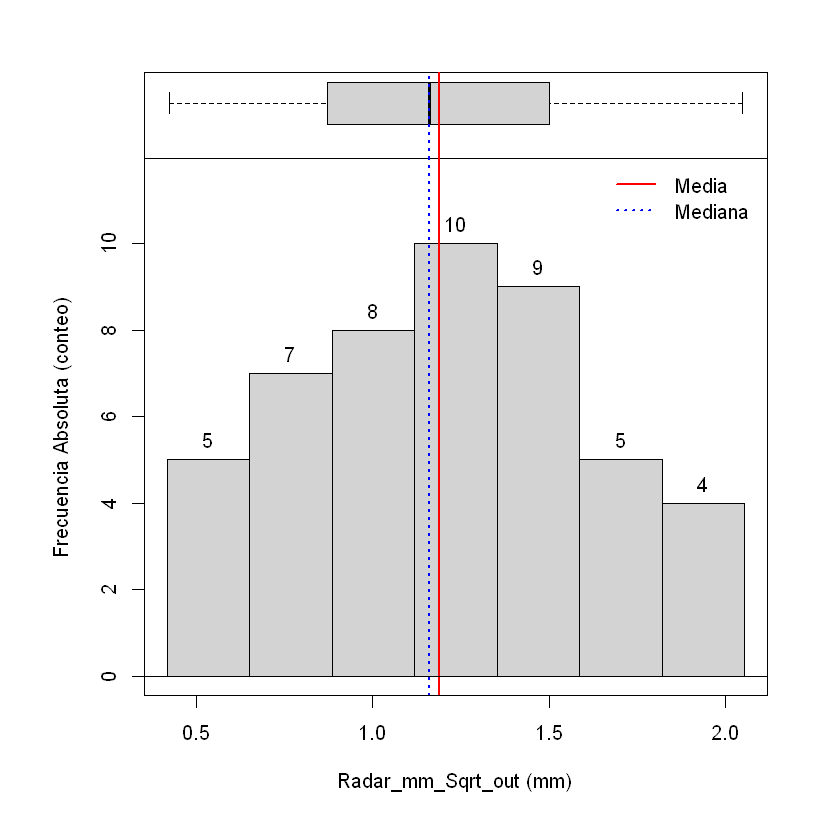

In [32]:
HistBoxplot(x=Radar_mm_Sqrt_out, mean = Radar_mm_Sqrt_out_stat[5,2], median = Radar_mm_Sqrt_out_stat[4,2], main ="",  
            xlab = "Radar_mm_Sqrt_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

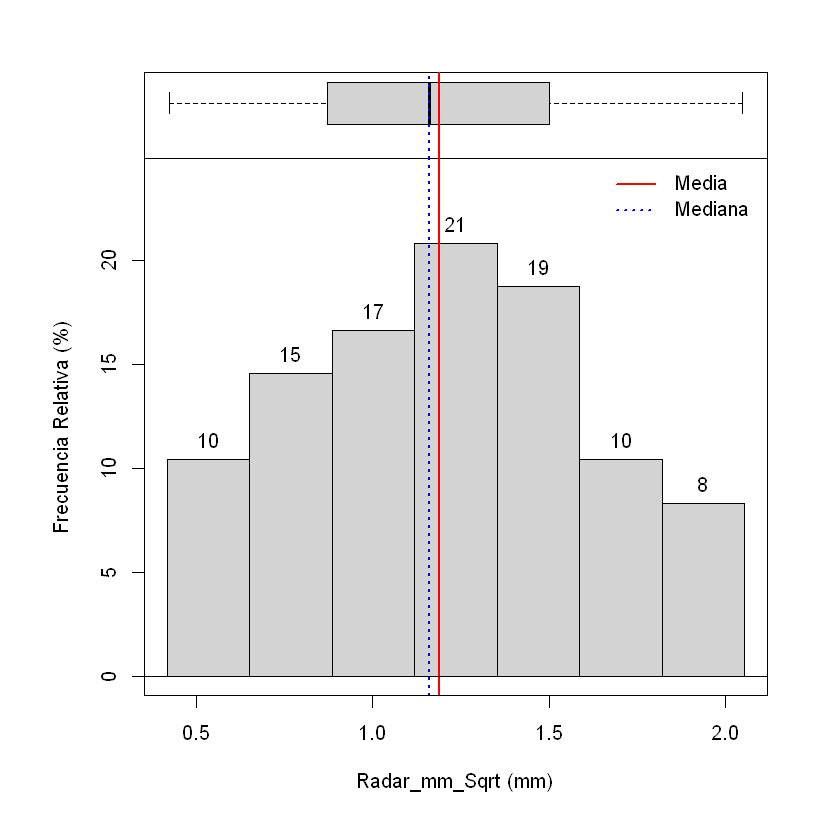

In [33]:
HistBoxplot(x=Radar_mm_Sqrt_out, mean = Radar_mm_Sqrt_out_stat[5,2], median = Radar_mm_Sqrt_out_stat[4,2], main ="", 
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = nb)

Confirmamos que no existan más valores atípicos.

In [34]:
OutliersPos(Radar_mm_Sqrt_out)

numeric(0)

$\textbf{Transformación logarítmica}$

Ahora probaremos usando la transformación logarítmica. La cual se hace de la siguiente forma:

In [35]:
Data_File$Radar_mm_Log<-log(Radar_mm)
Radar_mm_Log <- Data_File$Radar_mm_Log

y al igual que la transformada por raíz cuadrada, obtenemos sus valores estadísticos.

In [36]:
# Estadística básica 
Radar_mm_Log_Stat<-Estadisticas(Radar_mm_Log)

# Estadística básica comparativa entre (Radar_mm), la transformación (Radar_mm_Sqrt) y (Radar_mm_Log)
Data_File_Stat <- Val_Estadisticos(Data_File)
Data_File_Stat[,c(3,5,6)]

,Radar_mm,Radar_mm_Sqrt,Radar_mm_Log
,<dbl>,<dbl>,<dbl>
No_muestras,50.00000,50.00000,50.00000
Minimo,0.18000,0.42426,-1.71480
Cuartil_1er,0.87750,0.93641,-0.13209
Mediana,1.42500,1.19364,0.35387
Media,1.83500,1.25106,0.26569
Cuartil_3er,2.37500,1.54098,0.86467
Maximo,7.79000,2.79106,2.05284
Rango,7.61000,2.36679,3.76764
Rango_Intercuartil,1.49750,0.60456,0.99676


Y graficamos sus respectivos histogramas.

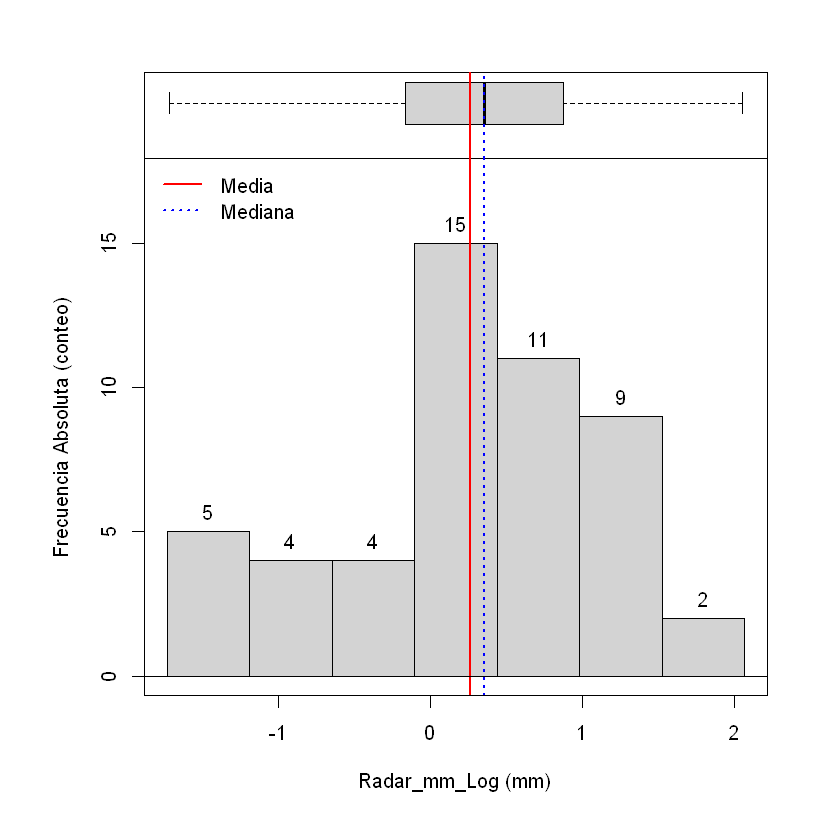

In [38]:
HistBoxplot(x=Radar_mm_Log, mean = Radar_mm_Log_Stat[5,2], median = Radar_mm_Log_Stat[4,2], main ="",  
            xlab = "Radar_mm_Log (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

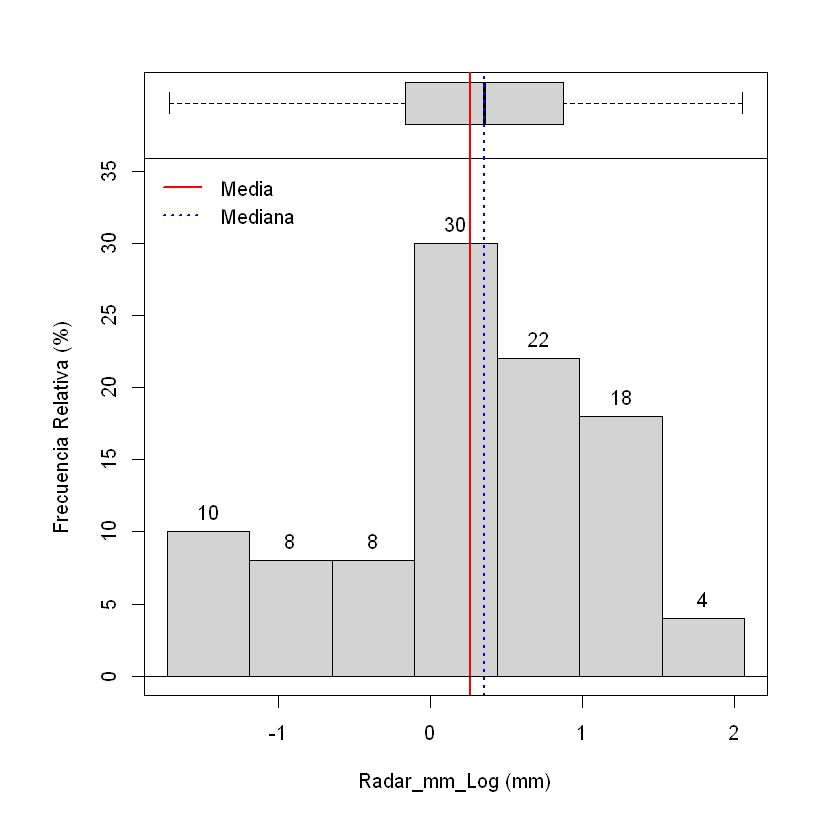

In [39]:
HistBoxplot(x=Radar_mm_Log, mean = Radar_mm_Log_Stat[5,2], median = Radar_mm_Log_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = nb)

La diferencia entre la media y la mediana de la transformación logarítmica es de 0.08818, de forma aparente esta diferencia es mayor comparada con la transformación por raíz cuadrada. El boxplot indica que no existen valores atípicos, sin embargo, se usará la función para detectar los valores atípicos. 

In [40]:
Radar_mm_Log_outliers<-OutliersPos(Radar_mm_Log)
Data_File[Radar_mm_Log_outliers,c(1,2,6)]

,UTM_X_m,UTM_Y_m,Radar_mm_Log
,<int>,<int>,<dbl>
22,462178,2133934,-1.714798
49,503149,2123937,-1.660731


Como podemos ver, la función ha detectado dos valores atípicos, los cuales retiraremos y obtenemos sus valores estadísticos. El motivo por el cual no aparecen los valores atípicos en el boxplot es que el grafico los oculta, pues el rango intercuartil es de 0.99676 multiplicado por 1.5 da 1.49514. El 1º percentil está en -0.13209, eso nos da como resultado -1.62723 

In [41]:
Radar_mm_log_DF<-cbind(XCoord,YCoord,Radar_mm_Log)
Radar_mm_log_out_DF<-data.frame(Radar_mm_log_DF[-c(Radar_mm_Log_outliers),])

In [42]:
Radar_mm_Log_out<-Radar_mm_log_out_DF$Radar_mm_Log

# Estadística básica
Radar_mm_Log_out_Stat<-Estadisticas(Radar_mm_Log_out)
Radar_mm_Log_out_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,48.0000
minimos,Minimum,-1.5606
cuantiles1,1st. Quartile,-0.0027
medianas,Median,0.3784
medias,Mean,0.3471
cuantiles3,3rd. Quartile,0.8868
maximos,Maximum,2.0528
rangos,Rank,3.6135
rangosInt,Interquartile Rank,0.8895


Y graficamos sus histogramas: 

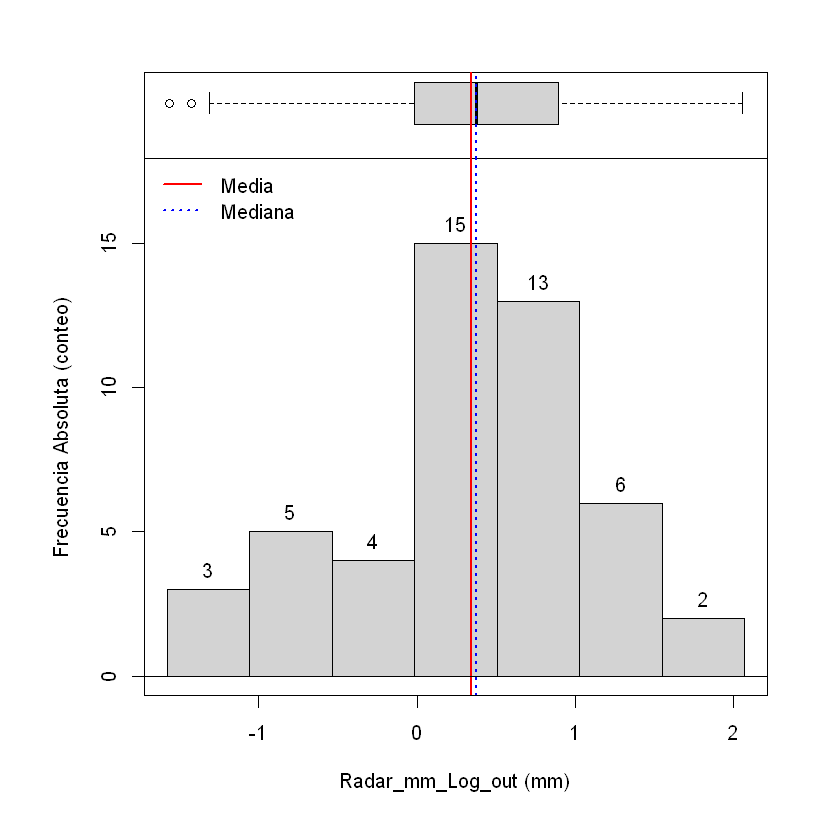

In [43]:
HistBoxplot(x=Radar_mm_Log_out, mean = Radar_mm_Log_out_Stat[5,2], median = Radar_mm_Log_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

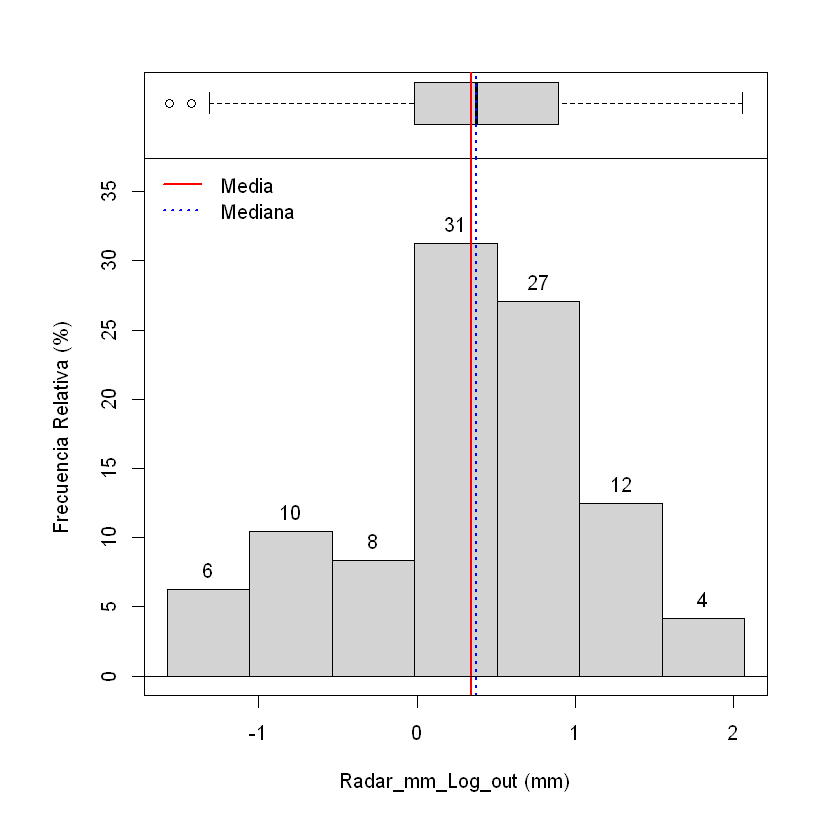

In [45]:
HistBoxplot(x=Radar_mm_Log_out, mean = Radar_mm_Log_out_Stat[5,2], median = Radar_mm_Log_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = nb)

La diferencia entre la media y la mediana de la transformación logarítmica quitando los valores atípicos detectados pasó de 0.08818 a 0.0313, sin embargo, el boxplot muestran dos valores atípicos localizados a la izquierda del gráfico. Por lo tanto, retiraremos esos nuevos valores atípicos.

In [46]:
Radar_mm_Log_outliers2<-OutliersPos(Radar_mm_Log_out)
Radar_mm_log_out_DF[Radar_mm_Log_outliers2,c(1,2,3)]

,XCoord,YCoord,Radar_mm_Log
,<dbl>,<dbl>,<dbl>
45,467433,2135030,-1.427116
48,472686,2135022,-1.560648


Y hacemos un analisis estadístico de este nuevo conjunto de valores.

In [47]:
Radar_mm_log_out_DF2<-data.frame(Radar_mm_log_out_DF[-c(Radar_mm_Log_outliers2),])

In [48]:
# Variable without distributional outliers 2
Radar_mm_Log_out2<-Radar_mm_log_out_DF2$Radar_mm_Log

#2º análisis sin valores atípicos
# Estadística básica
Radar_mm_Log_out2_Stat<-Estadisticas(Radar_mm_Log_out2)
Radar_mm_Log_out2_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,46.0000
minimos,Minimum,-1.3093
cuantiles1,1st. Quartile,0.0440
medianas,Median,0.3920
medias,Mean,0.4271
cuantiles3,3rd. Quartile,0.9011
maximos,Maximum,2.0528
rangos,Rank,3.3622
rangosInt,Interquartile Rank,0.8571


Y graficamos su respectivo histograma.

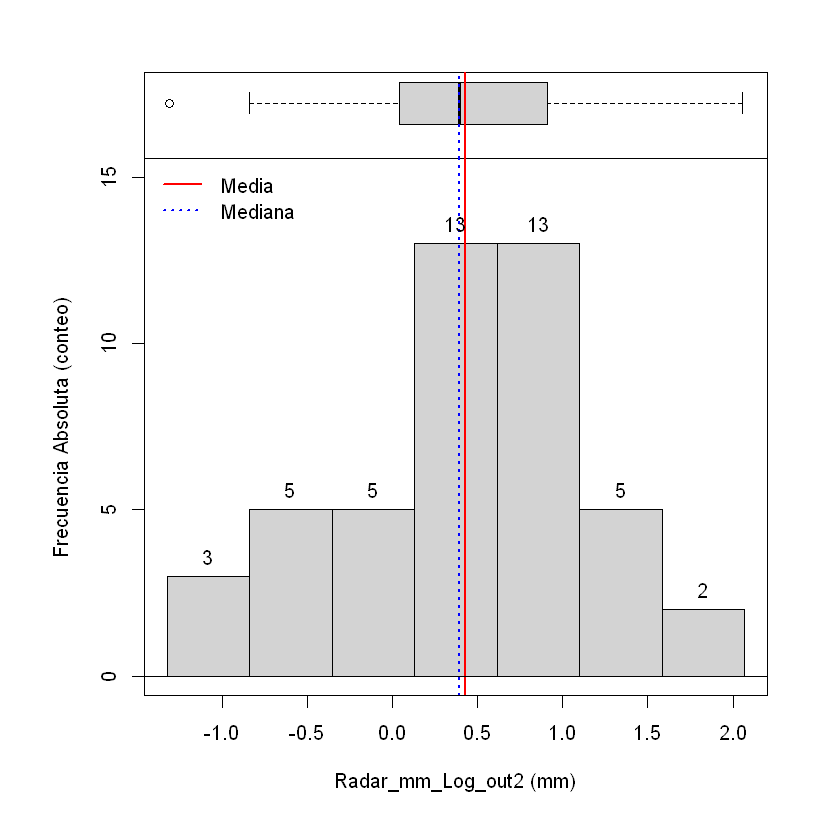

In [51]:
HistBoxplot(x=Radar_mm_Log_out2, mean = Radar_mm_Log_out2_Stat[5,2], median = Radar_mm_Log_out2_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out2 (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

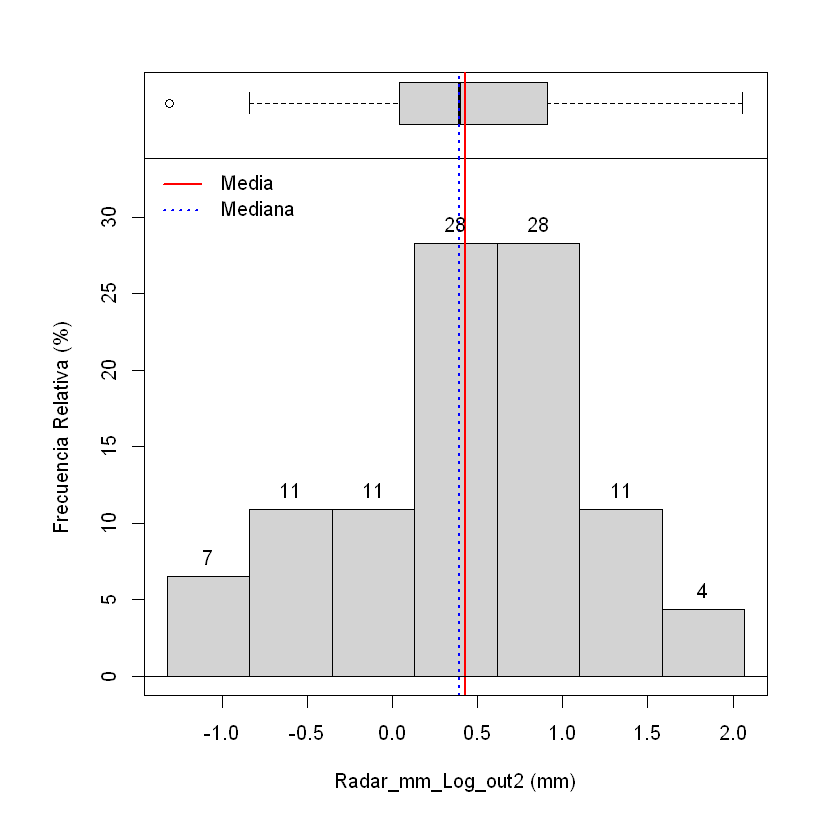

In [52]:
HistBoxplot(x=Radar_mm_Log_out2, mean = Radar_mm_Log_out2_Stat[5,2], median = Radar_mm_Log_out2_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out2 (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = nb)

In [53]:
Comparative_log<-cbind(Radar_mm_Stat[2],Radar_mm_out_Stat[2],Radar_mm_Sqrt_Stat[2],Radar_mm_Sqrt_out_stat[2], Radar_mm_Log_Stat[2],
                       Radar_mm_Log_out_Stat[2],Radar_mm_Log_out2_Stat[2])
colnames(Comparative_log)<-c("Radar_mm","Radar_mm_out","Radar_mm_Sqrt","Radar_mm_Sqrt_out","Radar_mm_Log","Radar_mm_Log_out","Radar_mm_Log_out2")
Comparative_log

,Radar_mm,Radar_mm_out,Radar_mm_Sqrt,Radar_mm_Sqrt_out,Radar_mm_Log,Radar_mm_Log_out,Radar_mm_Log_out2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
muestras,50.0000,48.0000,50.0000,48.0000,50.0000,48.0000,46.0000
minimos,0.1800,0.1800,0.4243,0.4243,-1.7148,-1.5606,-1.3093
cuantiles1,0.8775,0.8050,0.9364,0.8961,-0.1321,-0.0027,0.0440
medianas,1.4250,1.3500,1.1936,1.1618,0.3539,0.3784,0.3920
medias,1.8350,1.5952,1.2511,1.1884,0.2657,0.3471,0.4271
cuantiles3,2.3750,2.2475,1.5410,1.4992,0.8647,0.8868,0.9011
maximos,7.7900,4.1900,2.7911,2.0469,2.0528,2.0528,2.0528
rangos,7.6100,4.0100,2.3668,1.6227,3.7676,3.6135,3.3622
rangosInt,1.4975,1.4425,0.6046,0.6031,0.9968,0.8895,0.8571


La diferencia entre la media y la mediana de la transformación logarítmica quitando los valores atípicos detectados pasó de 0.0313 a 0.0351, es decir, aumentó el valor, sin ser significativo este aumento, con lo cual podemos considerar que hacer el segundo retiro de valores atípicos es innecesario.

### Análisis estadístico univariado para los datos obtenidos de pluviómetros (Pluv_mm).

Ahora se hace el mismo análisis estadístico a los datos obtenidos de los pluviómetros (Pluv_mm). Empezamos obteniendo los valores estadísticos.

In [54]:
Pluv_mm_Stat <- Estadisticas(Pluv_mm)
Pluv_mm_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,50.0000
minimos,Minimum,0.2500
cuantiles1,1st. Quartile,0.3125
medianas,Median,1.0000
medias,Mean,1.4700
cuantiles3,3rd. Quartile,1.9375
maximos,Maximum,7.7500
rangos,Rank,7.5000
rangosInt,Interquartile Rank,1.6250


Y su respectivo histograma.

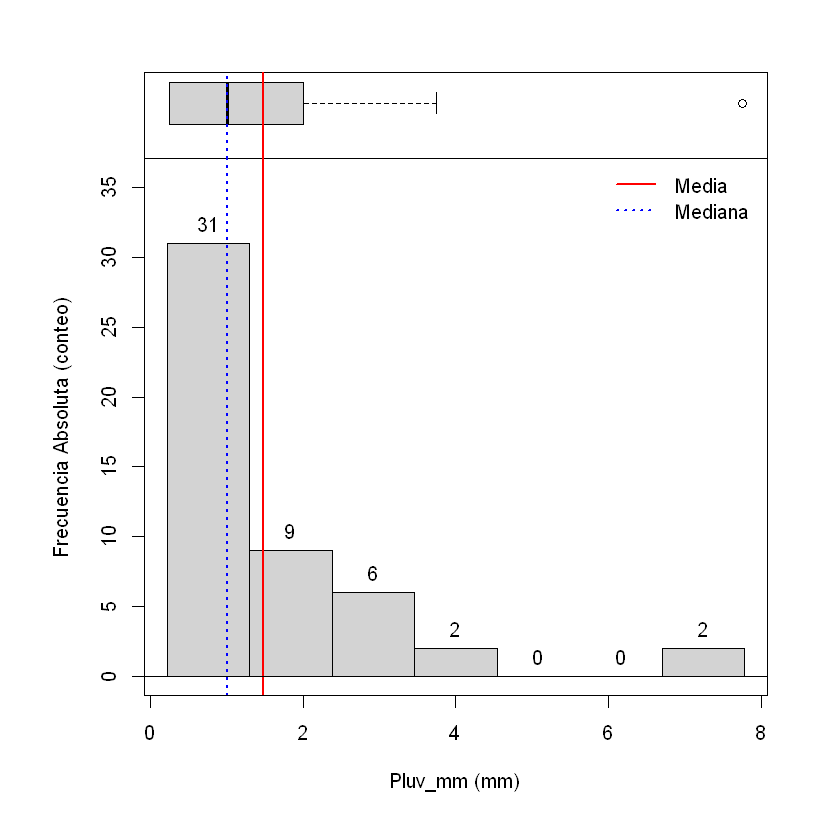

In [55]:
HistBoxplot(x=Pluv_mm, mean = Pluv_mm_Stat[5,2], median = Pluv_mm_Stat[4,2], main ="", 
            xlab = "Pluv_mm (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

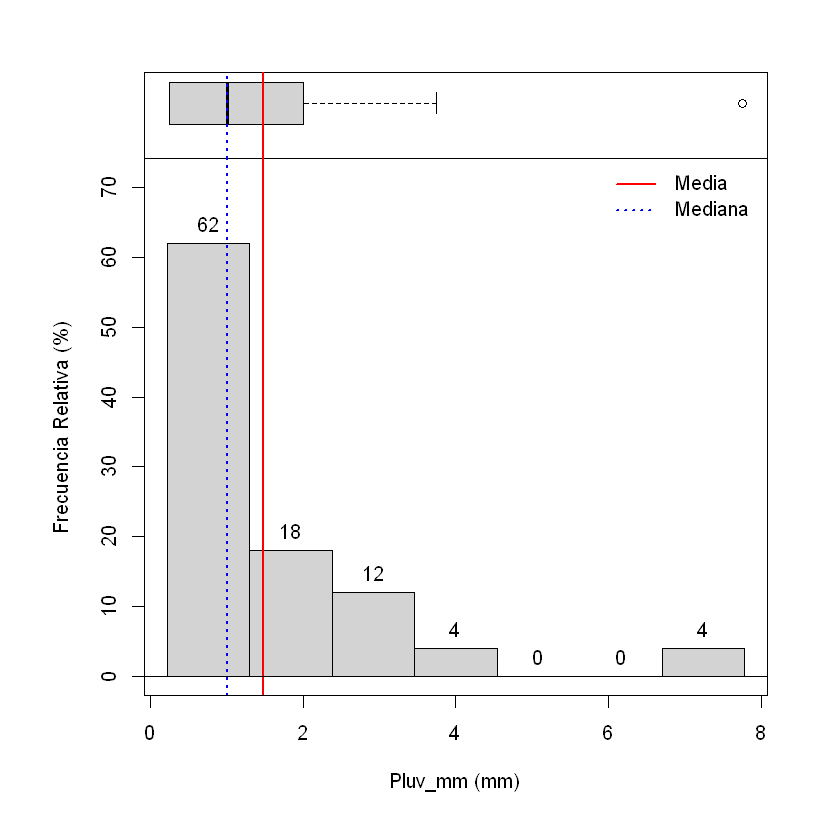

In [57]:
HistBoxplot(x=Pluv_mm, mean = Pluv_mm_Stat[5,2], median = Pluv_mm_Stat[4,2], main ="", 
            xlab = "Pluv_mm (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = nb)

Se puede notar que la diferencia entre la media y la mediana es de 0.47, lo cual nos indica que la variable es asimétrica positiva y el histograma nos confirma esta información.

$\textbf{Transformación logarítmica.}$

Analizando el histograma se observa un fuerte crecimiento en la parte izquierda, por lo tanto es recomendable usar la transformación logarítmica.

In [58]:
Pluv_mm_Log <- log(Pluv_mm)
Pluv_mm_Log_Stat <- Estadisticas(Pluv_mm_Log)
Pluv_mm_Log_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,50.0000
minimos,Minimum,-1.3863
cuantiles1,1st. Quartile,-1.2130
medianas,Median,0.0000
medias,Mean,-0.0903
cuantiles3,3rd. Quartile,0.6598
maximos,Maximum,2.0477
rangos,Rank,3.4340
rangosInt,Interquartile Rank,1.8728


Los histogramas de la transformación logarítmica son los siguientes:

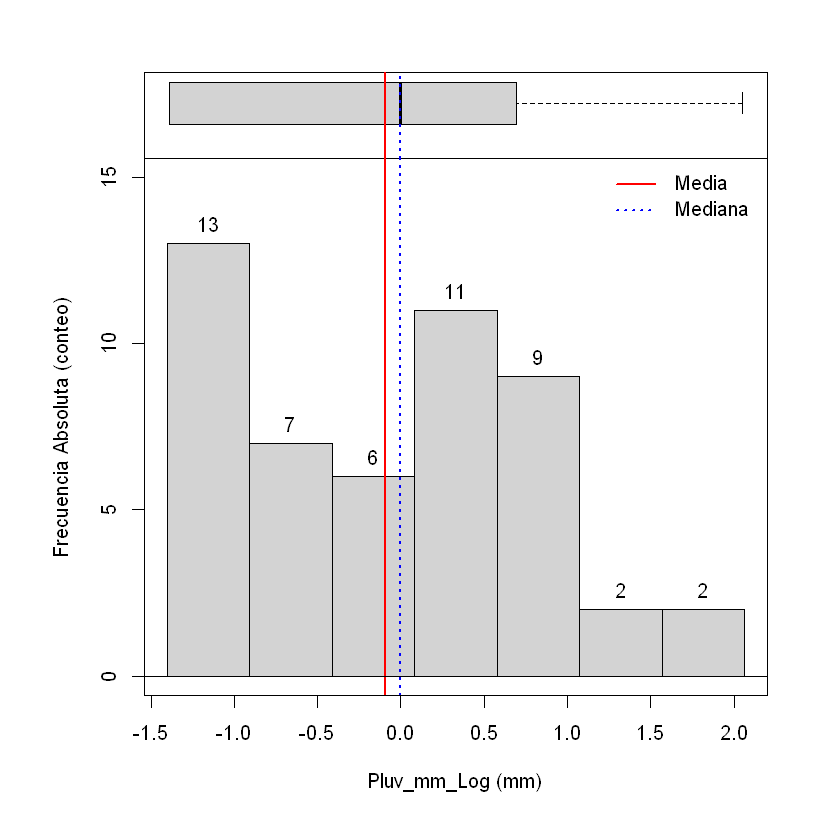

In [60]:
HistBoxplot(x=Pluv_mm_Log, mean = Pluv_mm_Log_Stat[5,2], median = Pluv_mm_Log_Stat[4,2], main ="", 
            xlab = "Pluv_mm_Log (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

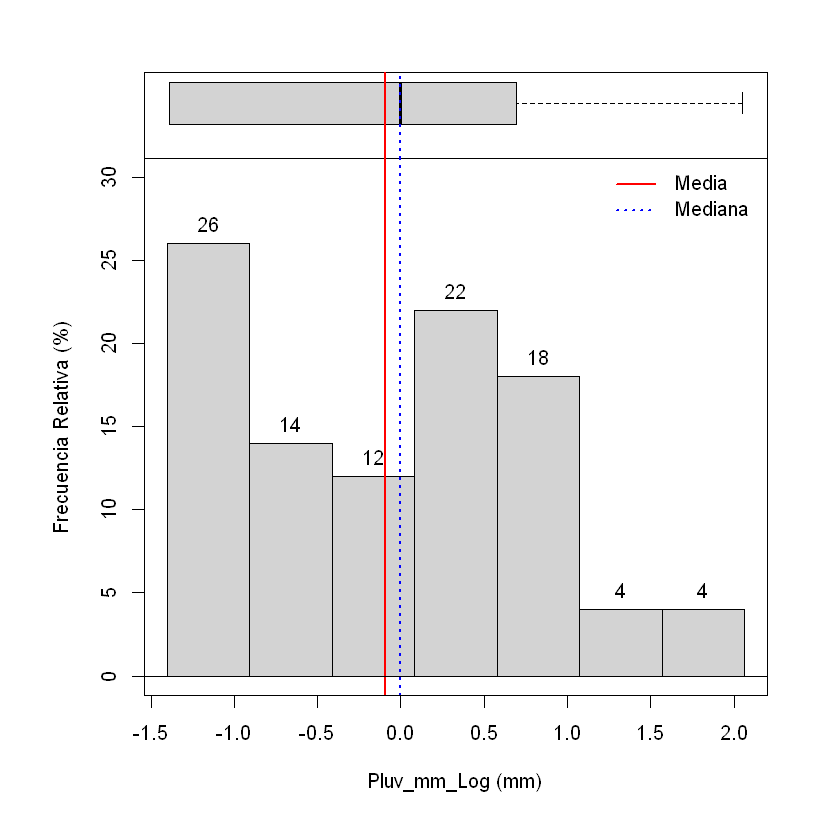

In [62]:
HistBoxplot(x=Pluv_mm_Log, mean = Pluv_mm_Log_Stat[5,2], median = Pluv_mm_Log_Stat[4,2], main ="", 
            xlab = "Pluv_mm_Log (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = nb)

La diferencia entre la media y la mediana pasó de 0.47 a 0.09, lo cual es bajo. El boxplot no muestra valores atípicos, sin embargo, nos aseguraremos que esto sea cierto usando la función "OutliersPos".

In [63]:
Pluv_mm_Log_outliers<-OutliersPos(Pluv_mm_Log)
print(Pluv_mm_Log_outliers)

numeric(0)


No se encontraron valores atípicos, por lo tanto, aquí se termina el análisis univariado de esta variable.

## Análisis estadístico bivariado.

Como pudimos notar durante el análisis exploratorio univariado, necesitamos de dos elementos para interpretar las características estadísticas de una variable: un histograma y una tabla con los valores estadísticos. Con el caso del análisis exploratorio bivariado necesitamos un diagrama de dispersión o scatterplot y los grados de dependencia.

Un diagrama de dispersión es una gráfica compuesta por pares de valores de dos variables aleatorias $(x_i,y_i)$.

Los grados de dependencia se miden usando el coeficiente de correlación lineal de Pearson:

$$\rho_{XY}=\frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}}==\frac{Cov(X,Y)}{\sqrt(Var(X)Var(Y))}$$

El coeficiente de correlación de Spearman:

$$\rho=1-\frac{6\sum{D^2}}{N(N^2-1)}$$

Y el coeficiente de correlación de Kendall:

$$\tau=\frac{{\textit{número de pares concordantes − número de pares discordantes}}}{\bigl(\begin{smallmatrix}n\\ 2\end{smallmatrix}\bigr)}$$

### Cálculo de grados de dependencia

Para calcular las medidas de dependencia usamos la función "cor", esta necesita tres elementos: dos variables, en este caso (Radar_mm , Pluv_mm) y el método que se desea usar, este puede ser Pearson, Spearman o Kendall.

In [64]:
cor(Radar_mm , Pluv_mm, method = "pearson")

[1] 0.9410485

In [65]:
cor(Radar_mm , Pluv_mm, method = "spearman")

[1] 0.8480453

In [66]:
cor(Radar_mm , Pluv_mm, method = "kendall")

[1] 0.7187151

Respecto al coeficiente de Pearson, su valor es de 0.9410, lo cual podemos considerar como cuasi-lineal. Sin embargo, los valores de la correlación de Spearman (0.8480) y Kendall (0.7187) indican que el modelo no es cuasi-lineal, por lo que es posible que la dependencia lineal esté alterada por valores atípicos.

### Diagrama de dispersión.

El diagrama de dispersión se grafica usando la función "ScatterPlot", esta función requiere de los siguientes parámetros:

* Variables (Radar_mm , Pluv_mm)
* Número de intervalos para los histogramas, en este caso 9
* Valores mínimos y máximos de las variables analizadas (Xmin, Xmax, Ymin, Ymax), estos se pueden obtener de los estadígrafos calculados de cada variable
* Leyendas para el eje X (XLAB) y el eje Y (YLAB)

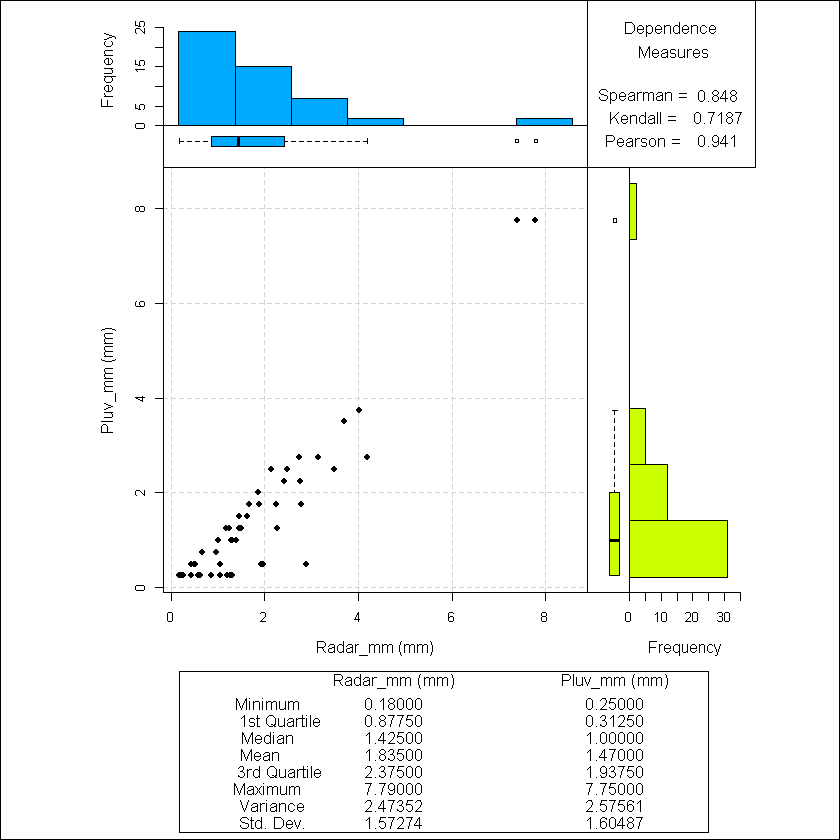

In [67]:
ScatterPlot(Radar_mm , Pluv_mm, nb, 
            Xmin = Radar_mm_Stat[2,2], Xmax = Radar_mm_Stat[7,2], 
            Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], 
            XLAB = "Radar_mm (mm)", YLAB = "Pluv_mm (mm)")

Podemos notar en el gráfico de dispersión que hay dos pares atípicos localizados en la esquina superior derecha, los cuales podrían ser la causa de la cuasi-linearidad que indica la medida de dependencia de Pearson. Estos valores coinciden con los valores atípicos que se detectaron durante el análisis univariado, Sin embargo, es importante señalar que los valores atípicos encontrados en el análisis exploratorio univariado no son necesariamente valores atípicos en el análisis exploratorio bivariado, se debe evaluar la conveniencia de retirar cada par.

Para retirar los valores atípicos bivariados se hace de forma manual ubicando los valores atípicos en términos de que tan alejados están del grupo de muestras. Por ejemplo, se decide que los valores atípicos se ubican en la parte superior derecha del scatterplot, los cuales corresponden a los pares ubicados en la fila 32 y 36 del Data_File, se genera un nueva data frame sin esos valores de la siguiente forma. 

In [76]:
scatter_out_DF<-data.frame(Data_File[-c(32,36),])

de este nuevo data frame se extrae las columnas que nos interesan, en este caso "Radar_mm" y "Pluv_mm"

In [77]:
Radar_mm_out_bi<-scatter_out_DF$Radar_mm
Pluv_mm_out_bi<-scatter_out_DF$Pluv_mm

y se calculan sus estadigrafos.

In [79]:
Radar_mm_out_bi_Stat<-Estadisticas(Radar_mm_out_bi)
Pluv_mm_out_bi_Stat<-Estadisticas(Pluv_mm_out_bi)

Como podemos ver en la siguiente tabla, se retiraron dos valores atípicos bivariados de cada variable. Estos valores coinciden con los valores atípicos univariados, en algunos casos esto puede pasar, pero no es la norma, los valores atípicos univariados no siembre son valores atípicos bivariados. 

In [80]:
Comparative_out_bi<-cbind(Radar_mm_Stat[2],Radar_mm_out_bi_Stat[2],Pluv_mm_Stat[2],Pluv_mm_out_bi_Stat[2])
colnames(Comparative_out_bi)<-c("Radar_mm","Radar_mm_out_bi","Pluv_mm","Pluv_mm_out_bi")
Comparative_out_bi

,Radar_mm,Radar_mm_out_bi,Pluv_mm,Pluv_mm_out_bi
,<dbl>,<dbl>,<dbl>,<dbl>
muestras,50.0000,48.0000,50.0000,48.0000
minimos,0.1800,0.1800,0.2500,0.2500
cuantiles1,0.8775,0.8050,0.3125,0.2500
medianas,1.4250,1.3500,1.0000,1.0000
medias,1.8350,1.5952,1.4700,1.2083
cuantiles3,2.3750,2.2475,1.9375,1.7500
maximos,7.7900,4.1900,7.7500,3.7500
rangos,7.6100,4.0100,7.5000,3.5000
rangosInt,1.4975,1.4425,1.6250,1.5000


In [81]:
cor(Radar_mm_out_bi , Pluv_mm_out_bi, method = "pearson")

[1] 0.8576737

In [82]:
cor(Radar_mm_out_bi , Pluv_mm_out_bi, method = "spearman")

[1] 0.8280226

In [83]:
cor(Radar_mm_out_bi , Pluv_mm_out_bi, method = "kendall")

[1] 0.6936587

Respecto a las medidas de dependencia, se puede notar que las medidas disminuyeron su valor al retirar los valores atípicos. 

| Dependencia | Original | Sin outliers |
|  ------ |  -------- | -------- |
| Pearson | 0.9410 | 0.8577 |
| Spearman | 0.8480 | 0.8280|
| Kendall | 0.7187 |0.6937|

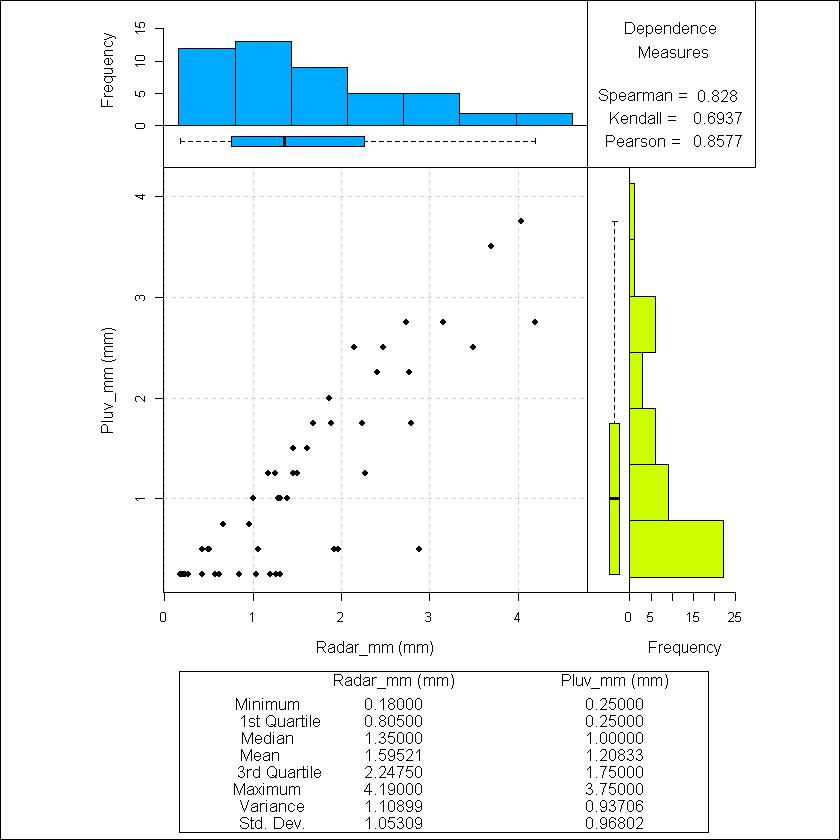

In [84]:
ScatterPlot(Radar_mm_out_bi , Pluv_mm_out_bi, nb, 
            Xmin = Radar_mm_out_bi_Stat[2,2], Xmax = Radar_mm_out_bi_Stat[7,2], 
            Ymin = Pluv_mm_out_bi_Stat[2,2],Ymax = Pluv_mm_out_bi_Stat[7,2], 
            XLAB = "Radar_mm (mm)", YLAB = "Pluv_mm (mm)")

### Analisis de regresión lineal.

Como se mencionó en clase, la regresión trata de establecer relaciones funcionales entre variables aleatorias, en este caso, la relación se establece con una recta. Para hacer el análisis necesitamos de los parámetros de la recta y el análisis de residuos.

Para obtener este gráfico se usa la función "scaterplotReg", la cual necesita de los siguientes parámetros:


* Variables (Radar_mm , Pluv_mm)
* Número de intervalos para los histogramas, en este caso 9
* Valores mínimos y máximos de las variables analizadas (Xmin, Xmax, Ymin, Ymax), estos se pueden obtener de los estadígrafos calculados de cada variable
* Leyendas para el eje X (XLAB) y el eje Y (YLAB)

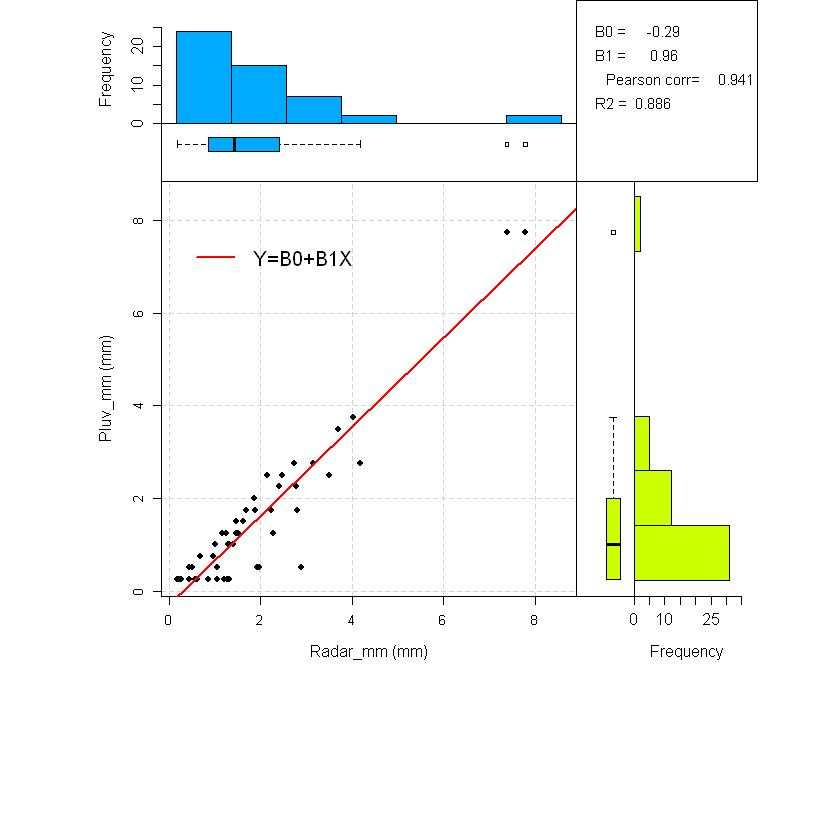

In [68]:
scaterplotReg(Radar_mm , Pluv_mm, nb, 
              Xmin = Radar_mm_Stat[2,2], Xmax = Radar_mm_Stat[7,2], 
              Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], 
              XLAB = "Radar_mm (mm)", YLAB = "Pluv_mm (mm)")

De este grafico se requiere de los valores de la regresión lineal y su error cuadrático. Para hacer la regresión lineal se usa la función "lm", esta necesita los siguientes parámetros:

* Indicar las variables X y Y

In [57]:
# Linear Regression
X<-Radar_mm
Y<-Pluv_mm

linear_regression <-lm(Y ~ X)

# Linear Regression Parameters
B0 <- linear_regression$coefficients[1]
B0
B1 <- linear_regression$coefficients[2]
B1

(Intercept) 
  -0.292099

X 
0.9602719

Con los parámetros de la recta $B_0$ y $B_1$, hacemos el calculo de los residuos.

In [58]:
# Regression line and Residual Calculation
Y_Regression <- linear_regression$fitted.values
Y_Residual <- linear_regression$residuals

Ya que tenemos calculados los residuos necesitamos obtener sus valores estadísticos.

In [59]:
Y_Residual_Stat<-Estadisticas(Y_Residual)
write.csv(Y_Residual_Stat , file = "Results/AED/Pluv_mm_Residual_Stat.csv")
Y_Residual_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,5.000000e+01
minimos,Minimum,-1.973500e+00
cuantiles1,1st. Quartile,-1.988000e-01
medianas,Median,1.562000e-01
medias,Mean,0.000000e+00
cuantiles3,3rd. Quartile,3.552000e-01
maximos,Maximum,9.457000e-01
rangos,Rank,2.919200e+00
rangosInt,Interquartile Rank,5.540000e-01


Y tambien necesitamos obtener el histograma de estos residuos.

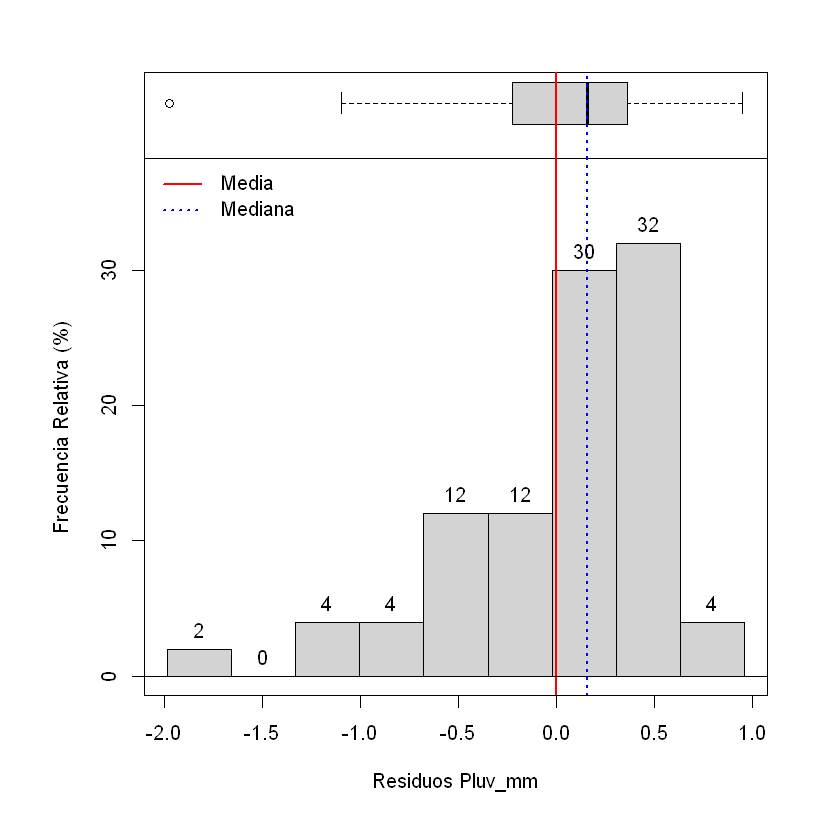

In [60]:
HistBoxplot(x=Y_Residual, mean = Y_Residual_Stat[5,2], median = Y_Residual_Stat[4,2], main ="", 
            xlab = "Residuos Pluv_mm", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE )

Al analizar los valores estadísticos y el histograma de los residuos, se observa que el valor esperado es de 0, su varianza es de 0.2947 y la diferencia entre la media y la mediana es de 0.1562, lo cual nos indica que tiene asimetría negativa, por lo tanto, los residuos no cumplen con todas las condiciones que demanda la regresión lineal.

Para confirmar que los residuos no cumplen con las condiciones de la regresión lineal hay que usar los gráficos de comparación empirica y teórica, estos son el histograma, grafico cuantil-cuantil (Q-Q), percentil-percentil (P-P) y de función acumulativa. Para esto se usa la función "FitDistribution", esta requiere de los siguientes parámetros:

* Vector de los residuos (data)
* Tipo de distribución de probabilidad, en este caso normal (norm)
* Número de intervalos para el histograma (BREAKS)
* Color para los intervalos del histograma (col)

Warning message in hist.default(data, breaks = breaks, plot = FALSE, ...):
"argument 'col' is not made use of"


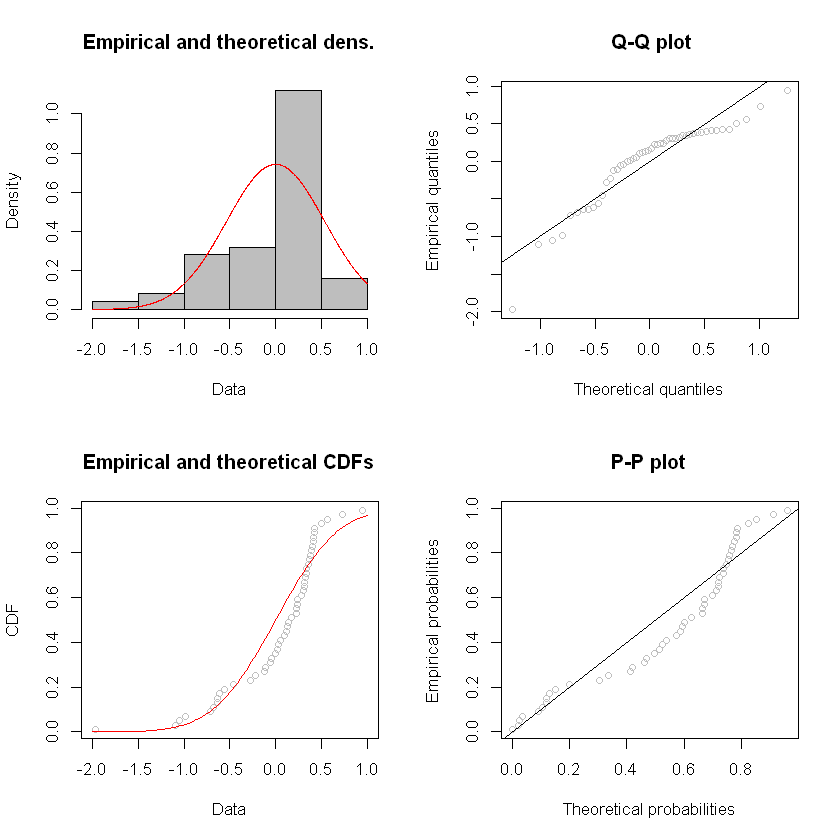

In [61]:
FitDistr2_Residual_normal<-FitDistribution(data = Y_Residual, DISTR="norm", 
                                           BREAKS = "Sturges", col = "gray",  DistName = "Normal")

Para confirmar que los residuos no cumplen con las condiciones de la regresión lineal podemos sobreponer el histograma con la distribución normal (figura superior izquierda), ahí podemos ver que una de las barras del histograma sobrepasa a la función de distribución. El grafico Q-Q plot (figura superior derecha) también muestra que solo unas pocas muestras están en la recta. La grafica comparativa entre las funciones de distribución acumulativas empírica y teórica (figura inferior izquierda) no muestran un buen ajuste Y en el caso del grafico P-P plot (figura inferior derecha) solo las muestras de la esquina inferior izquierda y unas pocas de la parte central se posicionan cerca de la recta.

Ahora debemos aplicar una prueba de normalidad, en este caso tenemos dos opciones: hipótesis de Kolmogorov-Smirnov y la hipótesis de Anderson-Darling.

La hipótesis de Kolmogorov-Smirnov se usa para contrastar la hipótesis de normalidad, el estadístico de prueba es la máxima diferencia:

$$D=máx|F_n(x)-F_{va}(x)|$$

Donde $F_n(x)$ es la función de distribución paramétrica, en este caso la función normal. Y $F_{va}(x)$ es la función de la variable aleatoria.

La hipótesis de Anderson-Darling es una prueba no paramétrica que se basa en la comparación de las muestras $\textbf{Y}$ y la función de distribución de probabilidad teórica $\textbf{F}$. Su fórmula es:

$$S=\sum_{k=1}^{N}\frac{2k-1}{N}\left[ln(F(Y_k))+ln(1-F(Y_{N+1-k}))\right]$$

El valor p es una probabilidad que mide la evidencia en contra de la hipótesis nula. Un valor p más pequeño proporciona una evidencia más fuerte en contra de la hipótesis nula. esta hipótesis se usa para determinar si los datos siguen una distribución normal.

Si $p\leq a$ donde a es el nivel de significancia la decisión es rechazar la hipótesis nula y concluir que sus datos no siguen una distribución normal.

Si $p>a$ donde a es el nivel de significancia la decisión es no rechazar la hipótesis nula y concluir que sus datos no tienen suficiente evidencia para concluir que los datos no siguen una distribución normal.


In [62]:
FD_HT_Residual_normal<-FitDistr2_Residual_normal$x
FD_HT_Residual_normal

Method,Significance level,P-value,Statistical,Decision
<chr>,<chr>,<chr>,<chr>,<chr>
Kolmogorov-Smirnov,0.05,0.136,0.1605,No rechazo H0
Anderson-Darling,0.05,0.07826,2.13,No rechazo H0


Bajo la prueba de Kolmogorov-Smirnov podemos ver que la normalidad de los residuos es de no rechazo. Mientras que la prueba de Anderson-Darling no rechaza la hipótesis de normalidad. Sin embargo, los valores obtenidos de estas pruebas son muy cercanos al nivel de significancia, por lo que podríamos reforzar la evidencia de no normalidad de la variable.

In [63]:
FD_FP_Residual_normal<-FitDistr2_Residual_normal$y
FD_FP_Residual_normal

,Normal
,<dbl>
Mean,-2.341877e-18
Standard deviation,5.374263e-01
Maximum likelihood,-3.989875e+01
AIC,8.379750e+01


Los siguientes gráficos son los mismos que se analizaron en el vector "FitDistr2_Residual_normal", tenemos el histograma la función de distribución normal. Este se puede graficar usando la función "Histmodel", los parámetros que necesita son los siguientes:

* Vector de los residuos (x)
* Tipo de distribución (distr), en este caso normal
* Parámetros de la distribución de probabilidad seleccionada (para), en este caso esos fueron estimados durante el análisis de los residuos y deben ingresarse en formato de lista
* Número de intervalos (breaks), en este caso se usa el método de Sturges
* Se indica si el histograma es de frecuencia absoluta (freq), por default es FALSE
* Se indica el título del gráfico (main)
* Se indica las leyendas de los ejes X (xlab) y Y (ylab)
* Se indica el color de la curva de la función de densidad (colCurve)
* Se indica el color de los intervalos del histograma (col)

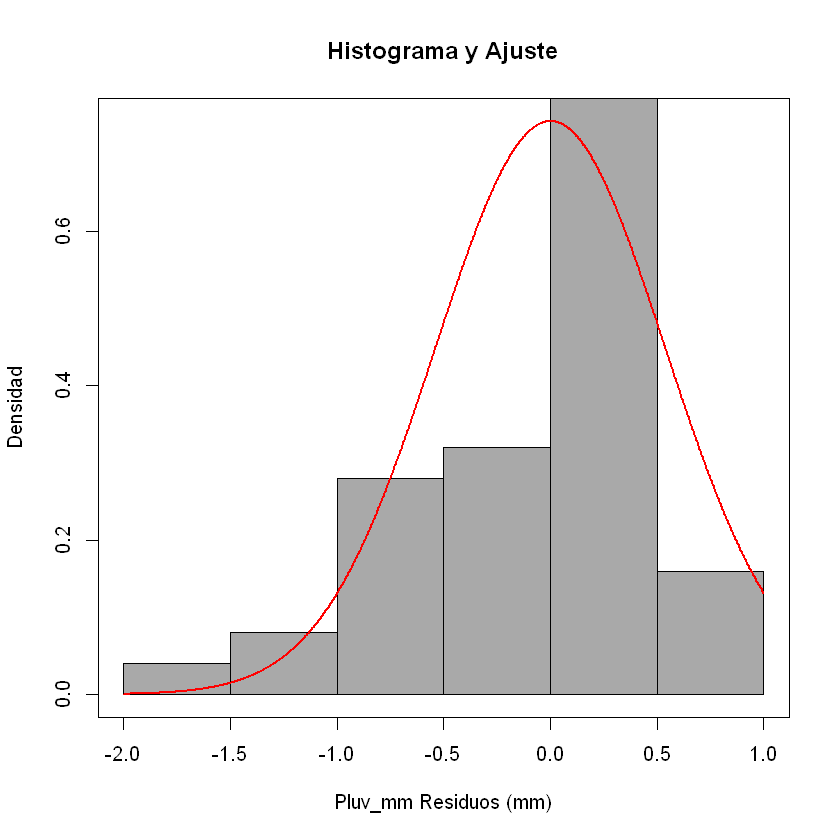

In [64]:
PARA_Residual_normal <- list(mean = as.numeric(FD_FP_Residual_normal[1,1]), 
                             sd = as.numeric(FD_FP_Residual_normal[2,1]))

HistModel(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, breaks = "Sturges", freq = FALSE, 
          main ="Histograma y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
          ylab = "Densidad", colCurve =  "red", col = "darkgray")

Se grafica su función de distribución acumulativa. Para esto se usa la función "CDF", esta requiere de los siguientes parámetros:

* Vector de los residuos (x)
* Tipo de distribución (distr), en este caso normal
* Parámetros de la distribución de probabilidad seleccionada (para), en este caso esos fueron estimados durante el análisis de los residuos y deben ingresarse en formato de lista
* Se indica el color de la función empírica (col)
* Se indica el título del gráfico (main)
* Se indica la leyenda del eje X (xlab)
* Se indica el color de la curva de la función teórica (lcol)
* Se indica el grosor de la línea de la función teórica (lwd)

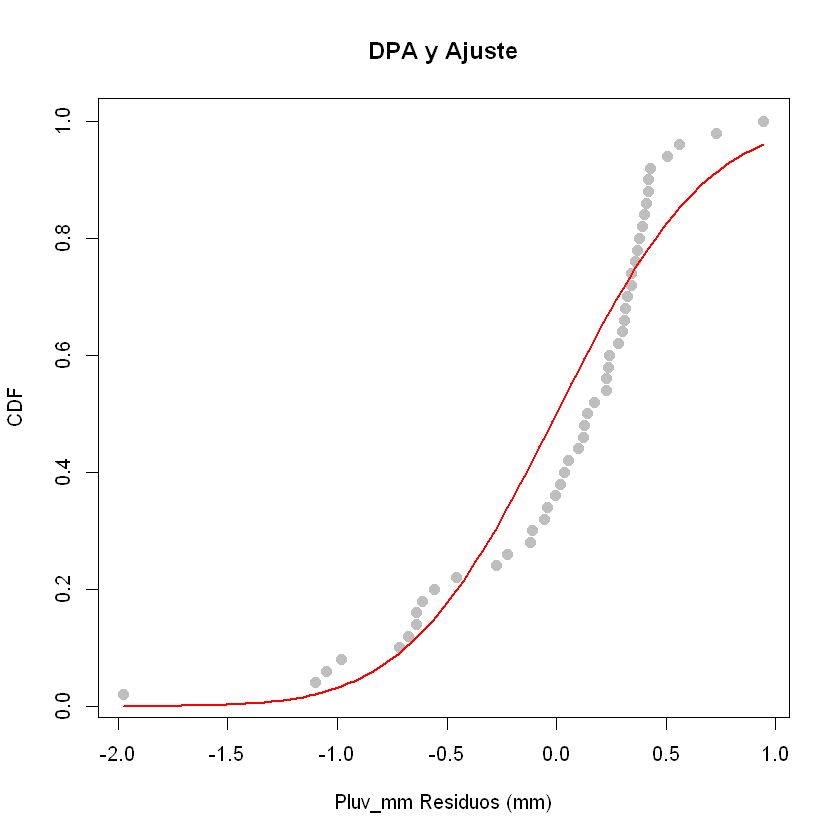

In [65]:
CDF(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "DPA y Ajuste", 
    xlab = "Pluv_mm Residuos (mm)", lcol = "red", lwd = 2)

El Grafico cuantil-cuantil (Q-Q plot) se puede graficar usando la función "QQplot", esta requiere de los siguientes parámetros:

* Vector de los residuos (x)
* Tipo de distribución (distr), en este caso normal
* Parámetros de la distribución de probabilidad seleccionada (para), en este caso esos fueron estimados durante el análisis de los residuos y deben ingresarse en formato de lista
* Se indica el color de la función empírica (col)
* Se indica el título del gráfico (main)
* Se indica la leyenda del eje X (xlab)
* Se indica el color de la curva de la función teórica (lcol)
* Se indica el grosor de la línea de la función teórica (lwd)

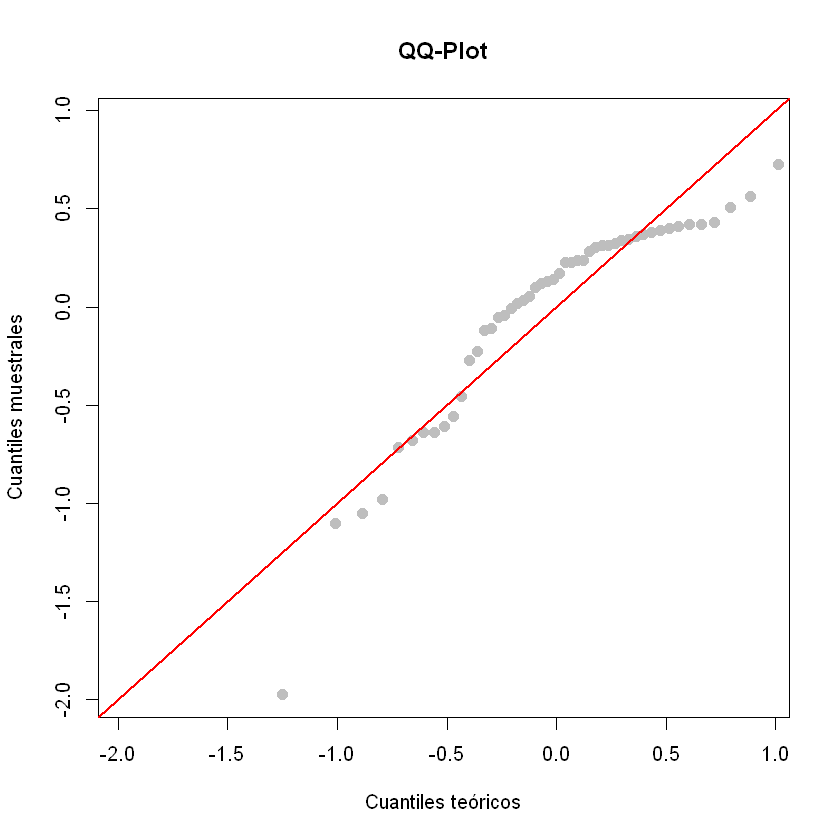

In [66]:
QQplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "QQ-Plot", 
       xlab = "Cuantiles teóricos", lcol = "red", lwd = 2)

El Grafico percentil-percentil (P-P plot) se puede graficar usando la función "PPplot", esta requiere de los siguientes parámetros:

* Vector de los residuos (x)
* Tipo de distribución (distr), en este caso normal
* Parámetros de la distribución de probabilidad seleccionada (para), en este caso esos fueron estimados durante el análisis de los residuos y deben ingresarse en formato de lista
* Se indica el color de la función empírica (col)
* Se indica el título del gráfico (main)
* Se indica la leyenda del eje X (xlab)
* Se indica el color de la curva de la función teórica (lcol)
* Se indica el grosor de la línea de la función teórica (lwd)

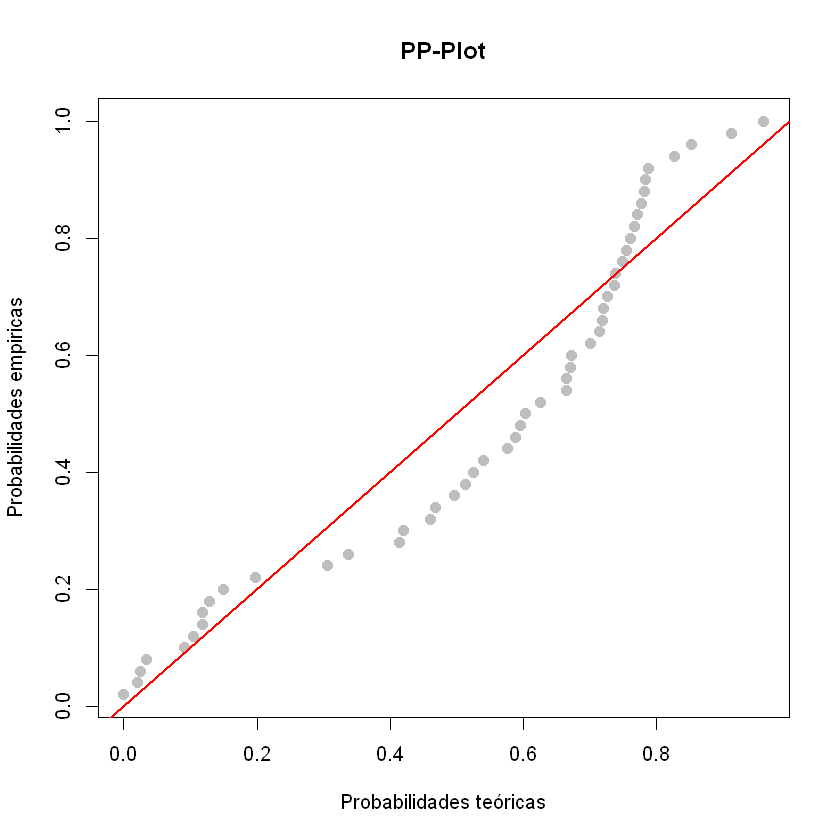

In [67]:
PPplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "PP-Plot", 
       xlab = "Probabilidades teóricas", lcol = "red", lwd = 2)

### Análisis bivariado: Y vs Y residual.

Ahora necesitamos evaluar si los valores obtenidos del pluviómetro tienen una relación con los residuos, para esto necesitamos el gráfico de dispersión. El cual generamos de la siguiente forma:

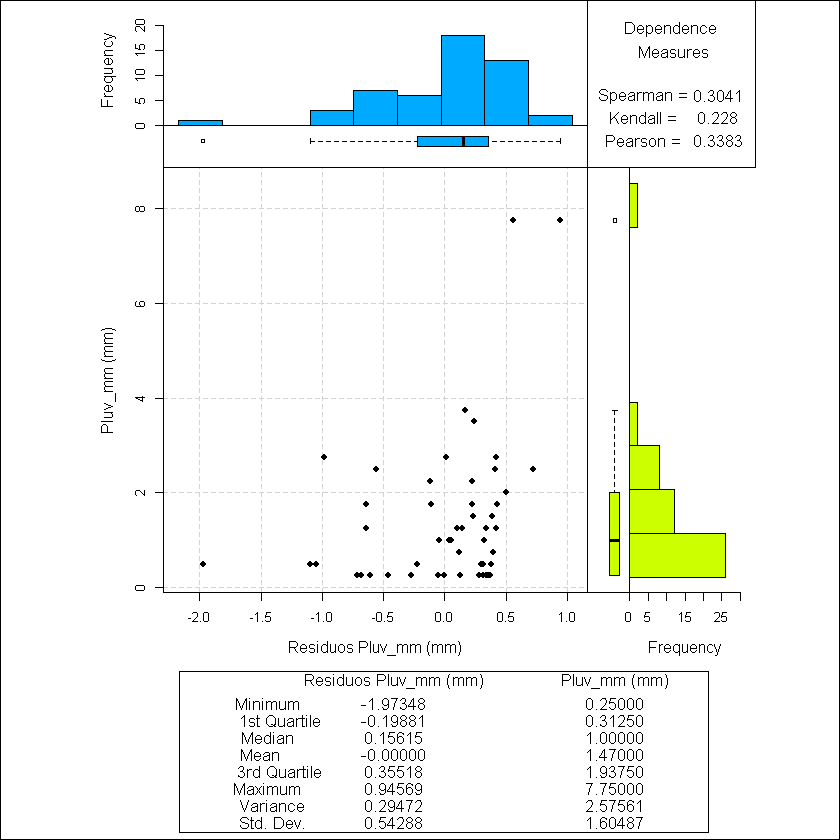

In [68]:
X<-Y_Residual   # Y_Residual is the independent variable

Y<-Pluv_mm      # Pluv_mm is the dependent variable

ScatterPlot(X, Y, 9, 
           Xmin = Y_Residual_Stat[2,2], Xmax = Y_Residual_Stat[7,2], 
           Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], XLAB = "Residuos Pluv_mm (mm)", YLAB = "Pluv_mm (mm)")

En este grafico podemos notar que la medida de dependencia lineal de Pearson es de 0.339, Spearman es de 0.3041 y Kendall es de 0.228. Esto nos da como conclusión que la regresión lineal no cumple con la condición no correlación entre los residuos y las muestras del pluviómetro.

## Análisis estadístico bivariado con variables transformadas.

Ahora haremos el caso donde las variables (Radar_mm, Pluv_mm) tienen transformada logarítmica. Se escogió que las variables aleatorias usen esta transformación por los resultados que se tuvieron con la variable aleatoria de las muestras obtenidas con el pluviómetro.

### Grafico de dispersión.

En el gráfico de dispersión podemos notar que las medidas de dependencia tienen los siguientes valores:

* Spearman (0.848)
* Kendall (0.7187)
* Pearson (0.8256)

Si comparamos las medidas de dependencia de este análisis estadístico bivariado con el anterior análisis podemos notar que el coeficiente de correlación de Pearson cambió de 0.9410 a 0.8256, mientras que los coeficientes de Spearman y Kendall se mantuvieron. Esto muestra una gran ventaja al usar los coeficientes de Spearman y Kendall ya que no se ven afectados ante transformaciones.

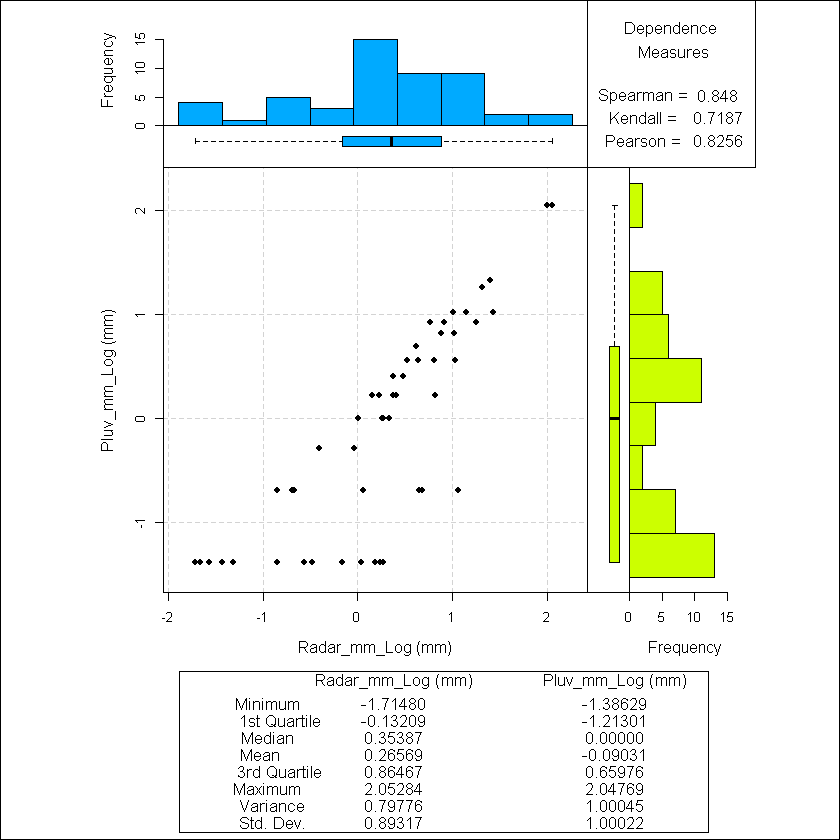

In [69]:
ScatterPlot(Radar_mm_Log , Pluv_mm_Log, 9, 
            Xmin = Radar_mm_Log_Stat[2,2], Xmax = Radar_mm_Log_Stat[7,2], 
            Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], 
            XLAB = "Radar_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

### Análisis de regresión lineal.

Ahora obtendremos los valores de la regresión lineal.

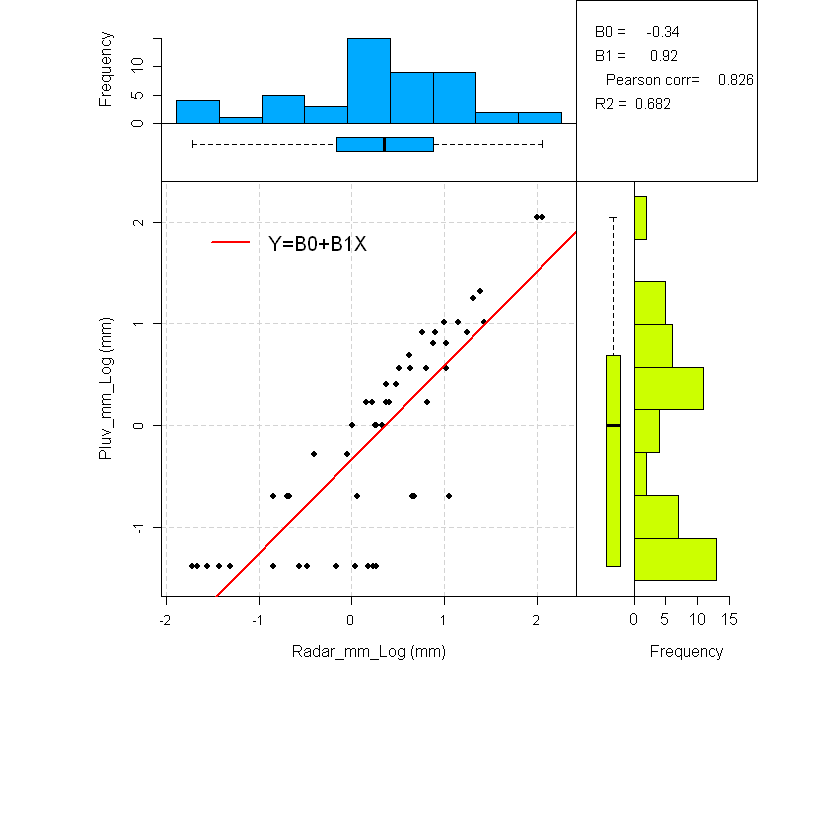

In [70]:
scaterplotReg(Radar_mm_Log , Pluv_mm_Log, 9, 
              Xmin = Radar_mm_Log_Stat[2,2], Xmax = Radar_mm_Log_Stat[7,2], 
              Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], 
              XLAB = "Radar_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

los valores de la regresión lineal son:

In [71]:
# Linear Regression
X<-Radar_mm_Log
Y<-Pluv_mm_Log

linear_regression <-lm(Y ~ X)

# Linear Regression Parameters
B0 <- linear_regression$coefficients[1]
B0
B1 <- linear_regression$coefficients[2]
B1

(Intercept) 
 -0.3359718

X 
0.9246077

Y calculamos sus estadígrafos e histograma.

In [72]:
# Regression line and Residual Calculation
Y_Regression <- linear_regression$fitted.values
Y_Residual <- linear_regression$residuals

Y_Residual_Stat<-Estadisticas(Y_Residual)
write.csv(Y_Residual_Stat , file = "Results/AED/Pluv_mm_Log_Residual_Stat.csv")
Y_Residual_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,5.000000e+01
minimos,Minimum,-1.335200e+00
cuantiles1,1st. Quartile,-1.624000e-01
medianas,Median,2.373000e-01
medias,Mean,0.000000e+00
cuantiles3,3rd. Quartile,3.924000e-01
maximos,Maximum,5.445000e-01
rangos,Rank,1.879700e+00
rangosInt,Interquartile Rank,5.548000e-01


Y también se grafican sus histogramas.

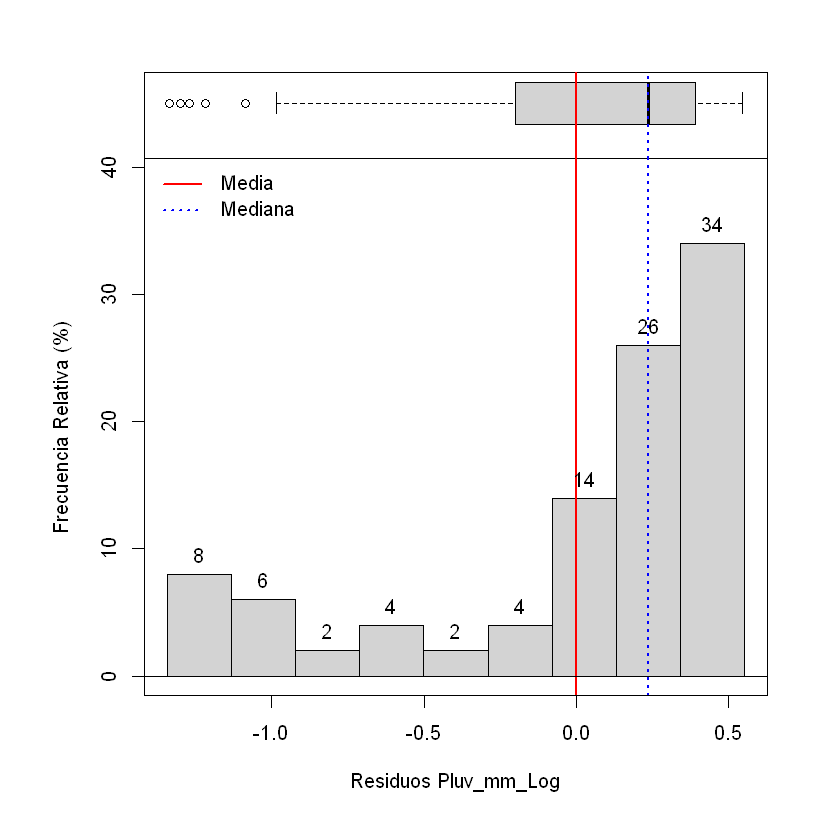

In [73]:
HistBoxplot(x=Y_Residual, mean = Y_Residual_Stat[5,2], median = Y_Residual_Stat[4,2], main ="", 
            xlab = "Residuos Pluv_mm_Log", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE )

En este caso podemos ver que el histograma presenta asimetría negativa con cuatro valores atípicos localizados a la izquierda. La diferencia entre la media y la mediana es de 0.2373, la cual es alta.

Warning message in hist.default(data, breaks = breaks, plot = FALSE, ...):
"argument 'col' is not made use of"


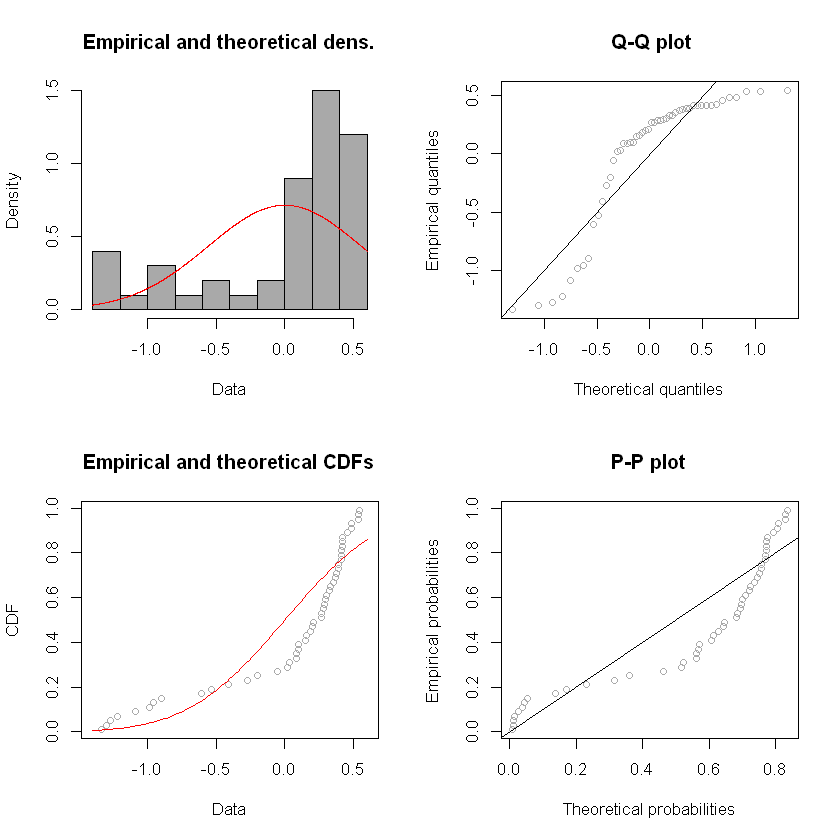

In [74]:
FitDistr2_Residual_normal<-FitDistribution(data = Y_Residual, DISTR="norm", BREAKS = "Sturges", 
                                           col = "darkgray", DistName = "Normal")

Analizando los residuos podemos notar que el histograma con la distribución normal (figura superior izquierda) nos muestra que los residuos no son normales, en especial los valores localizados a los extremos del histograma. El grafico Q-Q plot (figura superior derecha) también muestra que pocas muestras están en la recta. La grafica comparativa entre las funciones de distribución acumulativas empírica y teórica (figura inferior izquierda) no muestra un buen ajuste y en el caso del grafico P-P plot (figura inferior derecha) hay muy pocas muestras cercanas a la recta. Con esto podemos concluir que los residuos no cumplen con los requisitos de la regresión lineal.

In [75]:
FD_HT_Residual_normal<-FitDistr2_Residual_normal$x
FD_HT_Residual_normal

Method,Significance level,P-value,Statistical,Decision
<chr>,<chr>,<chr>,<chr>,<chr>
Kolmogorov-Smirnov,0.05,0.004802,0.2412,Rechazo H0
Anderson-Darling,0.05,0.006424,4.282,Rechazo H0


Las pruebas de normalidad de Kolmogorov-Smirnov y Anderson-Darling confirman lo analizado con los graficos.

In [76]:
FD_FP_Residual_normal<-FitDistr2_Residual_normal$y
FD_FP_Residual_normal

,Normal
,<dbl>
Mean,3.880360e-18
Standard deviation,5.586384e-01
Maximum likelihood,-4.183428e+01
AIC,8.766856e+01


Graficamos las comparativas entre el histograma y la funcion de distribución normal.

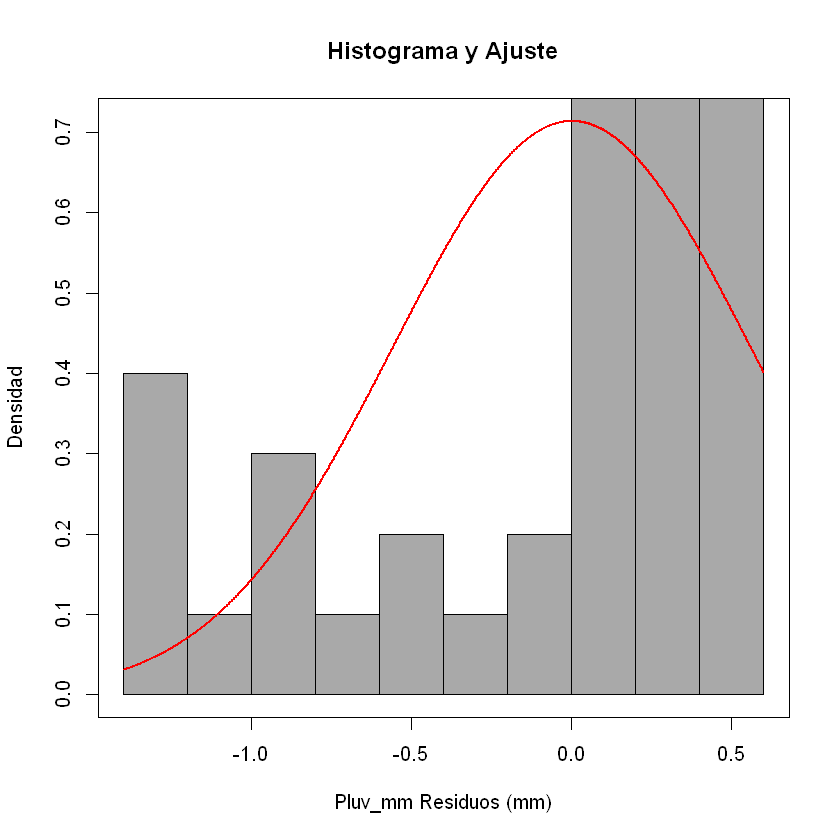

In [77]:
PARA_Residual_normal <- list(mean = as.numeric(FD_FP_Residual_normal[1,1]), sd = as.numeric(FD_FP_Residual_normal[2,1]))

HistModel(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, breaks = "Sturges", 
          freq = FALSE, main ="Histograma y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
          ylab = "Densidad", colCurve =  "red", col = "darkgray")

Graficamos las comparativas entre la función de distribución acumulativa empírica y la función de distribución acumulativa normal.

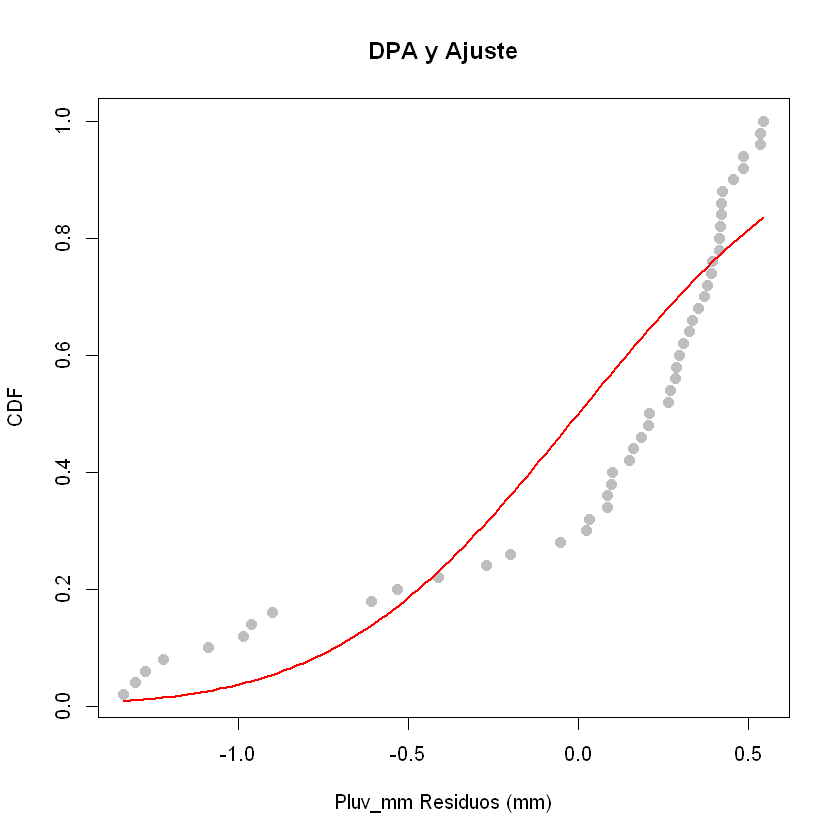

In [78]:
CDF(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "DPA y Ajuste", 
    xlab = "Pluv_mm Residuos (mm)", lcol = "red", lwd = 2)

El Grafico cuantil-cuantil (Q-Q plot). 

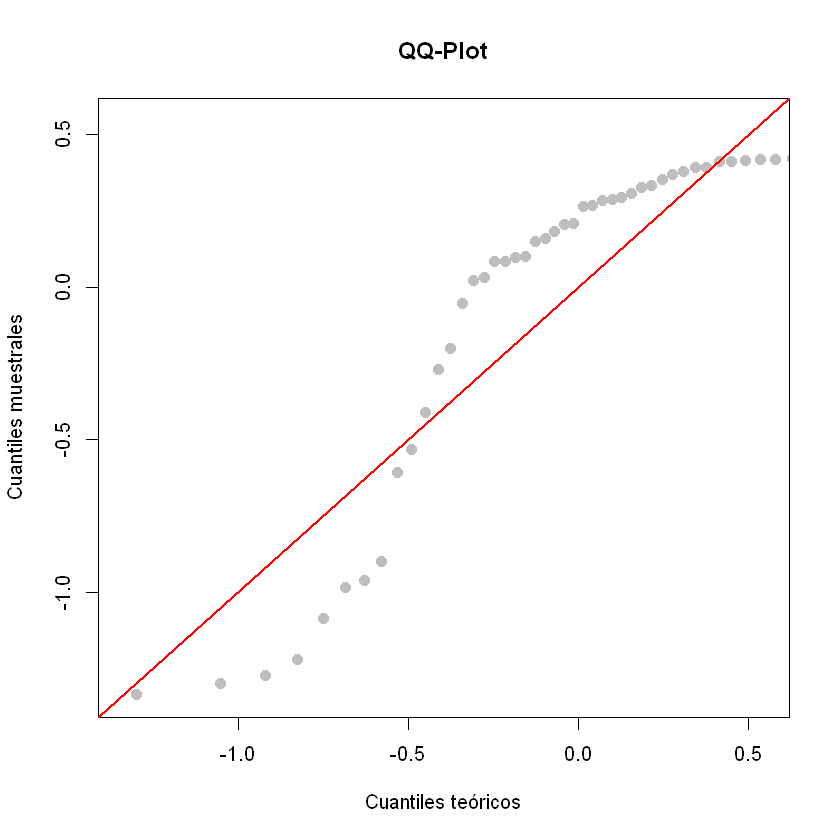

In [79]:
QQplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "QQ-Plot", 
       xlab = "Cuantiles teóricos", lcol = "red", lwd = 2)


El Grafico Percentil-percentil (P-P plot).

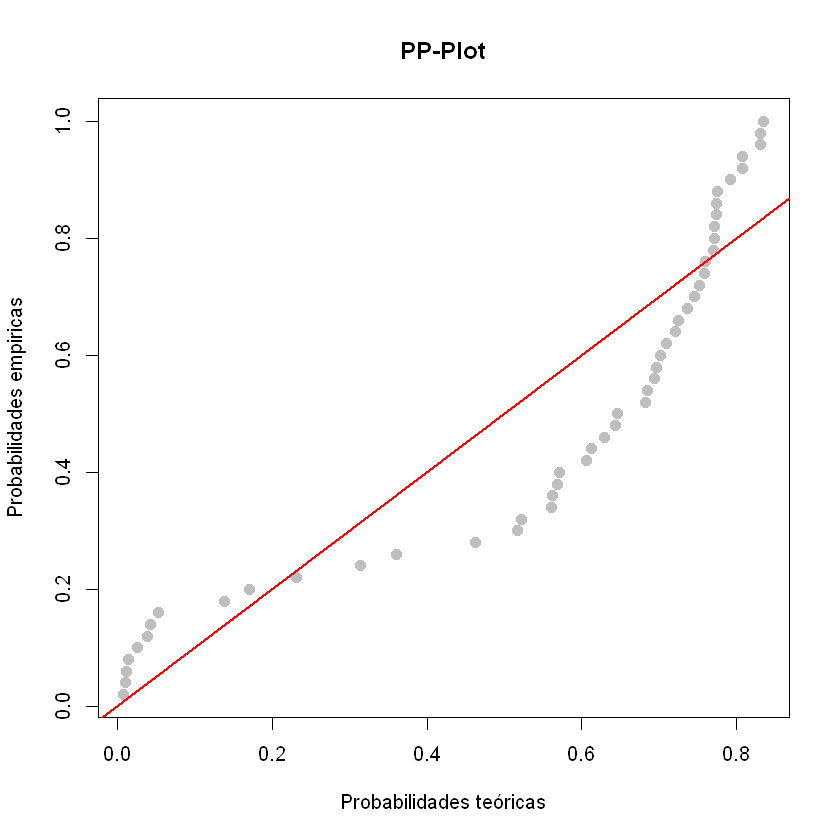

In [80]:
PPplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "PP-Plot", 
       xlab = "Probabilidades teóricas", lcol = "red", lwd = 2)

### Análisis bivariado: Y vs Y residual.


In [81]:
X<-Y_Residual     # Y_Residual es la variable independiente
Y<-Pluv_mm_Log    # Pluv_mm_Log es la variable dependiente

Ahora analizaremos la dependencia entre la variable aleatoria con transformación logarítmica y sus residuos. Se hace el grafico de dispersión.

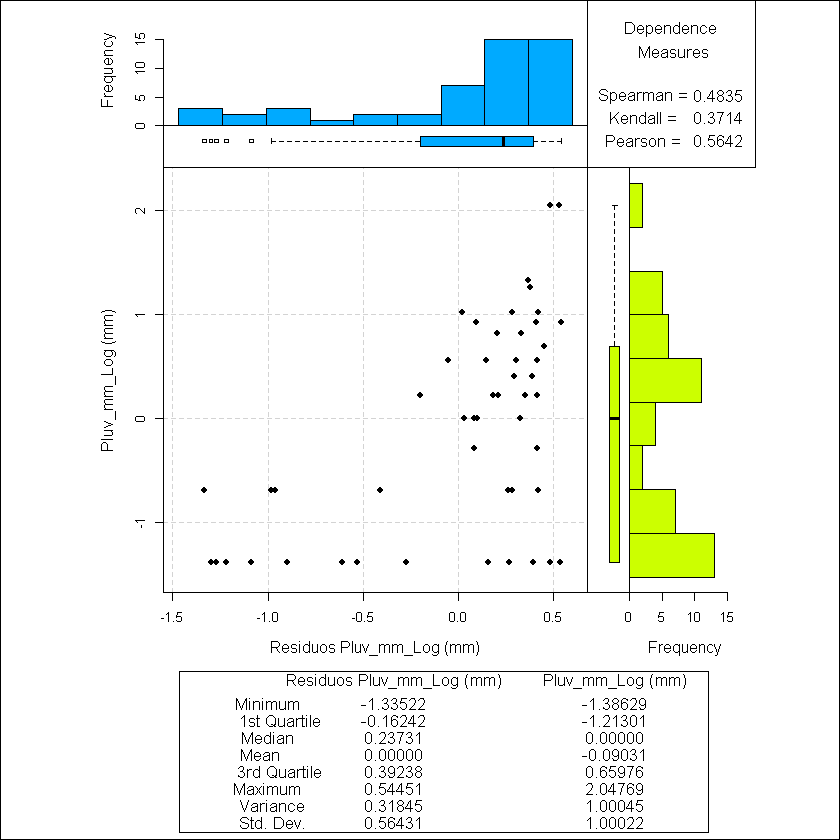

In [82]:
ScatterPlot(X, Y, 9, 
           Xmin = Y_Residual_Stat[2,2], Xmax = Y_Residual_Stat[7,2], 
           Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], 
           XLAB = "Residuos Pluv_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

El resultado de las medidas de dependencia muestra que la dependencia es considerable. Pearson tiene un valor de 0.5702, Spearman es de 0.4971 y Kendall es de 0.3818. Con esta última prueba podemos concluir que la regresión lineal usando las variables aleatorias transformadas no cumplió con ninguna de las condiciones.

Con el caso de las muestras obtenidas de los pluviómetros, podemos ver que los valores atípicos se localizan en los mismos lugares de los valores atípicos obtenidos del radar meteorológico, por lo que debemos tomar en cuenta esta información para el análisis variografico.

# Análisis variográfico.

Ahora que sabemos cuál es el comportamiento de las variables aleatorias y escogimos la mejor opción continuamos con el análisis variográfico.

## Análisis variográfico variable Radar_mm_Log

Al igual que el análisis exploratorio, necesitamos saber cómo están distribuidos los valores de la variable, para esto usamos la función "DEspacial". Esta función necesita los siguientes parámetros:

* Vector de las coordenadas (XCoord,YCoord) 
* la variable que usaremos que en este caso es la variable de los pluviómetros con transformada logarítmica (Pluv_mm_Log)
* Número de intervalos para el histograma (n_bins)
* Leyendas para el eje X, eje Y, histograma y título de la imagen

Cuando ejecutamos esta función obtenemos la siguiente imagen:

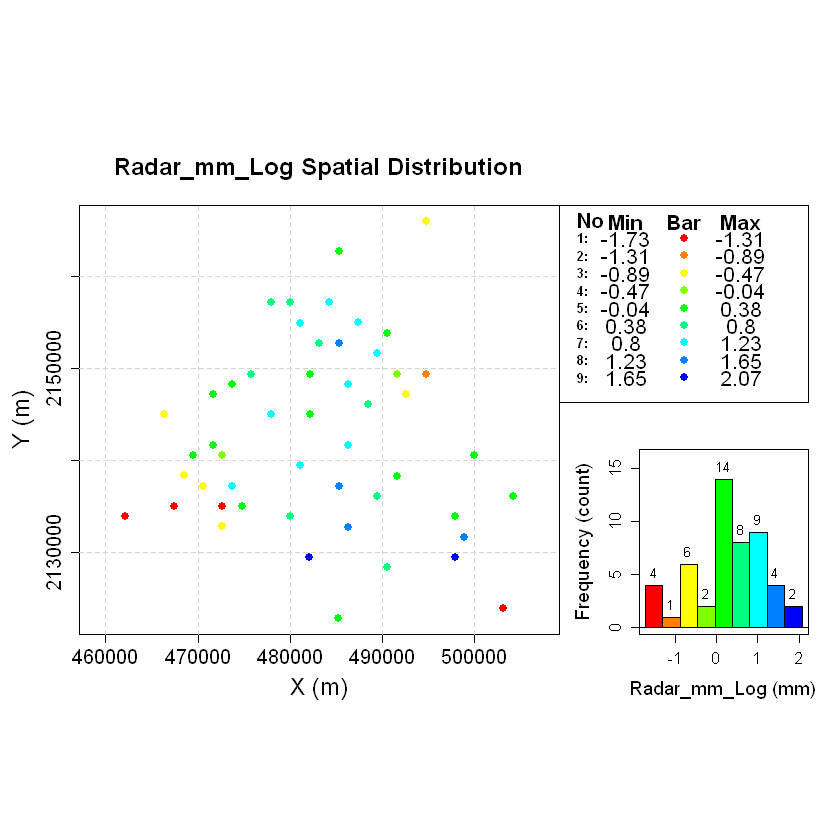

In [83]:
DEspacial(XCoord, YCoord, Radar_mm_Log,n_bins=9,
          'X (m)', 'Y (m)', 'Radar_mm_Log (mm)', 'Radar_mm_Log Spatial Distribution')

El gráfico que obtenemos nos da la distribución espacial de las muestras con puntos de distintos colores, siendo los colores rojo y azul los valores extremos. A la derecha del grafico tenemos el histograma que por default tiene nueve intervalos (bins).

### Análisis de tendencia de la variable Radar_mm_Log.
Para determinar si la variable es estacionaria usamos dos fuentes de información: 

* Análisis de regresión de la mediana en la dirección X y en la dirección Y
* Estimar el variograma.

El gráfico de regresión de la mediana nos informa si existe algún indicio de tendencia siguiendo el siguiente criterio: 

* Si la regresión es paralela a la línea de la media entonces la variable no tiene tendencia
* Si la regresión no es paralela entonces la variable podría tener algún grado de tendencia. 

Cabe aclarar que esta prueba solo nos da indicios de la posible tendencia, mas no es determinante. El variograma es la prueba fuerte que nos indica si la variable tiene tendencia.

Para el análisis de regresión de la mediana usamos la función "GDirecciones", esta requiere de los siguientes parámetros:

* Vector de las coordenadas (XCoord, YCoord)
* La variable a analizar, en este caso Radar_mm_Log.

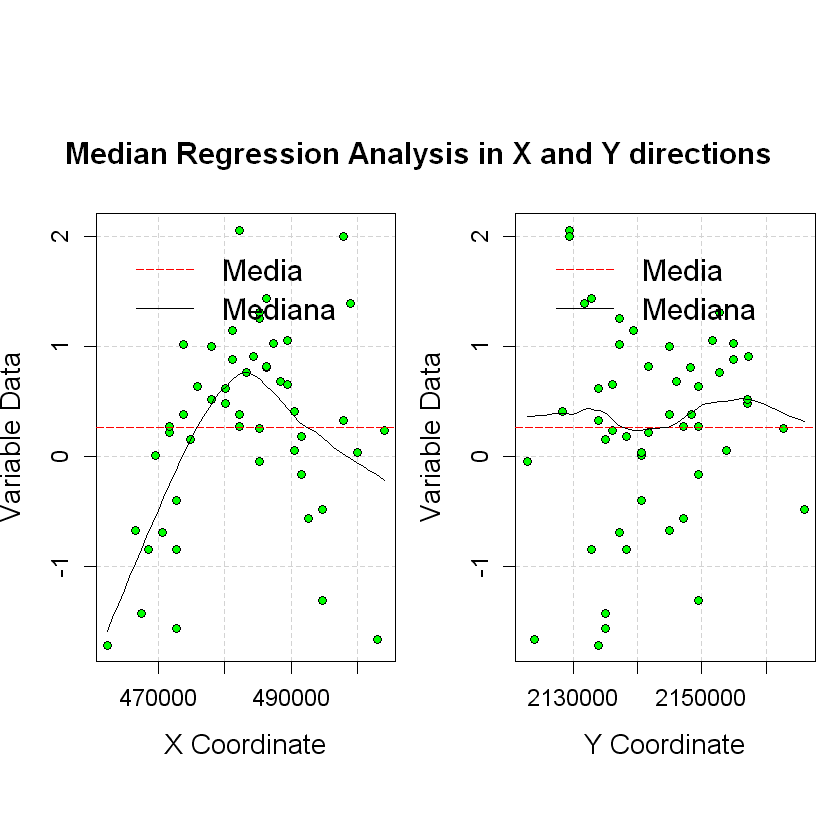

In [84]:
GDirecciones(XCoord, YCoord, Radar_mm_Log)

Analizando el resultado de la regresión podemos notar que en el eje de coordenadas X tiene una curva ascendente, llega a su punto más alto a la mitad del gráfico y después desciende, lo cual podemos considerar como un indicio de tendencia. Con el caso del eje de coordenadas Y vemos que su regresión es cercana a la línea del valor esperado lo cual nos indica que su nivel de tendencia es muy bajo. Esto lo confirmaremos cuando se estime los variogramas direccionales.

Para estimar el variograma experimental necesitamos:

* Número de intervalos (lags)
* Distancia mínima (DistMin)
* Distancia máxima (DistMax)
* Valor de intervalo (lag value)

Definimos el número de intervalos que deseamos usar. Si la distribución espacial de la variable esta muestreada en una malla regular, entonces usamos la información de dicha malla para definir el valor y numero de intervalo; de lo contrario hay que calcular la distancia máxima y mínima de las muestras. Para este caso el número que seleccionamos es 10.

In [85]:
N_lags<-10
N_lags

[1] 10

Calculamos la distancia mínima entre muestras usando la función "dist" y "min", el argumento "Data_File[,1:2]" indica que se está usando las coordenadas. La distancia mínima de este ejemplo es de 1525.79.

In [86]:
DistMin<-min(dist(Data_File[,1:2])) # Minimum distance in data
DistMin

[1] 1525.8

In [87]:
Data_File[,1:2]

UTM_X_m,UTM_Y_m
<int>,<int>
485303,2162682
484253,2157150
487403,2154937
490552,2153830
489502,2151601
480054,2157142
481104,2154828
483203,2152713
475855,2149399


La distancia máxima entre muestras se calcula usando la función "dist" y "max", en este caso es de 45696.15

In [88]:
DistMax<-max(dist(Data_File[,1:2])) # Maximum distance in data
DistMax

[1] 45696.16

El valor de intervalo se calcula dividiendo entre dos el valor de la distancia máxima y después dividir el valor resultante entre el número de intervalos. En este caso el valor de intervalo es de 2284.8

In [89]:
lag_value<- (DistMax/2)/N_lags # DistMin
lag_value

[1] 2284.808

Ahora hay que comparar el valor de la distancia mínima (DistMin) con el valor de intervalo (lag_value). 

* Si el valor de intervalo calculado con (DistMax/2)/N_lags es menor a la distancia mínima entonces no usamos el valor de intervalo debido a que no hay pares que cumplan con esa distancia, en su lugar usamos el valor de la distancia mínima. 

* Si el valor del intervalo calculado con (DistMax/2)/N_lags es mayor a la distancia mínima, entonces podemos decidir cualquiera de los dos valores 


Ya que tenemos estos valores podemos estimar el variograma experimental adireccional, el cual tiene por dirección 0º y ángulo de tolerancia de 90º. De forma gráfica el cálculo del variograma se puede ver de la siguiente forma:

![adireccional_2.png](images/adireccional_2.png)

Para estimar el variograma adireccional se usa la función "Variograma", Esta función necesita:

* Coordenadas (XCoord, YCoord)
* Variable (Pluv_mm_Log)
* Una dirección (Direccion) y su tolerancia angular (Tol), como en este caso es variograma adireccional la dirección es de 0º y su tolerancia es de 90º.
* Número de intervalos (N_lags)
* Valor del intervalo (lag_value)
* Número de pares mínimo, por default es 1
* Titulo del gráfico.

La función "Variograma" usa el estimador clásico o método de momentos, el cual es:

$$\gamma^*(\underline{h})=\frac{1}{2N(\underline{h})}{\sum_{i=1}^{N(\underline{h})}}\left[{Z(\underline{x}_i+\underline{h})-Z(\underline{x}_i)}\right]^2 $$

variog: computing omnidirectional variogram


Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
5,1142.404,0.4148882
50,3427.212,0.3506868
70,5712.020,0.3884817
95,7996.827,0.4841424
99,10281.635,0.6656620
108,12566.443,0.6656483
101,14851.251,0.7492239
118,17136.059,0.7527673
107,19420.867,0.9285426


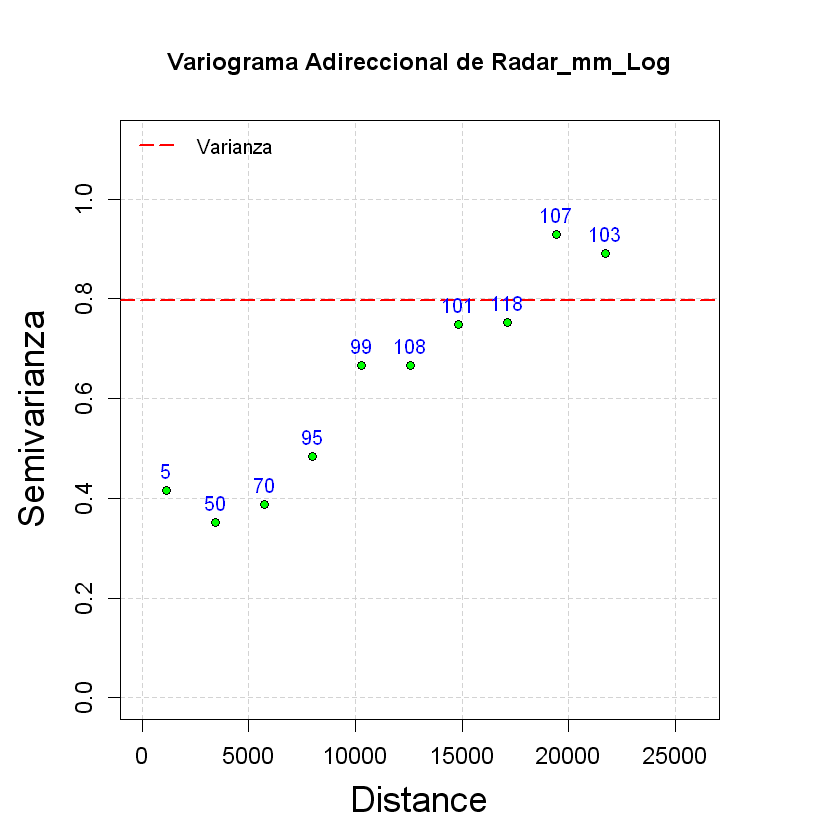

In [90]:
Radar_mm_Log_VarioEstimation<-Variograma(XCoord, YCoord, Radar_mm_Log, Direccion=0, Tol=90, 
                                         NIntervalos=N_lags, Lags=lag_value, Npares=1, 
                                         "Variograma Adireccional de Radar_mm_Log", xlab="Distance")
Radar_mm_Log_VarioEstimation

Observando el resultado del variograma experimental adireccional se observa que no hay evidencias de tendencia, ya que el variograma crece hasta que se acota en la varianza, lo cual indica que esta variable al menos cumple con la hipótesis intrínseca.

Si por alguna razón la variable presenta evidencias de tendencia, entonces hay que aplicar una transformación polinomial.

La transformación polinomial de primer orden tiene la siguiente forma:

$$Z_1(x)=m_1(x)+R_1(x)$$

La transformación polinomial de segundo orden es:

$$Z_2(x)=m_2(x)+R_2(x)$$

La transformación polinomial se puede hacer usando la función "Trend", la cual necesita los siguientes parámetros:

* Vector de las coordenadas (XCoord, YCoord)
* La variable (Pluv_mm_Log) 
* El grado del polinomio (pol_degree).

In [91]:
pol_degree=1
Radar_mm_Log_Detrended_1<-Trend(XCoord, YCoord, 
                                Radar_mm_Log, pol_degree)

Con esta transformación volvemos a graficar la regresión de la mediana y el variograma experimental adireccional.

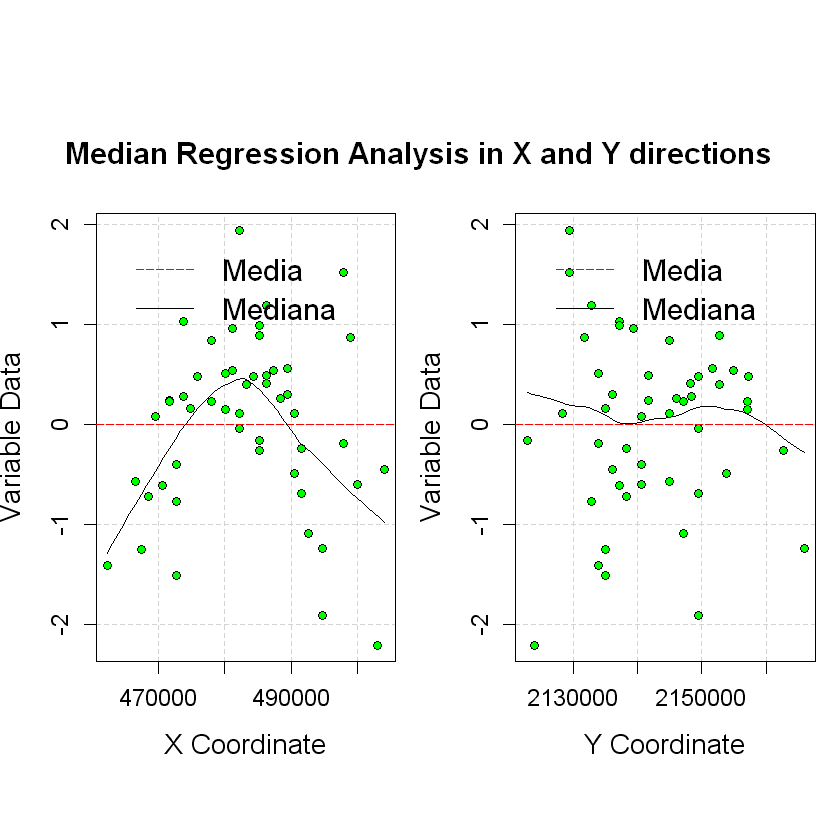

In [92]:
GDirecciones(Radar_mm_Log_Detrended_1[,1], Radar_mm_Log_Detrended_1[,2], Radar_mm_Log_Detrended_1[,3])

variog: computing omnidirectional variogram


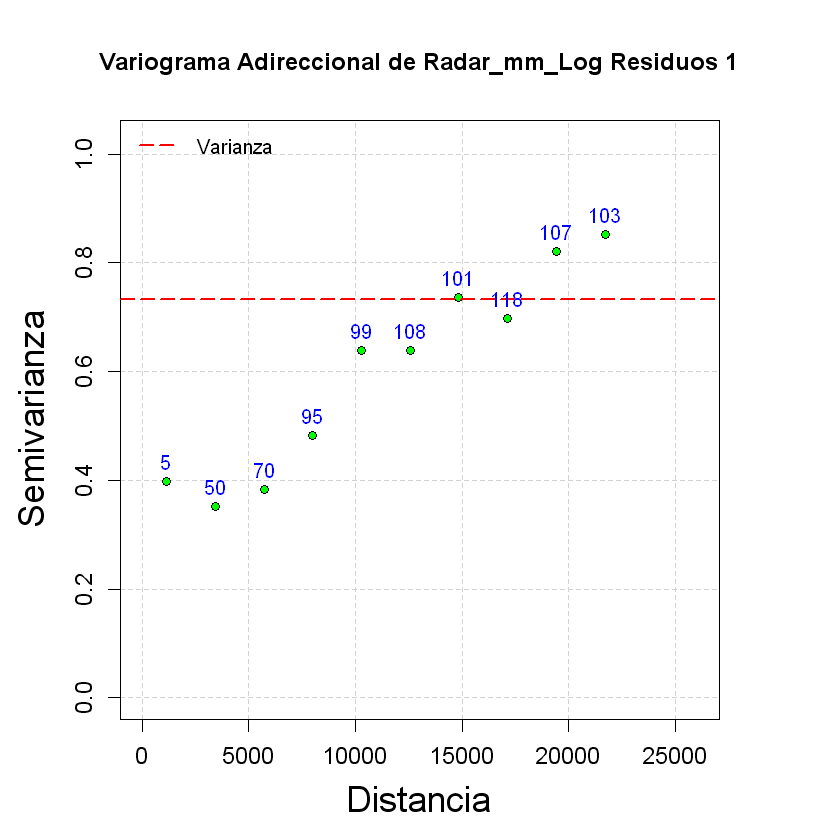

In [93]:
Radar_mm_Log_Detrended_1_VarioEstimation<-Variograma(Radar_mm_Log_Detrended_1[,1], Radar_mm_Log_Detrended_1[,2], 
                                                     Radar_mm_Log_Detrended_1[,3], 0, 90, N_lags, lag_value, 1, 
                                                     "Variograma Adireccional de Radar_mm_Log Residuos 1")

La transformación de segundo orden se hace de la siguiente forma.

In [94]:
pol_degree=2
Radar_mm_Log_Detrended_2<-Trend(XCoord, YCoord, 
                                Radar_mm_Log, pol_degree) 

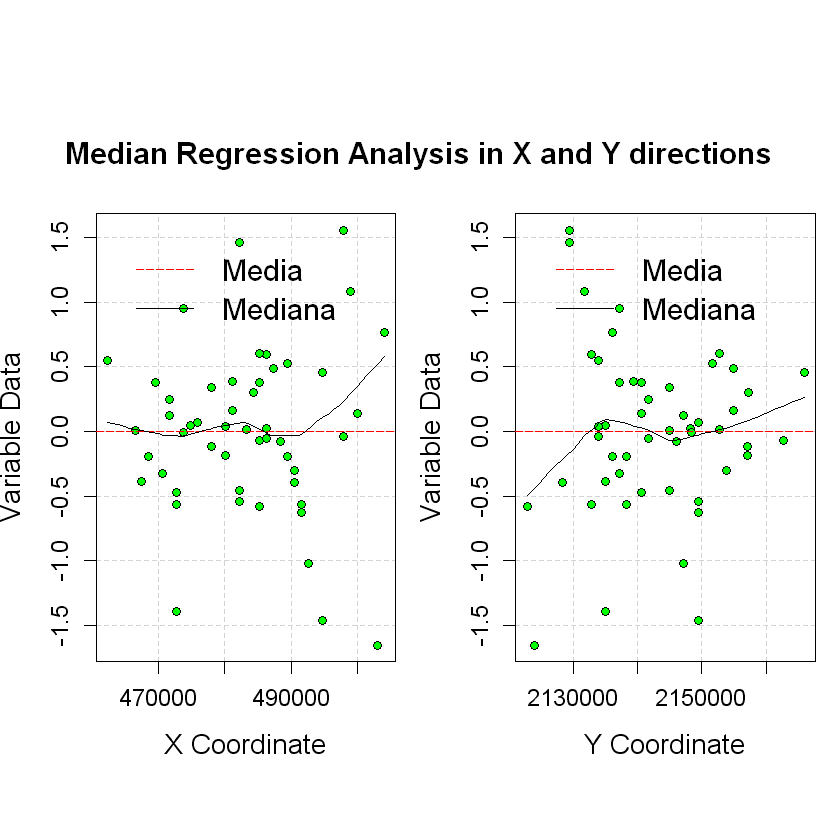

In [95]:
GDirecciones(Radar_mm_Log_Detrended_2[,1], Radar_mm_Log_Detrended_2[,2], Radar_mm_Log_Detrended_2[,3])

variog: computing omnidirectional variogram


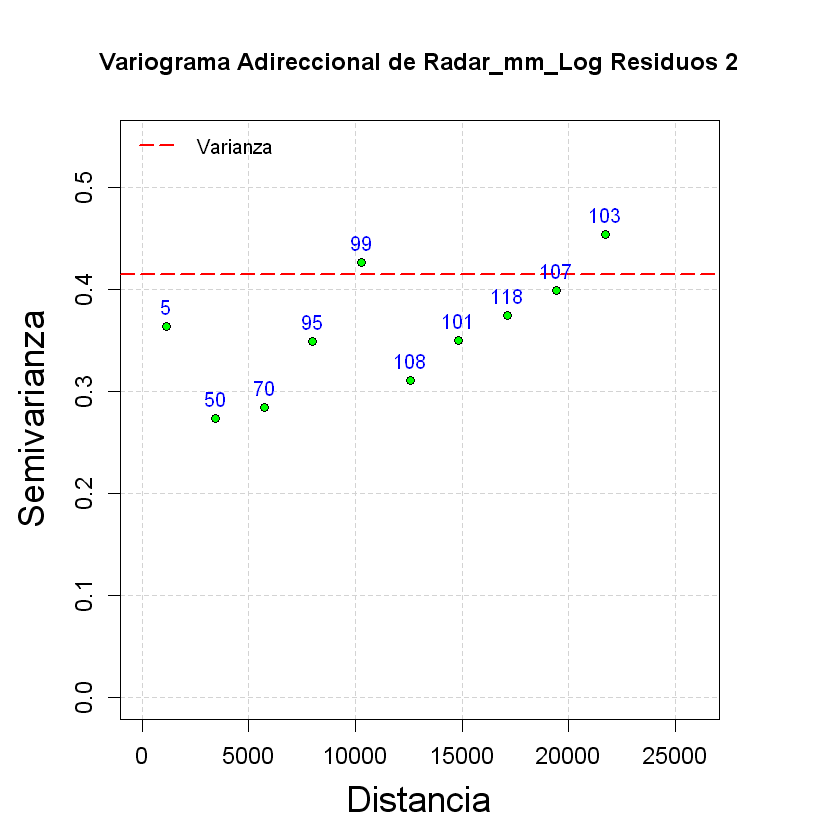

In [96]:
Radar_mm_Log_Detrended_2_VarioEstimation<-Variograma(Radar_mm_Log_Detrended_2[,1], Radar_mm_Log_Detrended_2[,2], 
                                                     Radar_mm_Log_Detrended_2[,3], 0, 90, N_lags, lag_value, 1, 
                                                     "Variograma Adireccional de Radar_mm_Log Residuos 2")

### Modelado variográfico unidimensional de la variable Radar_mm_Log

Después del análisis de tendencia, podemos empezar con el modelado del variograma. Por lo que empezaremos con el cálculo de los variogramas direccionales, esto para determinar si hay anisotropía.

El variograma adireccional se calcula de la siguiente forma:

variog: computing omnidirectional variogram


Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
5,1142.404,0.4148882
50,3427.212,0.3506868
70,5712.020,0.3884817
95,7996.827,0.4841424
99,10281.635,0.6656620
108,12566.443,0.6656483
101,14851.251,0.7492239
118,17136.059,0.7527673
107,19420.867,0.9285426


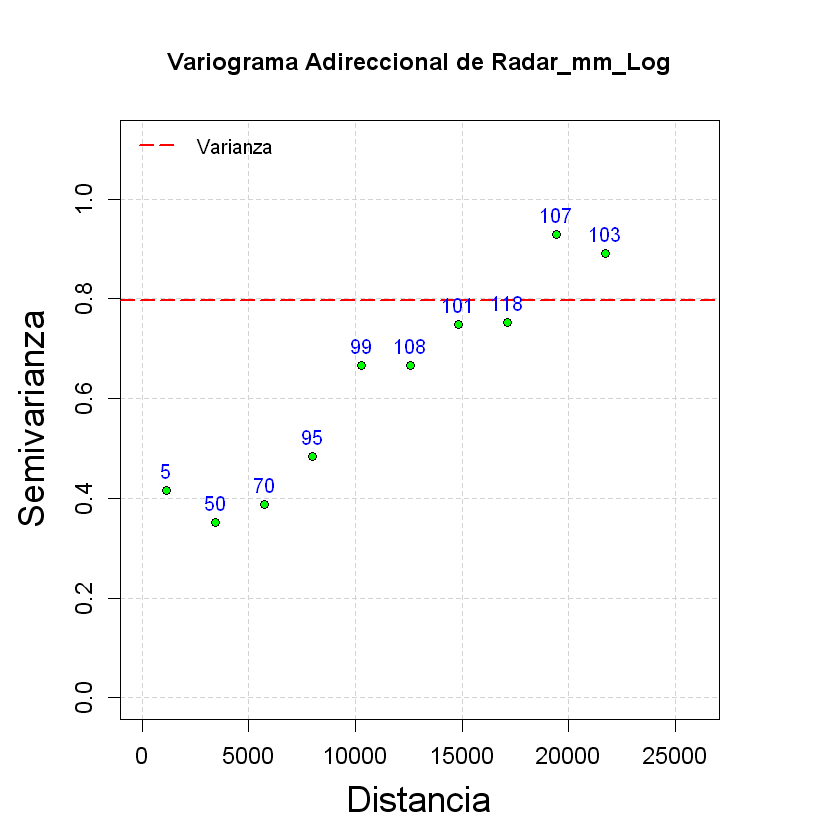

In [97]:
Radar_mm_Log_VarioEstimation<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, 0, 90, N_lags, lag_value, 1, 
                                         "Variograma Adireccional de Radar_mm_Log")
Radar_mm_Log_VarioEstimation

Para calcular los variogramas direccionales solo se cambian los parámetros en la función variograma:

* Coordenadas (XCoord, YCoord)
* Variable (Pluv_mm_Log)
* Dirección del vector, los cuales son: 0º, 45º, 90º y 135º
* Valor de la tolerancia angular, la cual es de 22.5º
* Número de intervalos (N_lags)
* Valor del intervalo (lag_value)
* Número de pares mínimo, por default es 1
* Titulo del gráfico.

Dado estos parámetros, se puede considerar las siguientes graficas que ilustran la forma de cálculo del variograma con los parámetros antes mencionados, para la dirección de vector 0º es:


![0_GRADOS_2.png](images/0_GRADOS_2.png)

$\textbf{Nota:}$ Esta imagen solo muestra el computo con respecto a un punto, el cálculo completo tiene que ser cubierto con todos los puntos

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
1,1142.404,0.2568134
14,3427.212,0.3895325
13,5712.020,0.3544580
25,7996.827,0.2065631
24,10281.635,0.3320694
31,12566.443,0.4505446
24,14851.251,0.4996824
31,17136.059,0.4989373
17,19420.867,0.7712610


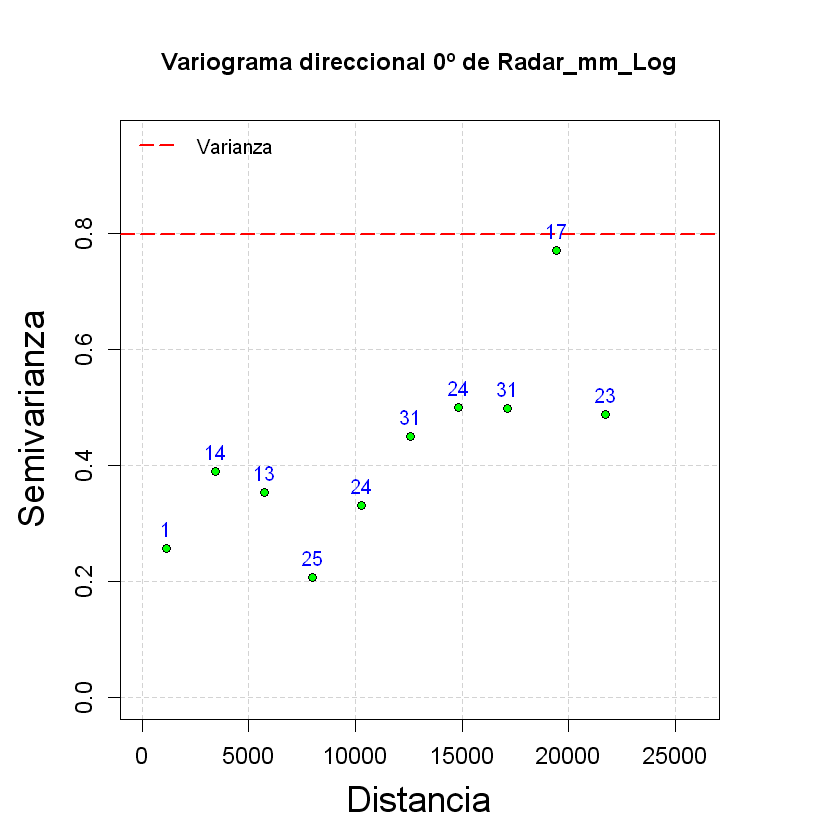

In [98]:
Radar_mm_Log_VarioEstimation_0<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, 0, 22.5, N_lags, lag_value, 1, 
                                           "Variograma direccional 0º de Radar_mm_Log")
Radar_mm_Log_VarioEstimation_0

Para el caso del variograma direccional 0º podemos notar que el variograma experimental en la dirección 0º no está bien estimado, solo dos intervalos tienen más de 30 pares. Por lo tanto, no se puede juzgar si esta dirección presenta anisotropía.

Calculamos el variograma direccional 45º

![45_GRADOS_2.png](images/45_GRADOS_2.png)

variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
14,3427.212,0.4056996
15,5712.020,0.2171602
22,7996.827,0.4577728
29,10281.635,0.6480578
24,12566.443,0.7136076
28,14851.251,0.8950589
35,17136.059,0.7515032
32,19420.867,0.9329158
40,21705.674,1.1707838


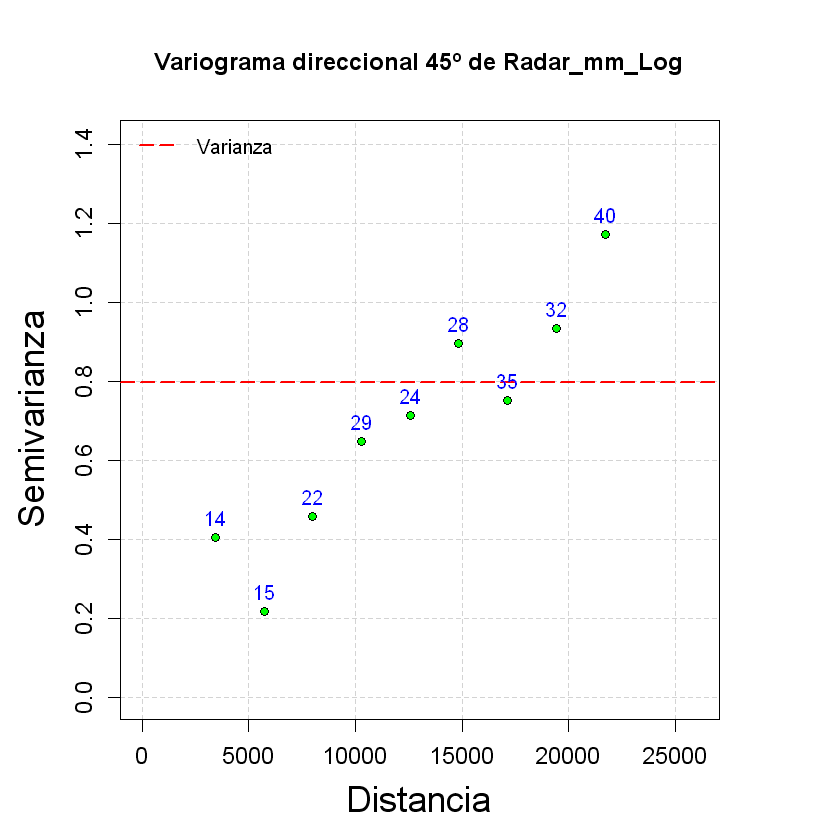

In [99]:
Radar_mm_Log_VarioEstimation_45<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, 45, 22.5, N_lags, lag_value, 1, 
                                            "Variograma direccional 45º de Radar_mm_Log")
Radar_mm_Log_VarioEstimation_45

Con el variograma direccional a 45º notamos el mismo problema detectado en el variograma direccional de 0º, solo tres intervalos tienen un número de pares superior a 30, por lo tanto, en esta dirección no se puede juzgar si existe algún tipo de anisotropía.

Probamos con el variograma direccional de 90º

![90_GRADOS_2.png](images/90_GRADOS_2.png)

variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
3,1142.404,0.5410586
10,3427.212,0.4084904
17,5712.020,0.4991839
22,7996.827,0.5986924
23,10281.635,0.6120796
32,12566.443,1.0541704
24,14851.251,1.0595848
28,17136.059,1.0000044
30,19420.867,1.2713758


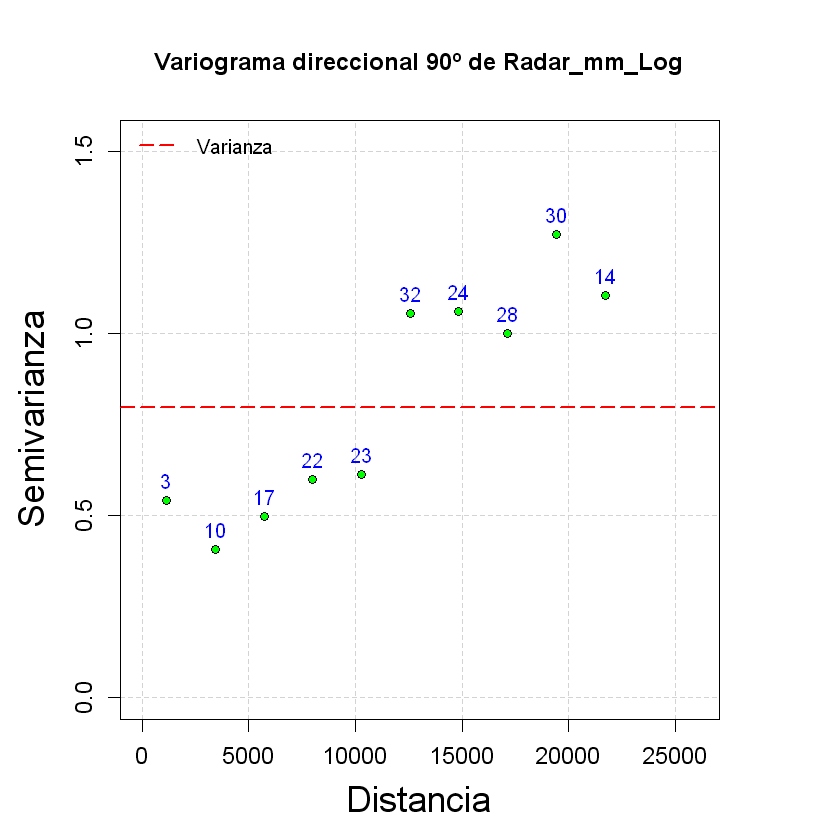

In [100]:
Radar_mm_Log_VarioEstimation_90<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, 90, 22.5, N_lags, lag_value, 1, 
                                            "Variograma direccional 90º de Radar_mm_Log")
Radar_mm_Log_VarioEstimation_90

Con el variograma direccional de 90º seguimos obteniendo intervalos mal estimados, solo dos tiene más de 30 pares y por lo tanto no se puede juzgar si existe anisotropía en esta dirección.

Seguimos con el variograma direccional de 135º.

![135_GRADOS_2.png](images/135_GRADOS_2.png)

variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
1,1142.404,0.1944516
12,3427.212,0.1930156
25,5712.020,0.4336894
26,7996.827,0.6764315
23,10281.635,1.0895375
21,12566.443,0.3363382
25,14851.251,0.5275022
24,17136.059,0.7940313
28,19420.867,0.6517157


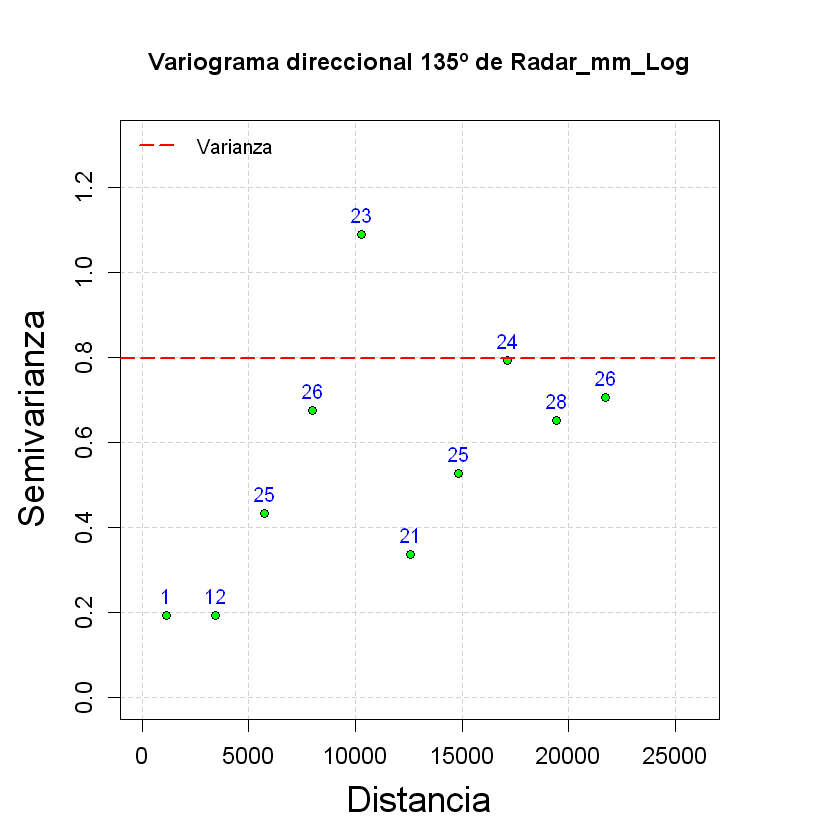

In [101]:
Radar_mm_Log_VarioEstimation_135<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, 135, 22.5, N_lags, lag_value, 1, 
                                             "Variograma direccional 135º de Radar_mm_Log")
Radar_mm_Log_VarioEstimation_135

El variograma direccional a 135º no tiene intervalos con un número de pares superior a 30, de todos los casos direccionales este es el peor y al igual que los demás, no se puede juzgar si existe anisotropía.

Para visualizar los cuatro variogramas direccionales en una sola imagen usamos la función "Variograma4D". Esta función necesita 
* Vector de las coordenadas (XCoord, YCoord)
* La variable (Pluv_mm_Log) 
* Las direcciones del vector en grados (0, 45, 90, 135)
* El ángulo de tolerancia (22.5)
* El número de intervalos (N_lags)
* El valor del intervalo (lag_value)
* Número mínimo de pares, el cual por default es uno.
* Titulo de la imagen

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


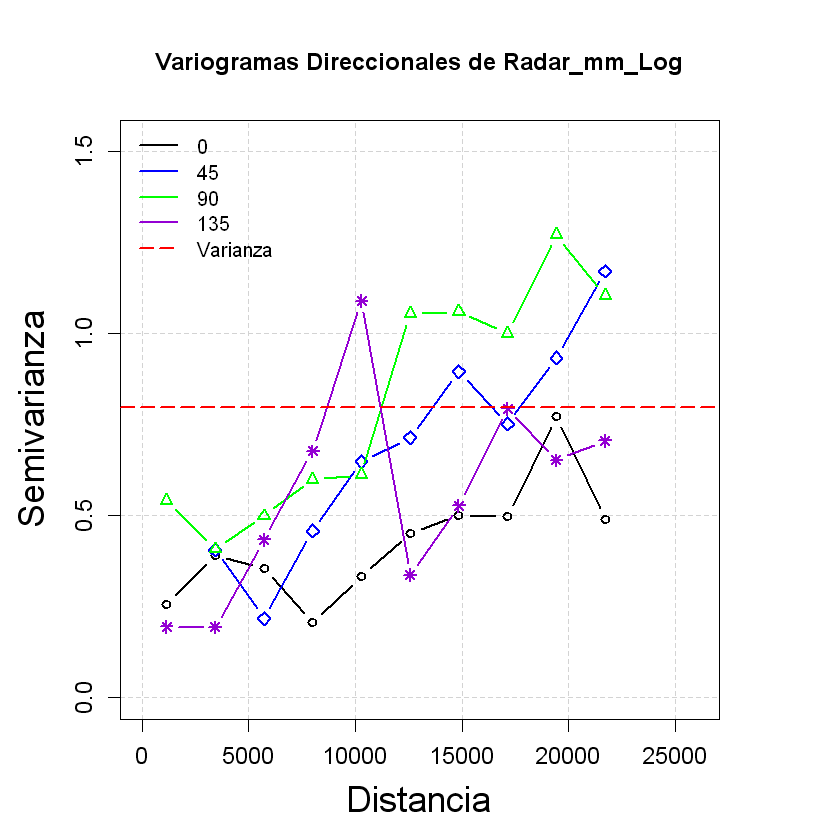

In [102]:
Radar_mm_Log_VarioEstimation4D<-Variograma4D(XCoord, YCoord, 
                                         Radar_mm_Log, 0, 45, 90, 135, 22.5, N_lags, lag_value, 1, 
                                             "Variogramas Direccionales de Radar_mm_Log")

Si colocan en la consola "Radar_mm_Log_VarioEstimation4D", pueden obtener los pares de la estimación en los cuatro variogramas direccionales.

In [103]:
Radar_mm_Log_VarioEstimation4D

1,1142.404,0.2568134
14,3427.212,0.3895325
13,5712.020,0.3544580
25,7996.827,0.2065631
24,10281.635,0.3320694
31,12566.443,0.4505446
24,14851.251,0.4996824
31,17136.059,0.4989373
17,19420.867,0.7712610
23,21705.674,0.4889112
14,3427.212,0.4056996


Si comparamos los resultados obtenidos de los variogramas direccionales con el variograma adireccional, podemos notar que la mejor opción es usar el variograma adireccional ya que es el único que está bien estimado. También podemos considerar que la variable es isotrópica.

Cabe aclarar que en el caso de que los variogramas direccionales estén bien estimados, entonces se debe ajustar un modelo de variograma autorizado y así determinar el tipo de anisotropía (geométrica o zonal) que podemos encontrar.

Ahora que sabemos cuál es el mejor variograma experimental, procedemos a ajustar un modelo de variograma autorizado. Para hacer el ajuste automático usamos la función "AllModel", esta función necesita los siguientes parámetros:

* Vector de las coordenadas (XCoord, YCoord)
* La variable (Pluv_mm_Log)
* La dirección del vector el cual es de 0º
* Su ángulo de tolerancia (90º)
* Número de intervalos (N_lags) 
* Valor de intervalo (lag_value). 

El resultado de usar la función "AllModel" es un gráfico que nos mostrara tres tipos de modelos validos: exponencial, esférico y Gaussiano:

variog: computing omnidirectional variogram
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: min

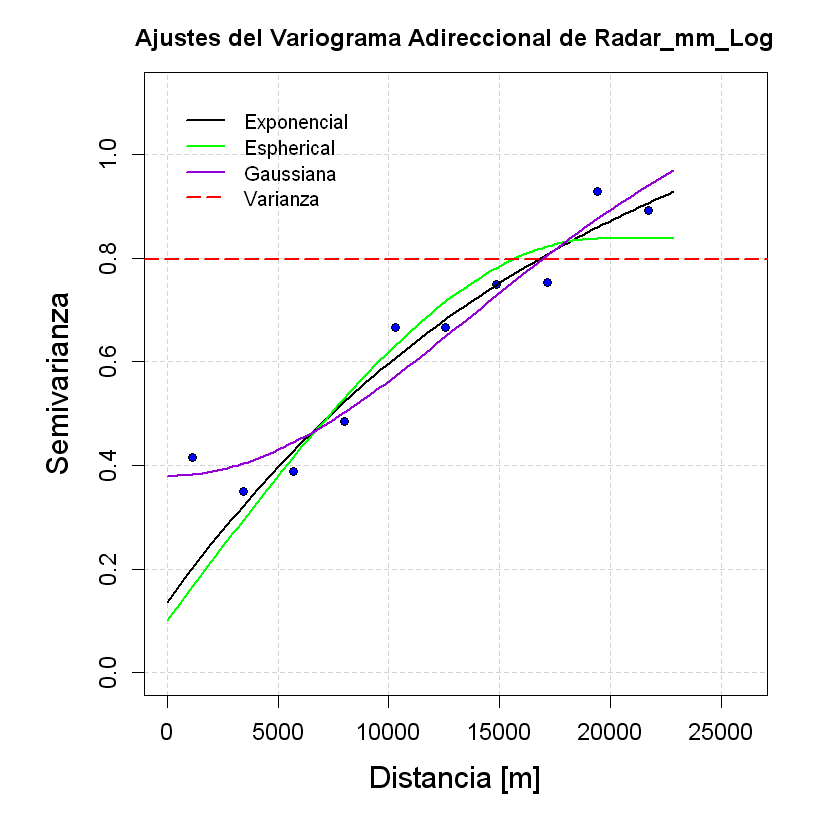

In [104]:
Radar_mm_Log_AllModelVarioFit<-AllModel(XCoord, YCoord, 
                                    Radar_mm_Log, 0, 90, N_lags, lag_value, 1, 
                                        "Ajustes del Variograma Adireccional de Radar_mm_Log")

También obtenemos una tabla con los valores calculados de cada modelo, donde el valor del error (SCE) nos indica cual es el mejor modelo en función del menor error.

In [105]:
Radar_mm_Log_AllModelVarioFit

,Nugget,Meseta+Nugget,Alcance,SCE
exponential,0.1364152,1.2801046,19420,0.06095025
spherical,0.1007615,0.8369067,19420,0.08917023
gaussian,0.3793155,1.1649810,19420,0.04857662


Para graficar el mejor modelo de variograma usamos la función "BestModel", esta función es similar a la función "AllModel", solo nos muestra el mejor modelo y los valores de sus parámetros

variog: computing omnidirectional variogram
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: min

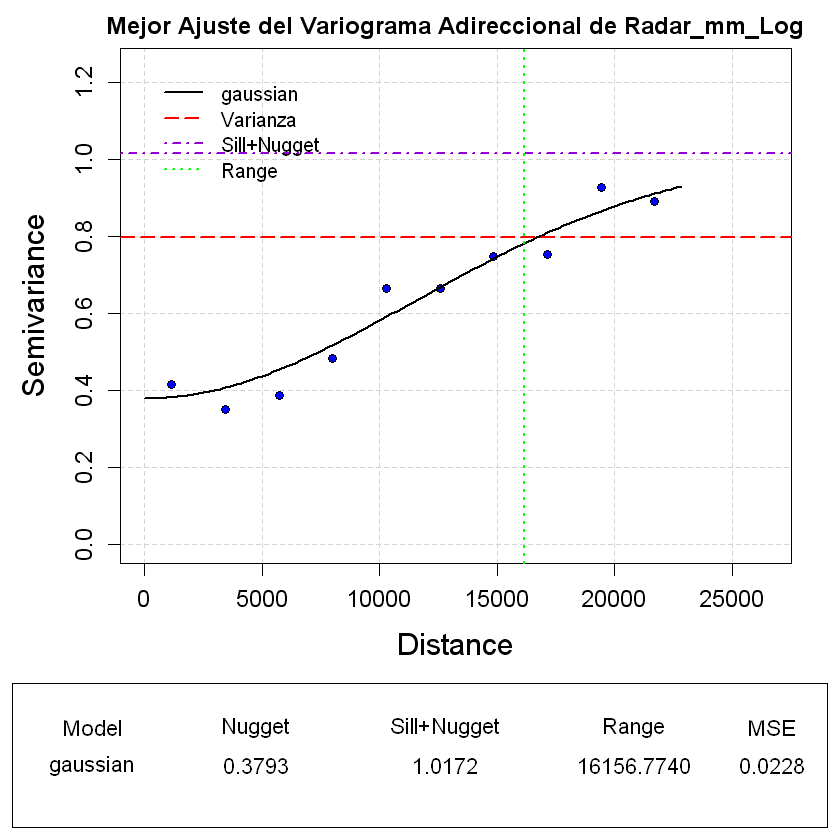

In [106]:
Radar_mm_Log_BestModelVarioFit<-BestModel(XCoord, YCoord, 
                                      Radar_mm_Log, 0, 90, N_lags, lag_value, 1, 
                                          "Mejor Ajuste del Variograma Adireccional de Radar_mm_Log")

In [107]:
Radar_mm_Log_BestModelVarioFit

,Nugget,Meseta+Nugget,Alcance,SCE,MaxY,MinY
gaussian,0.3793155,1.017185,16156.77,0.02275588,0.9285426,0.3506868


Como podemos notar, el mejor modelo según el ajuste automático es Gaussiano, sin embargo, debemos tomar en cuenta que el ajuste dio importancia a los pares del primer intervalo, dando como resultado un ajuste automático poco confiable, por lo tanto, se recomienda usar otro modelo y ajustarlo al variograma experimental.

Para hacer el ajuste manual usamos la función "EyeModel", esta función necesita los siguientes parámetros:
* Vector de las coordenadas (XCoord, YCoord)
* La variable (Pluv_mm_Log)
* La dirección del vector (0º) 
* Su ángulo de tolerancia (90º)
* Número de intervalos (N_lags)
* Valor de intervalo (lag_value). 

Ahora de forma manual necesitamos ingresar la información a los siguientes parámetros: modelo de variograma (vario_model) que usaremos, en este caso tenemos las tres opciones numeradas de la siguiente forma:

* 1- Exponencial
* 2- Esférico
* 3- Gaussiano

Después ingresamos:
* Valor de nugget (nugget)
* Valor de meseta más nugget (sill_and_nugget) 
* Alcance (rank). 

Estos valores se van cambiando bajo el criterio del usuario, el objetivo es lugar un ajuste con el menor error posible, pero con un ajuste adecuado, sin exagerar en el uso del nugget y dando prioridad a los intervalos con mayor número de pares.

In [108]:
#modelos de variograma (1- exponential, 2- spherical, 3- gaussian)
Radar_mm_Log_vario_model<- 2
Radar_mm_Log_nugget<- 0.17
Radar_mm_Log_sill_and_nugget<- 0.8
Radar_mm_Log_rank <- 20000

variog: computing omnidirectional variogram


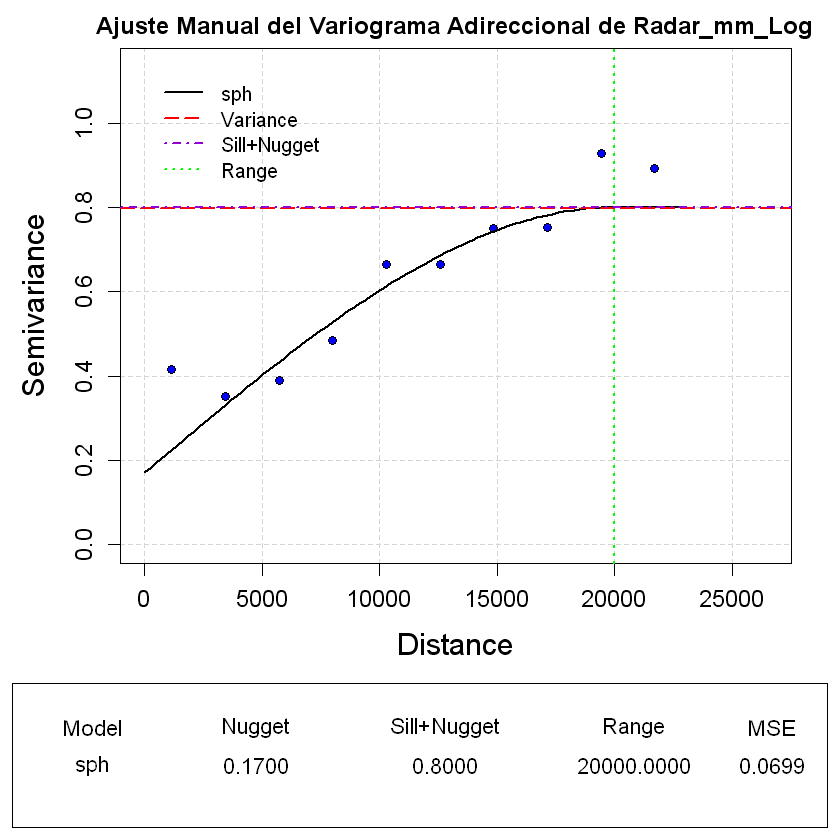

In [109]:
Radar_mm_Log_EyeModelVarioFit<-EyeModel(XCoord, YCoord, 
                                    Radar_mm_Log, 0, 90, N_lags, lag_value, 1, 
                                    Radar_mm_Log_vario_model, Radar_mm_Log_nugget, Radar_mm_Log_sill_and_nugget, Radar_mm_Log_rank,
                                    "Ajuste Manual del Variograma Adireccional de Radar_mm_Log")

Para comprobar si el ajuste propuesto es válido realizamos la validación cruzada. Si los valores estimados $(Z^*)$ son cercanos a los valores observados $(Z)$ entonces la diferencia entre los valores observados y los valores estimados deben cumplir los siguientes criterios:

El valor esperado

$$\frac{1}{n}\sum_{i=1}^n\left\lbrace{Z(\underline{x}_i)-Z^*(\underline{x}_i)}\right\rbrace \qquad \mbox{cercano a }0$$

La varianza.

$$\frac{1}{n}\sum_{i=1}^n\left\lbrace{Z(\underline{x}_i)-Z^*(\underline{x}_i)}\right\rbrace^2 \qquad \mbox{pequeño}$$

Para realizar la validación cruzada usamos la función "CrossValidation", la cual necesita los siguientes parámetros:

* Vectores de posicionamiento (XCoord, YCoord)
* La variable aleatoria (Pluv_mm_Log)
* Modelo de variograma (vario_model)
* Valor de nugget (nugget)
* El valor de meseta más nugget (sill_and_nugget)
* El alcance (rank) 
* Valores de anisotropía geométrica: el valor de máxima anisotropía (MaxAnis) el cual corresponde al valor del ángulo del vector del semivariograma y la relación de anisotropía (proporción), esta proporción debe estar en el intervalo [0,1] y se calcula como la razón del eje menor dado el eje mayor.

$$\lambda=\frac{B}{A}$$

El variograma con el eje mayor (mayor alcance) el cual nombramos como A y el variograma con el eje menor (menor alcance) el cual nombramos B. Dado que este ejemplo isotrópico, el valor de máxima anisotropía es cero y la relación de anisotropía es uno.


In [110]:
Radar_mm_Log_CrossValid<- CrossValidation(XCoord, YCoord, 
                                      Radar_mm_Log, Radar_mm_Log_vario_model, Radar_mm_Log_nugget, 
                                          Radar_mm_Log_sill_and_nugget, Radar_mm_Log_rank, MaxAnis=0, proporcion=1)
Radar_mm_Log_CrossValid

,X,Y,Z,Z*,Z-Z*
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,485303,2162682,0.254642218,0.352984840,-0.09834262
2,484253,2157150,0.908258560,0.730428148,0.17783041
3,487403,2154937,1.026041596,0.696232351,0.32980924
4,490552,2153830,0.058268908,0.475526532,-0.41725762
5,489502,2151601,1.057790294,0.291970492,0.76581980
6,480054,2157142,0.482426149,0.679475914,-0.19704976
7,481104,2154828,0.879626748,0.714304052,0.16532270
8,483203,2152713,0.765467842,0.919633893,-0.15416605
9,475855,2149399,0.636576829,0.549815930,0.08676090


Lo que obtenemos con la validación cruzada es una tabla. Las filas 1 y 2 tienen la información de las coordenadas, la fila 3 tiene los valores de la variable $\textbf(Z)$, la fila 4 muestra los valores estimados con el método de validación cruzada conocido como leave one out, estimando el valor con el método de kriging usando el variograma propuesto $\textbf(Z^*)$, la fila 5 es la diferencia entre la variable y los valores estimados $\textbf(Z-Z^*)$

ya que tenemos la validación cruzada calculamos los estadígrafos.

In [111]:
Radar_mm_Log_CrossValid_Stat <- Val_Estadisticos(Radar_mm_Log_CrossValid[1:102,c(3,4,5)])
Radar_mm_Log_CrossValid_Stat

,Z,Z*,Z-Z*
,<dbl>,<dbl>,<dbl>
No_muestras,50.00000,50.00000,50.00000
Minimo,-1.71480,-1.18771,-2.76949
Cuartil_1er,-0.13209,-0.10442,-0.46694
Mediana,0.35387,0.47161,-0.06826
Media,0.26569,0.34313,-0.07743
Cuartil_3er,0.86467,0.80093,0.23502
Maximo,2.05284,1.16364,1.60659
Rango,3.76764,2.35135,4.37608
Rango_Intercuartil,0.99676,0.90535,0.70196


Al ver los estadígrafos notamos que la diferencia del valor esperado $Z-Z^*$ es cercana a cero mientras que la varianza $Z-Z^*$ no es tan pequeña.

Ahora graficamos el histograma con los errores.

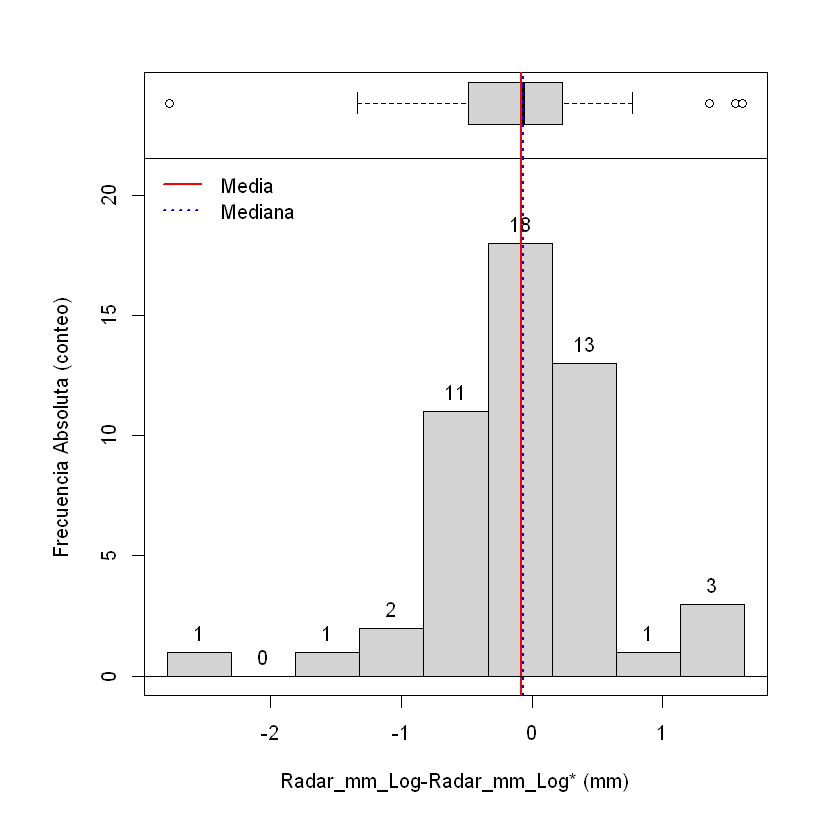

In [112]:
HistBoxplot(x=Radar_mm_Log_CrossValid[,5], mean = Radar_mm_Log_CrossValid_Stat[5,3], median = Radar_mm_Log_CrossValid_Stat[4,3], main ="", 
            xlab = "Radar_mm_Log-Radar_mm_Log* (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE )

Si analizamos el histograma obtenido con la diferencia entre los valores estimados $(Z^*)$ y los valores observados $(Z)$ podemos cuatro valores atípicos, tres a la derecha del boxplot y uno a la izquierda. Para saber cuál es la ubicación de esos valores atípicos graficamos su distribución espacial con la función "DEspacial".

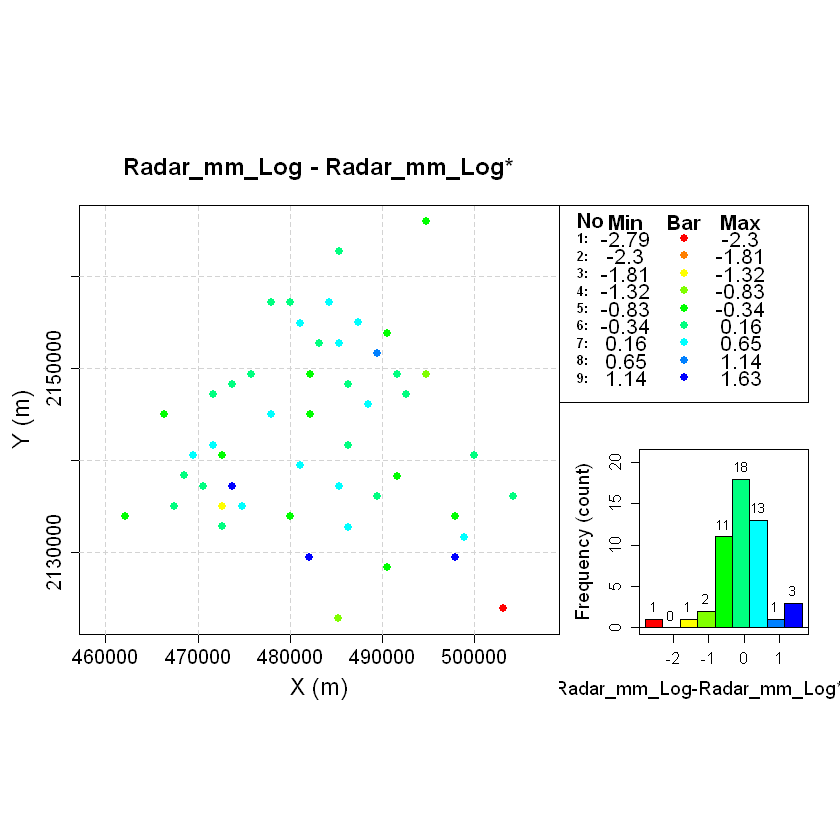

In [113]:
DEspacial(Radar_mm_Log_CrossValid[,1], Radar_mm_Log_CrossValid[,2], Radar_mm_Log_CrossValid[,5],n_bins=9,
          'X (m)', 'Y (m)', 'Radar_mm_Log-Radar_mm_Log* (mm)', 'Radar_mm_Log - Radar_mm_Log*')

De este grafico podemos notar que el valor atípico negativo marcado en color rojo está en la frontera, por lo que es difícil saber si es un valor atípico. Mientras que los valores atípicos marcados en azul fuerte probablemente si sean valores atípicos espaciales, en especial el ubicado a la izquierda, ya que los valores vecinos tienen valores más pequeños en comparación.

Los siguiente es saber si el modelo propuesto refleja adecuadamente la relación espacial de los datos, esto lo podemos saber usando un gráfico de dispersión. Si los datos estimados $\textbf{$Z^*$}$ son cercanos a los valores reales $\textbf{Z}$ entonces podríamos esperar que la dependencia sea alta.

In [114]:
# Radar_mm_Log is the independent variable
X<-Radar_mm_Log_CrossValid[,3]
# Radar_mm_Log* is the dependent variable
Y<-Radar_mm_Log_CrossValid[,4]

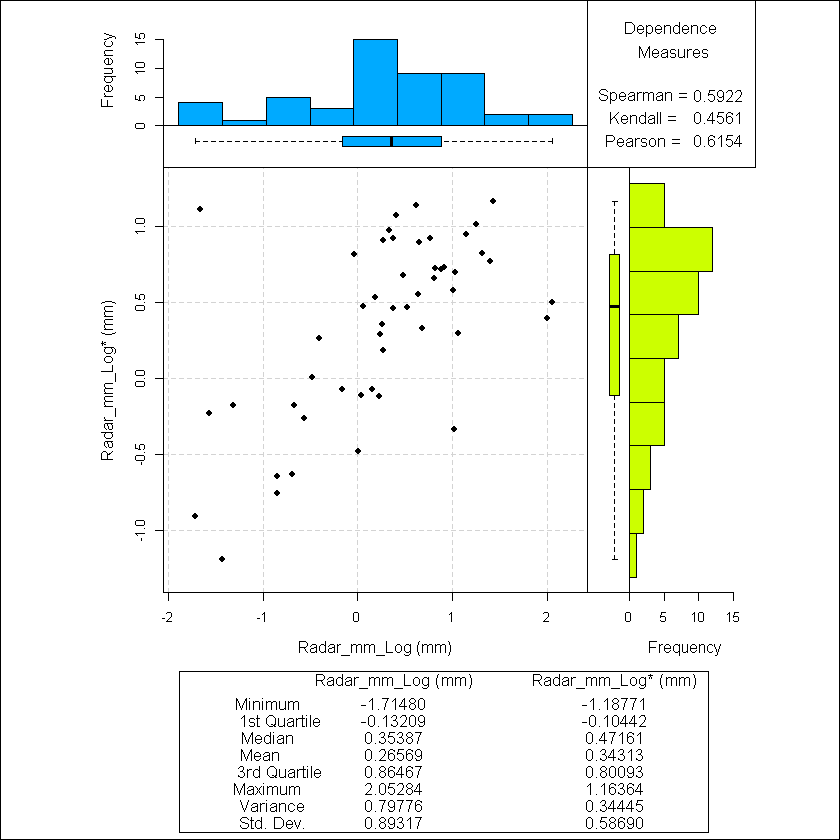

In [115]:
ScatterPlot(Radar_mm_Log_CrossValid[,3] , Radar_mm_Log_CrossValid[,4], 9, 
            Xmin = Radar_mm_Log_CrossValid_Stat[2,1], Xmax = Radar_mm_Log_CrossValid_Stat[7,1], 
            Ymin = Radar_mm_Log_CrossValid_Stat[2,2],Ymax = Radar_mm_Log_CrossValid_Stat[7,2], 
            XLAB = "Radar_mm_Log (mm)", YLAB = "Radar_mm_Log* (mm)")

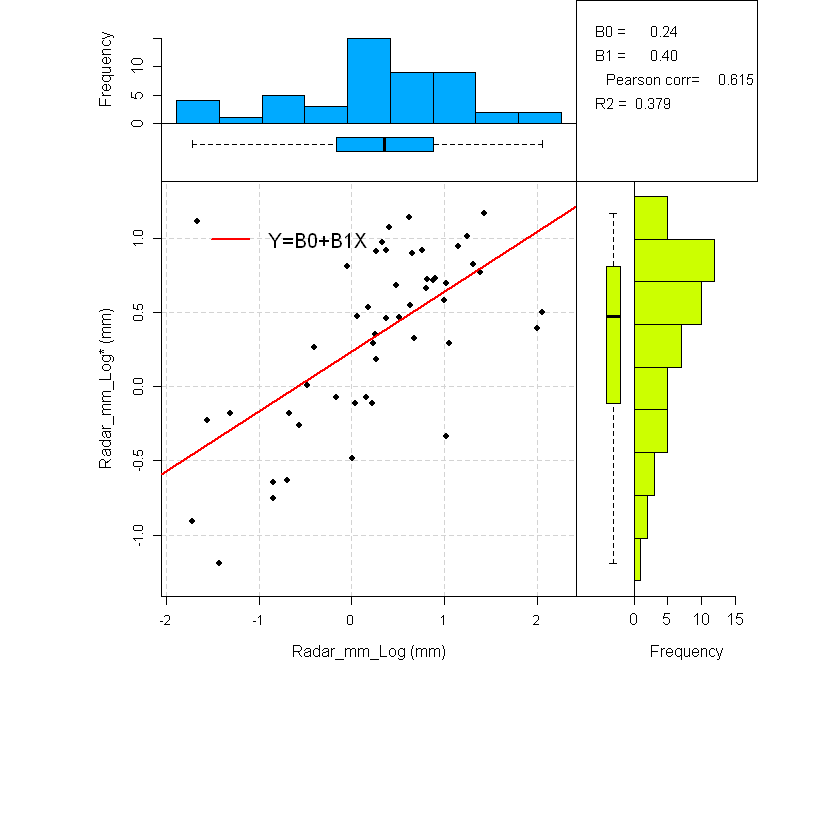

In [116]:
scaterplotReg(Radar_mm_Log_CrossValid[,3] , Radar_mm_Log_CrossValid[,4], 9, 
            Xmin = Radar_mm_Log_CrossValid_Stat[2,1], Xmax = Radar_mm_Log_CrossValid_Stat[7,1], 
            Ymin = Radar_mm_Log_CrossValid_Stat[2,2],Ymax = Radar_mm_Log_CrossValid_Stat[7,2], 
            XLAB = "Radar_mm_Log (mm)", YLAB = "Radar_mm_Log* (mm)")

Observando los resultados del grafico de dispersión notamos que la dependencia no es lo suficientemente alta para ofrecer una buena representación de la variable aleatoria a partir del variograma propuesto.

## Análisis variografico variable Pluv_mm_Log

Ahora toca hacer el análisis variográfico de la variable Pluv_mm_Log. Primero obtenemos su distribución espacial.

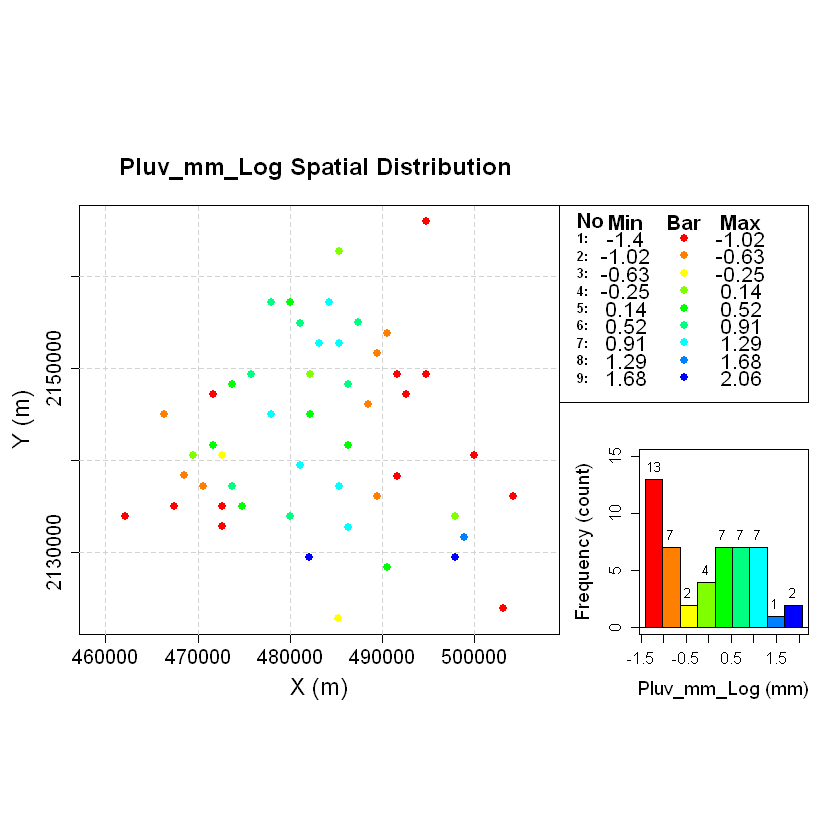

In [117]:
DEspacial(XCoord, YCoord, Pluv_mm_Log,n_bins=9,
          'X (m)', 'Y (m)', 'Pluv_mm_Log (mm)', 'Pluv_mm_Log Spatial Distribution ')

### Análisis de tendencia.

Al igual que la variable anterior, se hace el análisis de estacionaridad usando la función "Gdirecciones".

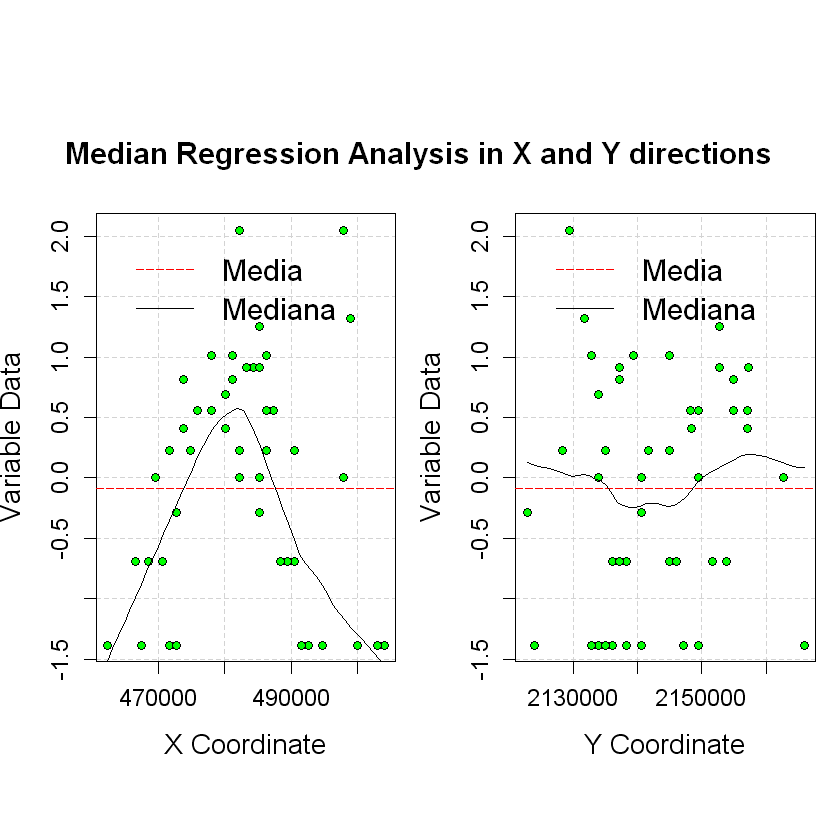

In [118]:
GDirecciones(XCoord, YCoord, Pluv_mm_Log)

Respecto al análisis de tendencia usando la regresión de la mediana, se puede notar el mismo efecto de tendencia en la coordenada X, por lo que veremos si este efecto se manifiesta en el variograma.

Estimamos el valor del intervalo y su número.

In [119]:
N_lags<-10
DistMin<-min(dist(Data_File[,1:2])) # Minimum distance in data
DistMax<-max(dist(Data_File[,1:2])) # Maximum distance in data
lag_value<- (DistMax/2)/N_lags # DistMin

Y calculamos el variograma.

variog: computing omnidirectional variogram


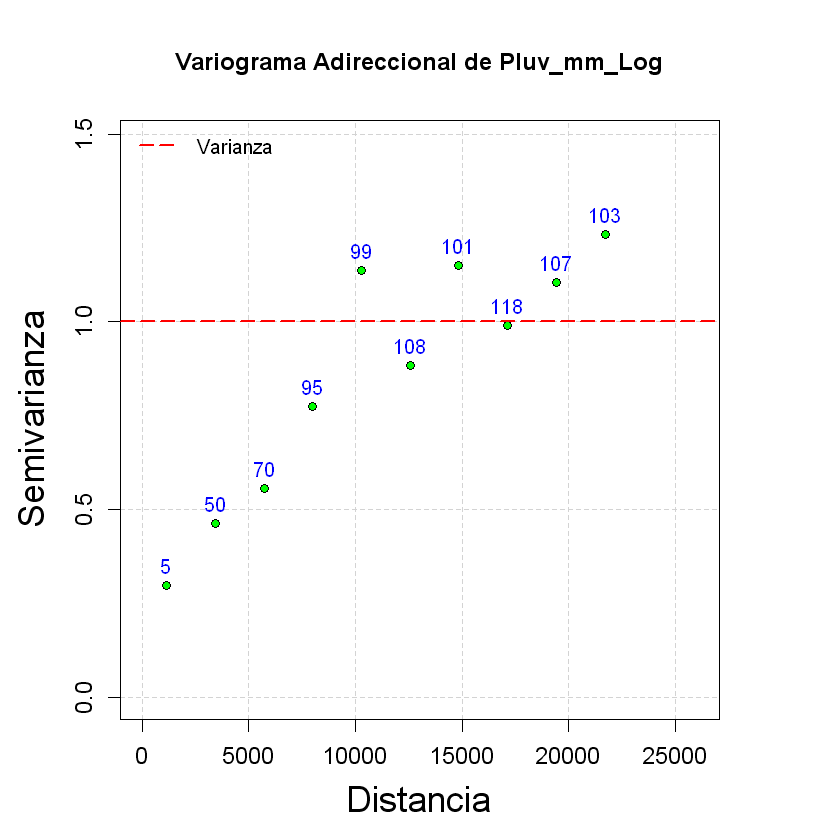

In [120]:
Pluv_mm_Log_VarioEstimation<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 0, 90, 1*N_lags, lag_value, 1, 
                                        "Variograma Adireccional de Pluv_mm_Log")

El variograma que se obtuvo muestra una buena estimación excepto en el primer intervalo, además podemos notar que el modelo se acota, por lo tanto, no hay tendencia.

In [121]:
Pluv_mm_Log_VarioEstimation

Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
5,1142.404,0.2988209
50,3427.212,0.4633333
70,5712.020,0.5569420
95,7996.827,0.7741376
99,10281.635,1.1369521
108,12566.443,0.8833747
101,14851.251,1.1492244
118,17136.059,0.9906020
107,19420.867,1.1042933


Aquí recordamos que, en caso de que el variograma muestre tendencia, podemos usar la transformación polinomial. Al igual que la variable anterior, esto se hace usando la función "Trend"

In [122]:
pol_degree=1
Pluv_mm_Log_Detrended_1<-Trend(XCoord, YCoord, 
                                Pluv_mm_Log, pol_degree) 

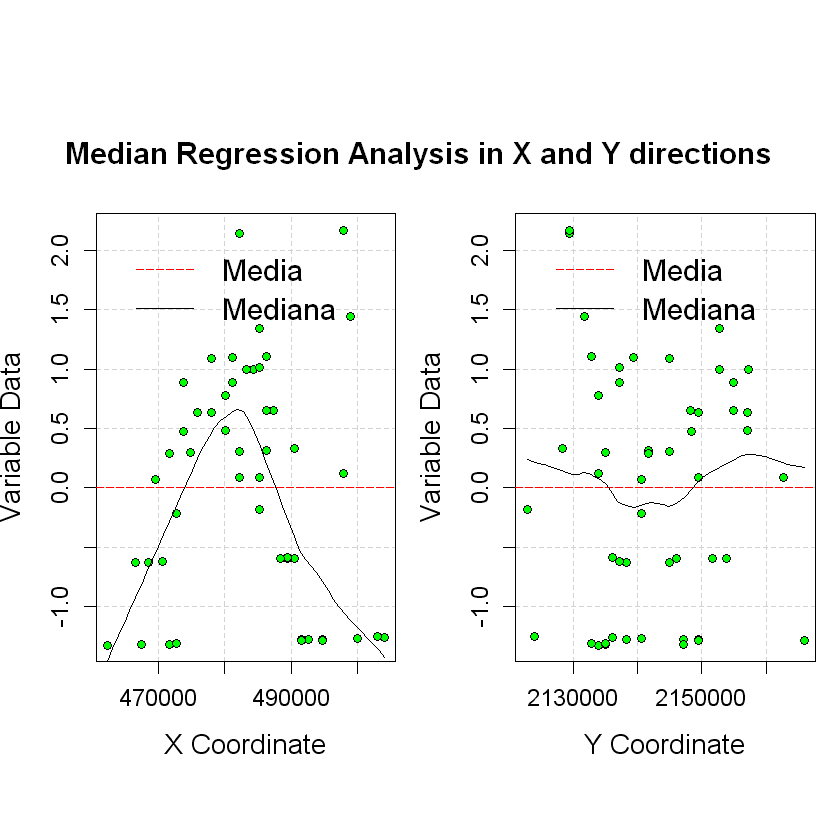

In [123]:
GDirecciones(Pluv_mm_Log_Detrended_1[,1], Pluv_mm_Log_Detrended_1[,2], Pluv_mm_Log_Detrended_1[,3])

Al igual que la variable anterior, notamos la presencia de tendencia en la dirección X, veremos que sucede con el variograma estimado con la transformación de primer orden.

variog: computing omnidirectional variogram


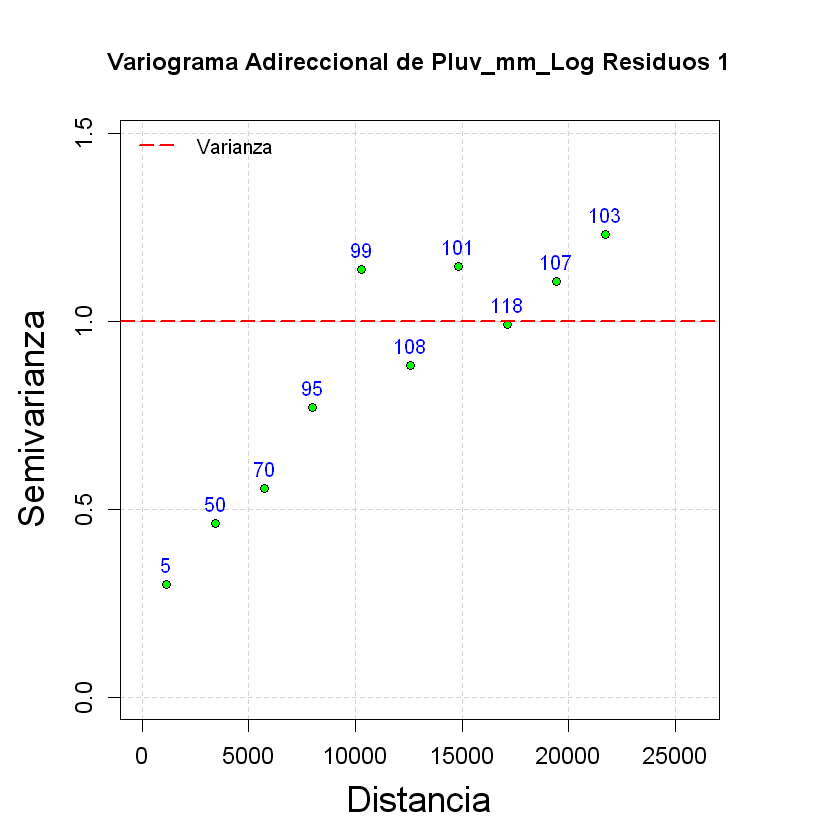

In [124]:
Pluv_mm_Log_Detrended_1_VarioEstimation<-Variograma(Pluv_mm_Log_Detrended_1[,1], Pluv_mm_Log_Detrended_1[,2], 
                                                     Pluv_mm_Log_Detrended_1[,3], 0, 90, N_lags, lag_value, 1, 
                                                     "Variograma Adireccional de Pluv_mm_Log Residuos 1")

Para usar la transformación de segundo orden.

In [125]:
pol_degree=2
Pluv_mm_Log_Detrended_2<-Trend(XCoord, YCoord, 
                                Pluv_mm_Log, pol_degree) 

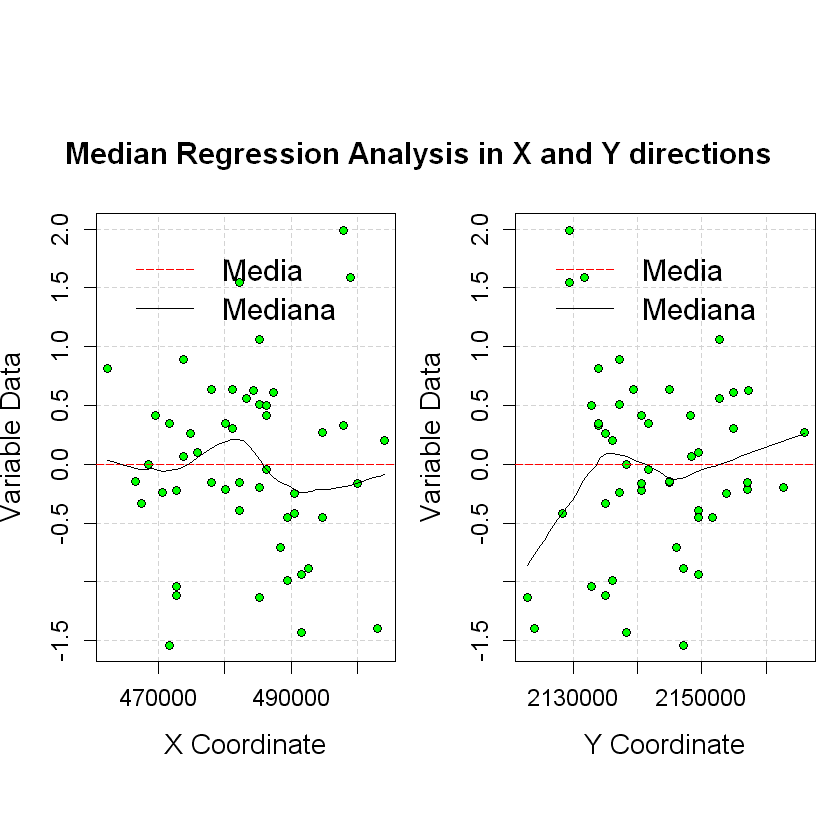

In [126]:
GDirecciones(Pluv_mm_Log_Detrended_2[,1], Pluv_mm_Log_Detrended_2[,2], Pluv_mm_Log_Detrended_2[,3])

Usando la transformada de segundo orden podemos notar que la coordenada X tuvo una mejora, sin embargo la coordenada Y empeoró su regresión.

variog: computing omnidirectional variogram


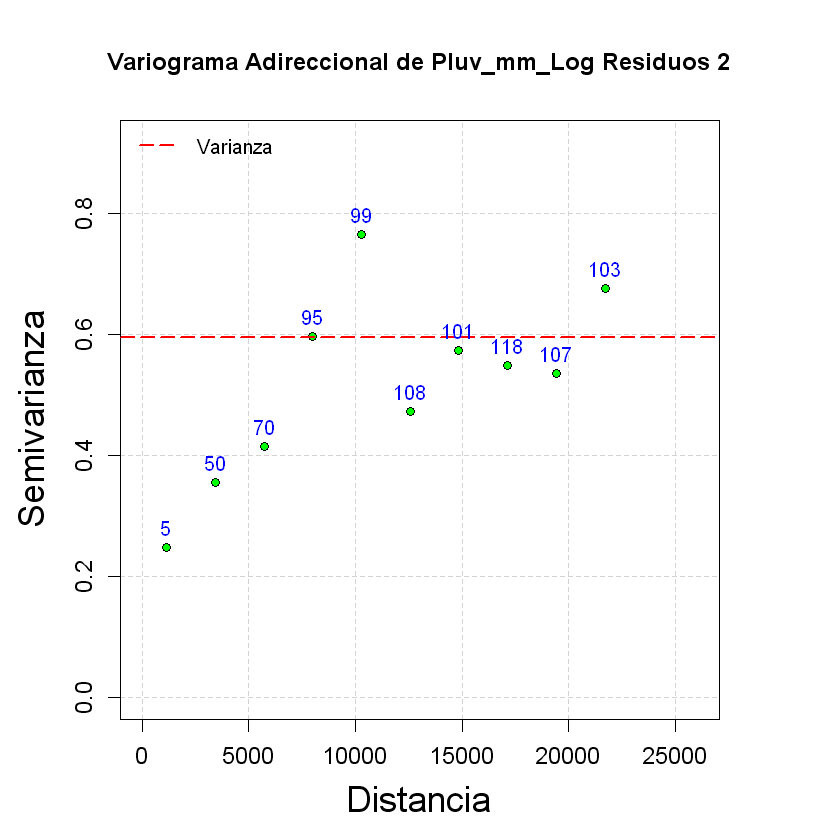

In [127]:
Pluv_mm_Log_Detrended_2_VarioEstimation<-Variograma(Pluv_mm_Log_Detrended_2[,1], Pluv_mm_Log_Detrended_2[,2], 
                                                     Pluv_mm_Log_Detrended_2[,3], 0, 90, N_lags, lag_value, 1, 
                                                     "Variograma Adireccional de Pluv_mm_Log Residuos 2")

El variograma que se obtuvo con la transformación de segundo orden empeoro. Este ejemplo sirve para notar el efecto de la transformación, si se usa de forma incorrecta podríamos tener una peor estimación del variograma experimental.

Dados los resultados se decidió usar el variograma adireccional para hacer el ajuste de modelo.

variog: computing omnidirectional variogram


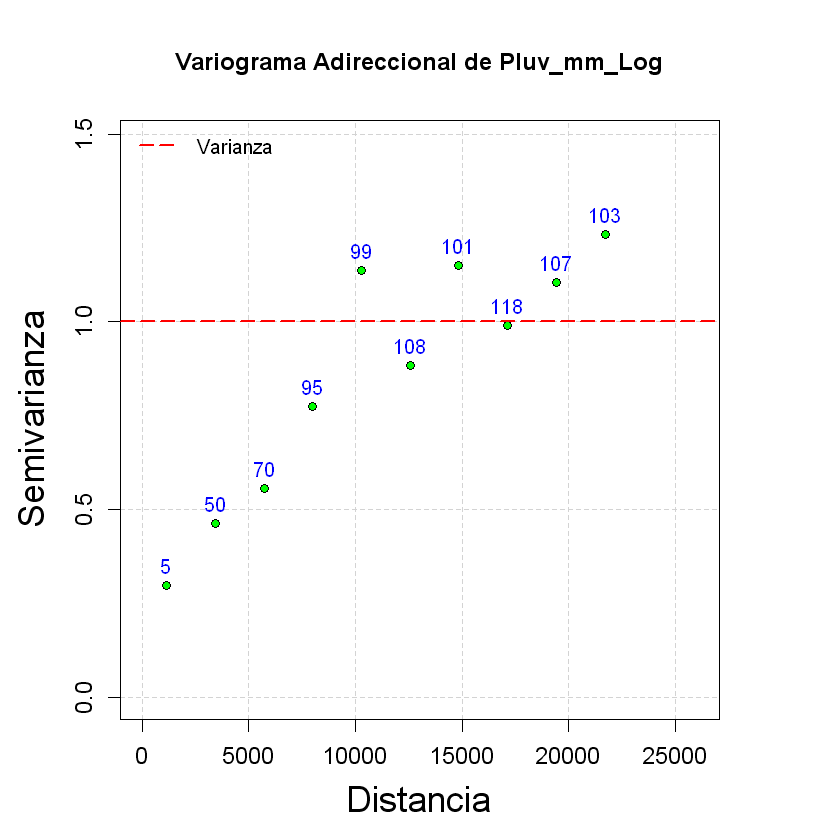

In [128]:
Pluv_mm_Log_VarioEstimation<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 0, 90, N_lags, lag_value, 1, 
                                        "Variograma Adireccional de Pluv_mm_Log")

In [129]:
Pluv_mm_Log_VarioEstimation

Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
5,1142.404,0.2988209
50,3427.212,0.4633333
70,5712.020,0.5569420
95,7996.827,0.7741376
99,10281.635,1.1369521
108,12566.443,0.8833747
101,14851.251,1.1492244
118,17136.059,0.9906020
107,19420.867,1.1042933


Ahora que sabemos cuál es el mejor variograma procedemos a calcular los variogramas direccionales y determinar si existe algún tipo de anisotropía. Comenzamos con la dirección 0º.

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
1,1142.404,0.0000000
14,3427.212,0.5171901
13,5712.020,0.4657970
25,7996.827,0.5229390
24,10281.635,0.7015614
31,12566.443,0.3949000
24,14851.251,0.4575810
31,17136.059,0.8799773
17,19420.867,1.2713896


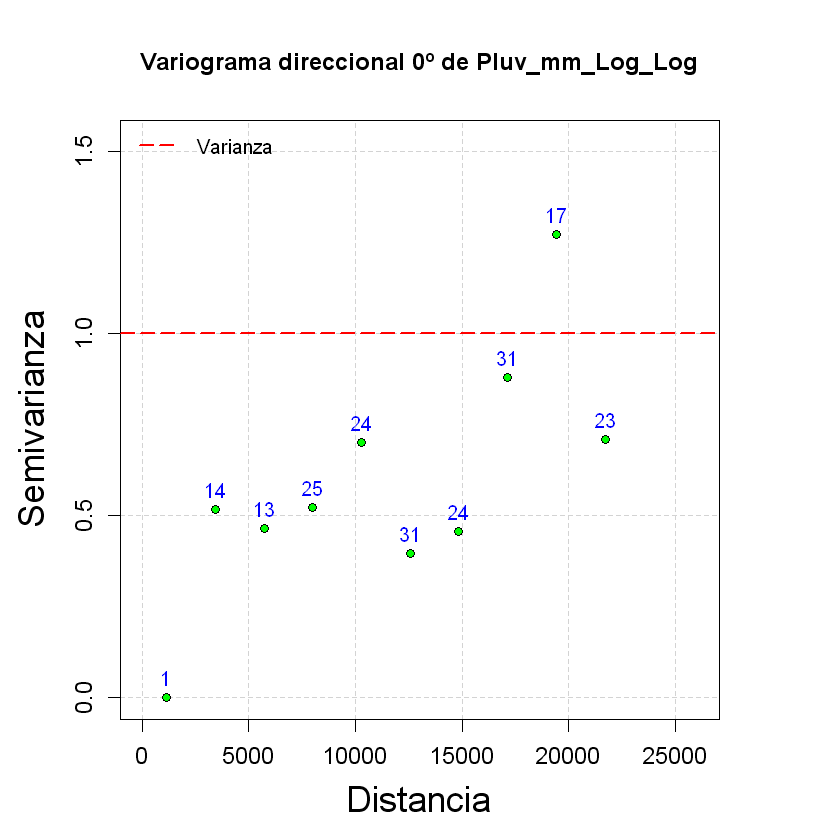

In [130]:
Pluv_mm_Log_VarioEstimation_0<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 0, 22.5, N_lags, lag_value, 1, "Variograma direccional 0º de Pluv_mm_Log_Log")
Pluv_mm_Log_VarioEstimation_0

En esta dirección se puede observar que este variograma no está bien estimado, solo dos intervalos superan los 30 pares.

Seguimos con la dirección de 45º.

variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
14,3427.212,0.4759408
15,5712.020,0.5214920
22,7996.827,0.6379057
29,10281.635,0.9838092
24,12566.443,1.3717237
28,14851.251,1.2991847
35,17136.059,0.9760720
32,19420.867,0.9106024
40,21705.674,1.5357749


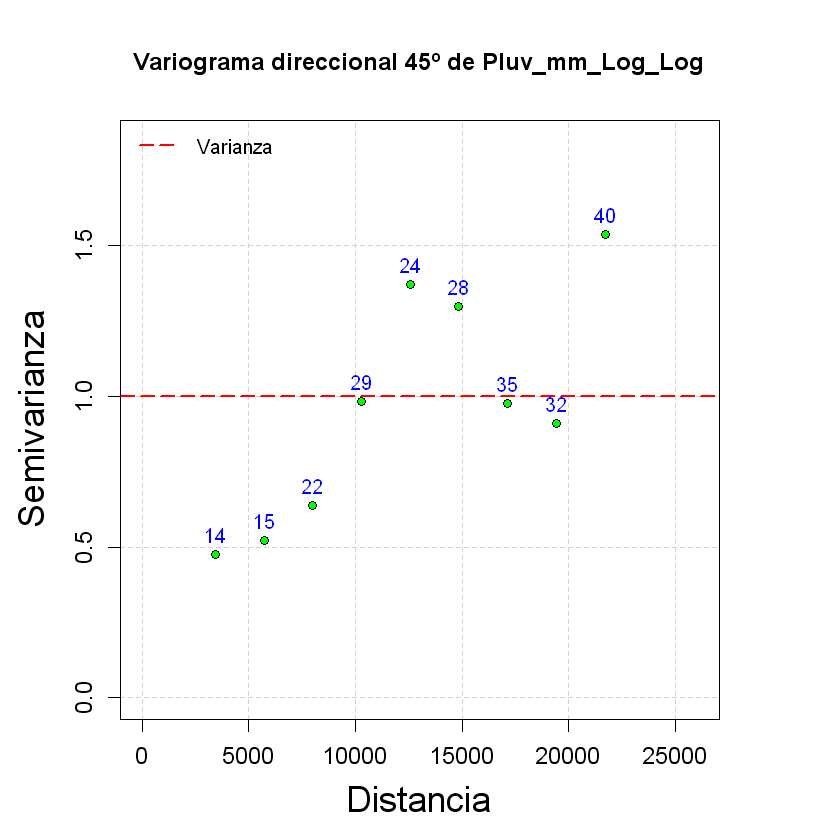

In [131]:
Pluv_mm_Log_VarioEstimation_45<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 45, 22.5, N_lags, lag_value, 1, "Variograma direccional 45º de Pluv_mm_Log_Log")
Pluv_mm_Log_VarioEstimation_45

El variograma con dirección 45º tampoco está bien estimado, solo tres intervalos superan los 30 pares.

Calculamos el variograma con dirección 90º.

variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
3,1142.404,0.4545444
10,3427.212,0.5983756
17,5712.020,1.0493852
22,7996.827,0.9129011
23,10281.635,1.1322249
32,12566.443,1.0291239
24,14851.251,1.6033039
28,17136.059,1.0096557
30,19420.867,1.2462150


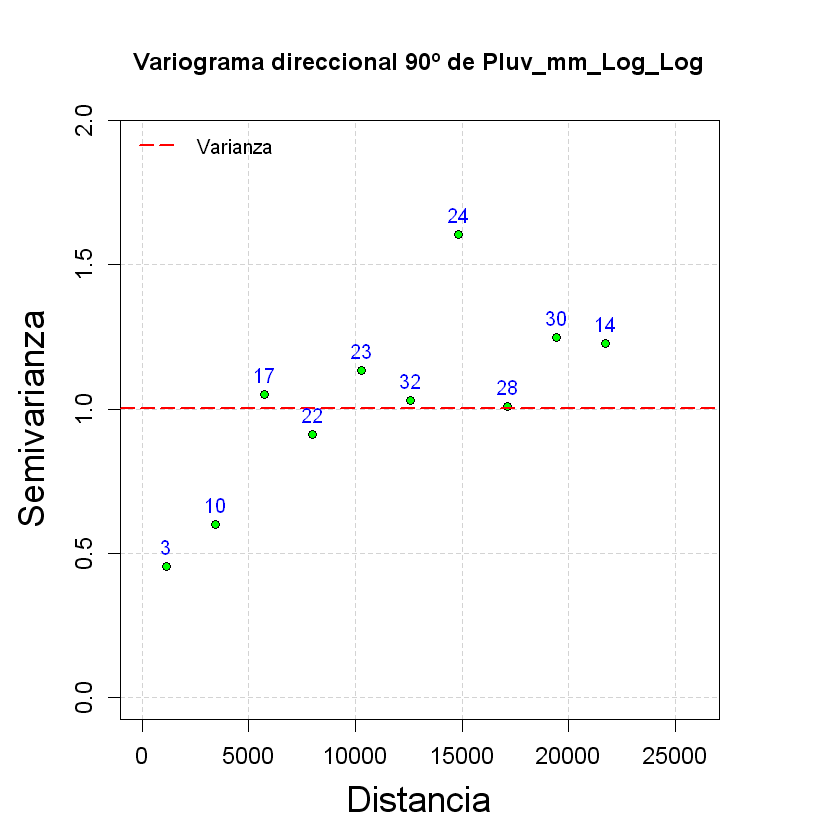

In [132]:
Pluv_mm_Log_VarioEstimation_90<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 90, 22.5, N_lags, lag_value, 1, "Variograma direccional 90º de Pluv_mm_Log_Log")
Pluv_mm_Log_VarioEstimation_90

En este caso podemos notar que el variograma no está bien estimado, solo dos intervalos tienen más de 30 pares.

Calculamos la dirección 135º.

variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares,Lags,Semivarianzas
<dbl>,<dbl>,<dbl>
1,1142.404,0.1304714
12,3427.212,0.2732561
25,5712.020,0.2907460
26,7996.827,1.0135327
23,10281.635,1.7890932
21,12566.443,0.8242492
25,14851.251,1.2093302
24,17136.059,1.1324523
28,19420.867,1.0721439


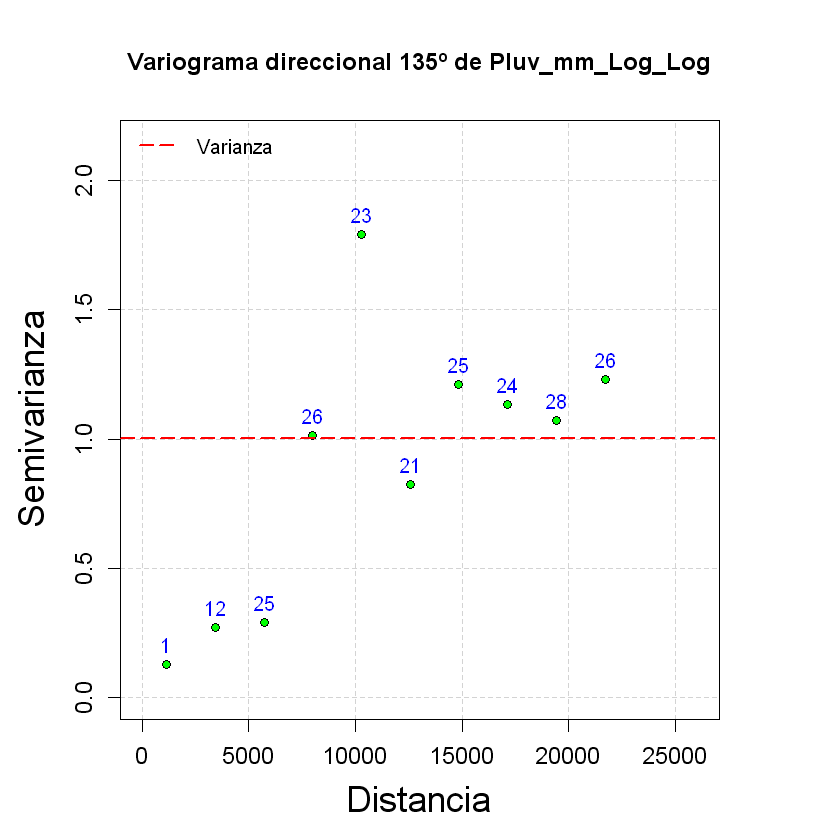

In [133]:
Pluv_mm_Log_VarioEstimation_135<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 135, 22.5, N_lags, lag_value, 1, "Variograma direccional 135º de Pluv_mm_Log_Log")
Pluv_mm_Log_VarioEstimation_135

Con este caso podemos notar que es el peor variograma experimental, no hay intervalo que tenga más de 30 pares.

Debido a los malos resultados se recomienda usar el variograma adireccional y considerar que el los variogramas direccionales no permiten establecer si existe algún tipo de anisotropía, por lo tanto, consideraremos que el variograma es isotrópico.

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


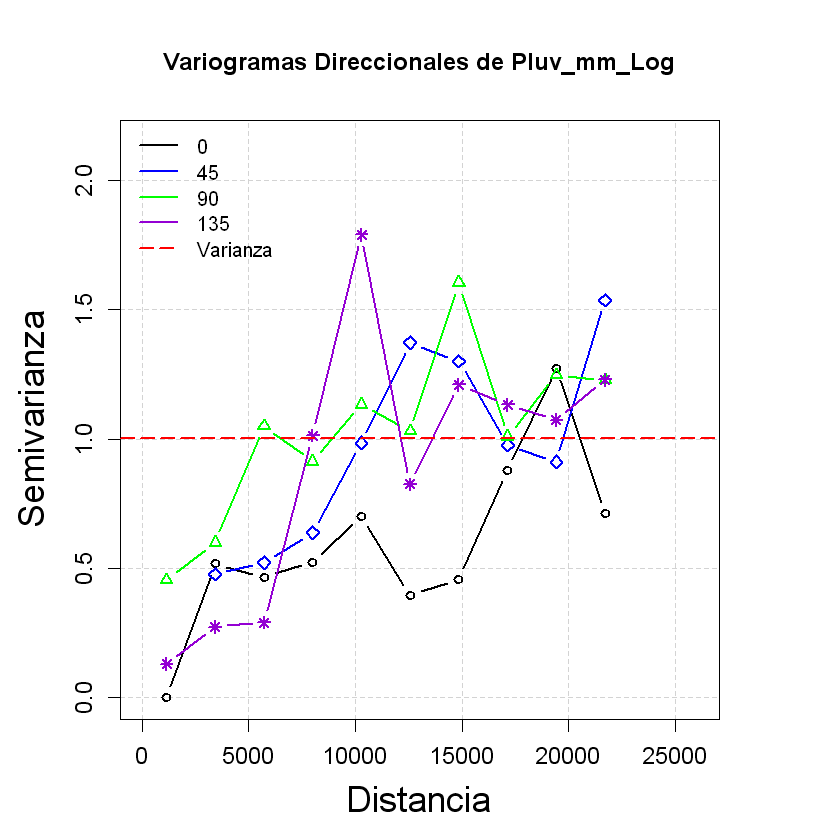

In [134]:
Pluv_mm_Log_VarioEstimation4D<-Variograma4D(XCoord, YCoord, 
                                         Pluv_mm_Log, 0, 45, 90, 135, 22.5, N_lags, lag_value, 1, 
                                            "Variogramas Direccionales de Pluv_mm_Log")

In [135]:
Pluv_mm_Log_VarioEstimation4D

1,1142.404,0.0000000
14,3427.212,0.5171901
13,5712.020,0.4657970
25,7996.827,0.5229390
24,10281.635,0.7015614
31,12566.443,0.3949000
24,14851.251,0.4575810
31,17136.059,0.8799773
17,19420.867,1.2713896
23,21705.674,0.7104754
14,3427.212,0.4759408


Ahora estimamos los modelos de variograma autorizados:

variog: computing omnidirectional variogram
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: min

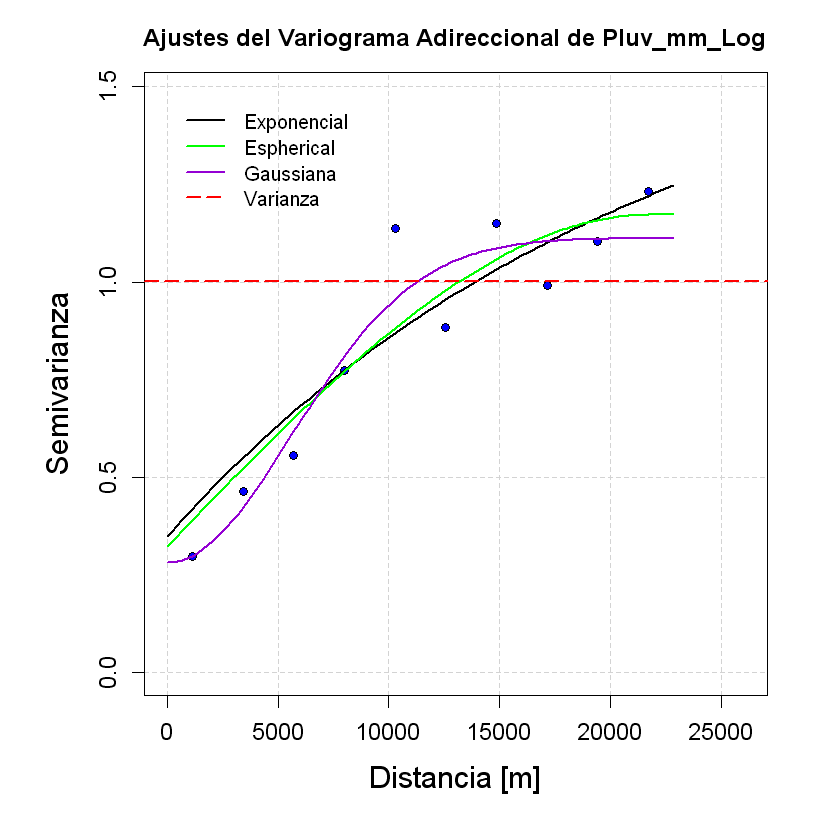

In [136]:
Pluv_mm_Log_AllModelVarioFit<-AllModel(XCoord, YCoord, 
                                    Pluv_mm_Log, 0, 90, N_lags, lag_value, 1,
                                       "Ajustes del Variograma Adireccional de Pluv_mm_Log")

In [137]:
Pluv_mm_Log_AllModelVarioFit

,Nugget,Meseta+Nugget,Alcance,SCE
exponential,0.3484807,1.727137,21705.000,0.14093110
spherical,0.3232237,1.171616,21705.000,0.12636551
gaussian,0.2820669,1.111793,7955.107,0.09853297


Dados los resultados del ajuste automático podemos ver que sus errores no tienen diferencias significativas. Pero podemos considerar que el mejor modelo estimado es el gaussiano.

variog: computing omnidirectional variogram
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: min

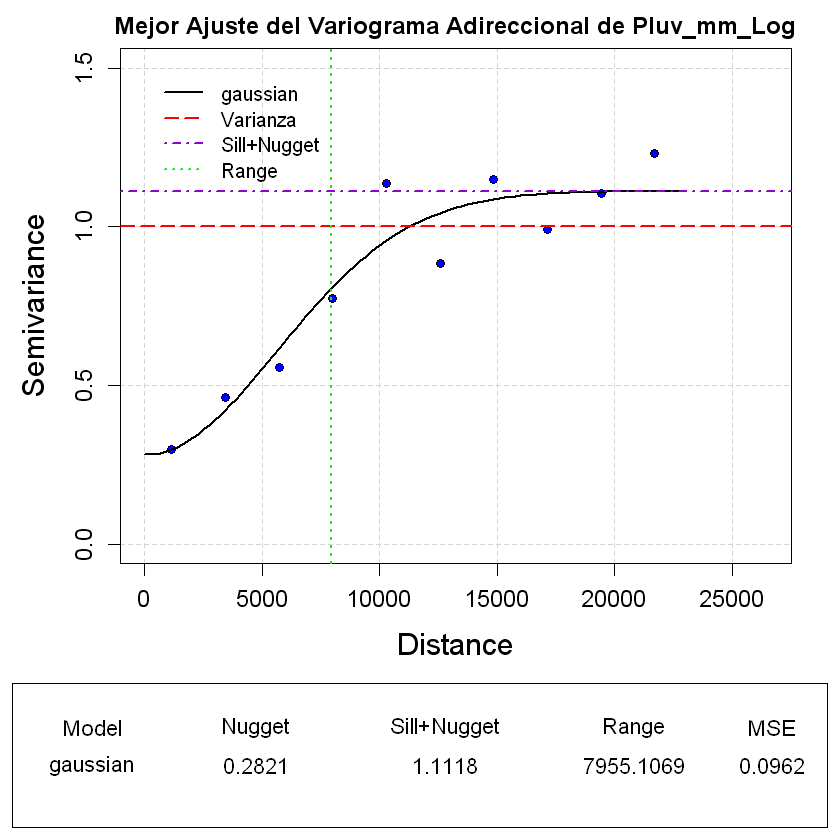

In [138]:
Pluv_mm_Log_BestModelVarioFit<-BestModel(XCoord, YCoord, 
                                      Pluv_mm_Log, 0, 90, N_lags, lag_value, 1,
                                         "Mejor Ajuste del Variograma Adireccional de Pluv_mm_Log")

In [139]:
Pluv_mm_Log_BestModelVarioFit

,Nugget,Meseta+Nugget,Alcance,SCE,MaxY,MinY
gaussian,0.2820669,1.111793,7955.107,0.09623212,1.231852,0.2988209


Si analizamos el modelo Gaussiano propuesto en este ajuste automático, podemos notar que el modelo es forzado a ajustarse, indicando un valor de nugget que no corresponde al sugerido por el variograma experimental, por lo tanto, se recomienda usar otro modelo.

Ajustamos el variograma a un modelo esférico de forma manual y obtenemos lo siguiente:

In [140]:
#modelos de variograma (1- exponential, 2- spherical, 3- gaussian)
vario_model<- 2 # 2
nugget<- 0.08 # 0.08
sill_and_nugget<- 1.1 # 1.1
rank <- 15000 # 15000

variog: computing omnidirectional variogram


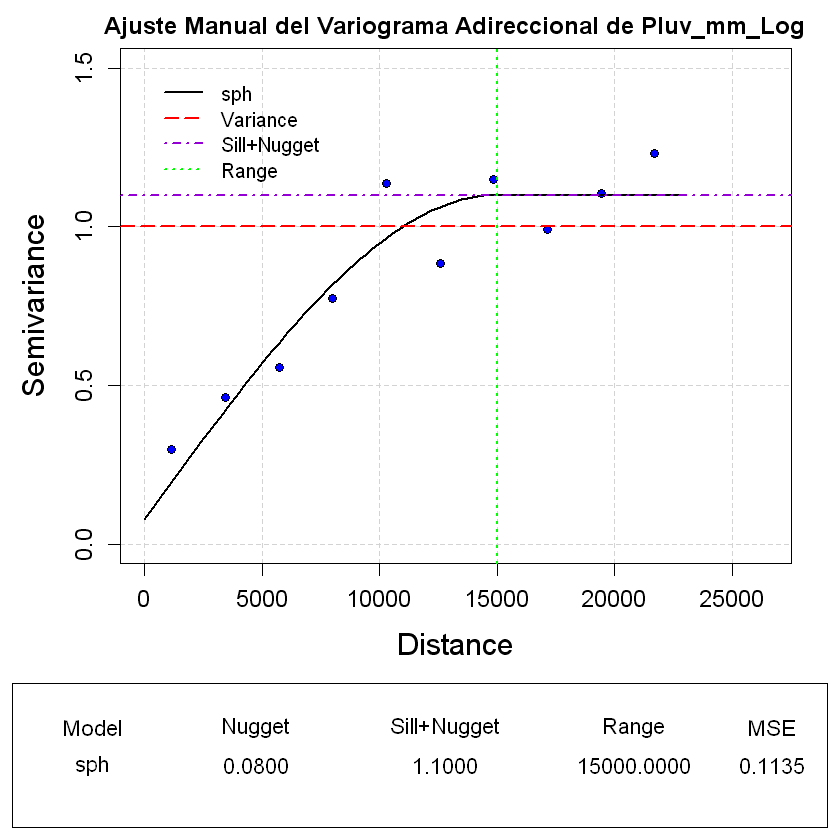

In [141]:
Pluv_mm_Log_EyeModelVarioFit<-EyeModel(XCoord, YCoord, 
                                    Pluv_mm_Log, 0, 90, N_lags, lag_value, 1, 
                                    vario_model, nugget, sill_and_nugget, rank,
                                       "Ajuste Manual del Variograma Adireccional de Pluv_mm_Log")

Ya que tenemos el mejor ajuste calculamos la validación cruzada.

In [142]:
Pluv_mm_Log_CrossValid<- CrossValidation(XCoord, YCoord, 
                                      Pluv_mm_Log, vario_model, nugget, sill_and_nugget, rank, 
                                         MaxAnis=0, proporcion=1)
Pluv_mm_Log_CrossValid

,X,Y,Z,Z*,Z-Z*
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,485303,2162682,0.0000000,-0.06425495,0.064254949
2,484253,2157150,0.9162907,0.66992096,0.246369776
3,487403,2154937,0.5596158,0.37333787,0.186277916
4,490552,2153830,-0.6931472,-0.45605034,-0.237096845
5,489502,2151601,-0.6931472,-0.40868722,-0.284459962
6,480054,2157142,0.4054651,0.69411959,-0.288654483
7,481104,2154828,0.8109302,0.78943165,0.021498564
8,483203,2152713,0.9162907,0.91233182,0.003958910
9,475855,2149399,0.5596158,0.36395926,0.195656524


In [143]:
Pluv_mm_Log_CrossValid_Stat<- Val_Estadisticos(Pluv_mm_Log_CrossValid[,c(3,4,5)])
Pluv_mm_Log_CrossValid_Stat

,Z,Z*,Z-Z*
,<dbl>,<dbl>,<dbl>
No_muestras,50.00000,50.00000,50.00000
Minimo,-1.38629,-1.43082,-2.12230
Cuartil_1er,-1.21301,-0.45397,-0.51107
Mediana,0.00000,-0.08175,0.00058
Media,-0.09031,0.00660,-0.09691
Cuartil_3er,0.65976,0.66783,0.33242
Maximo,2.04769,1.35820,1.63607
Rango,3.43399,2.78902,3.75837
Rango_Intercuartil,1.87277,1.12180,0.84350


Respecto a los estadígrafos que obtenemos podemos notar que el valor esperado es cercano a cero, pero no lo suficiente para decidir si es un buen ajuste. Mientras que la varianza no es lo suficientemente pequeña.

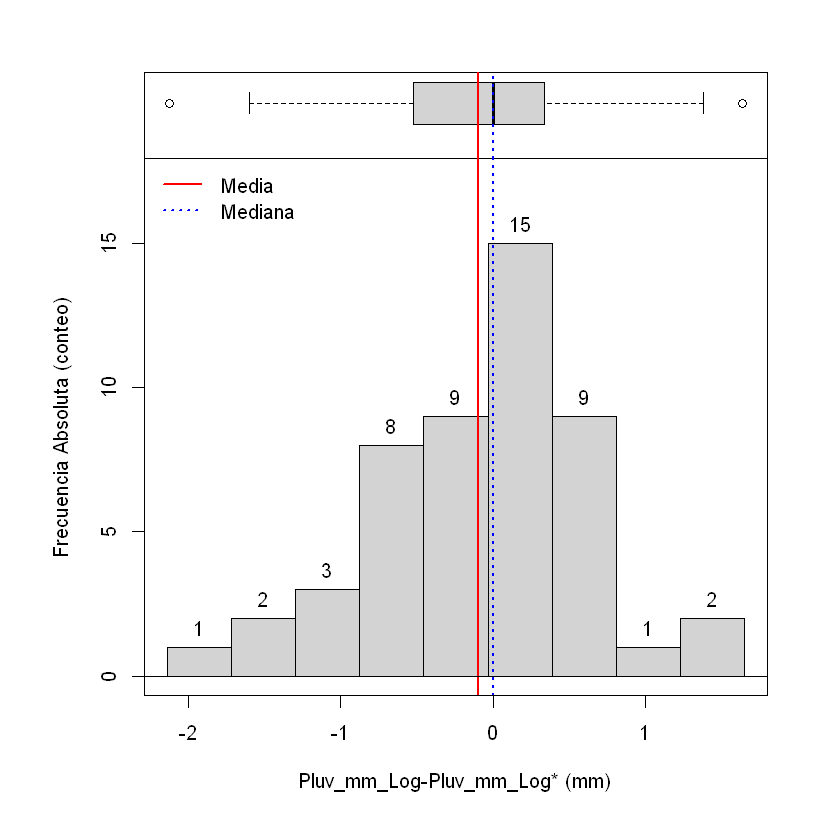

In [144]:
HistBoxplot(x=Pluv_mm_Log_CrossValid[,5], mean = Pluv_mm_Log_CrossValid_Stat[5,3], 
            median = Pluv_mm_Log_CrossValid_Stat[4,3], main ="", 
            xlab = "Pluv_mm_Log-Pluv_mm_Log* (mm)", ylab = "Frecuencia Absoluta (conteo)", 
            AbsFreq = TRUE, PercentFreq = FALSE )

Respecto a su histograma podemos notar que tiene valores atípicos en los extremos.

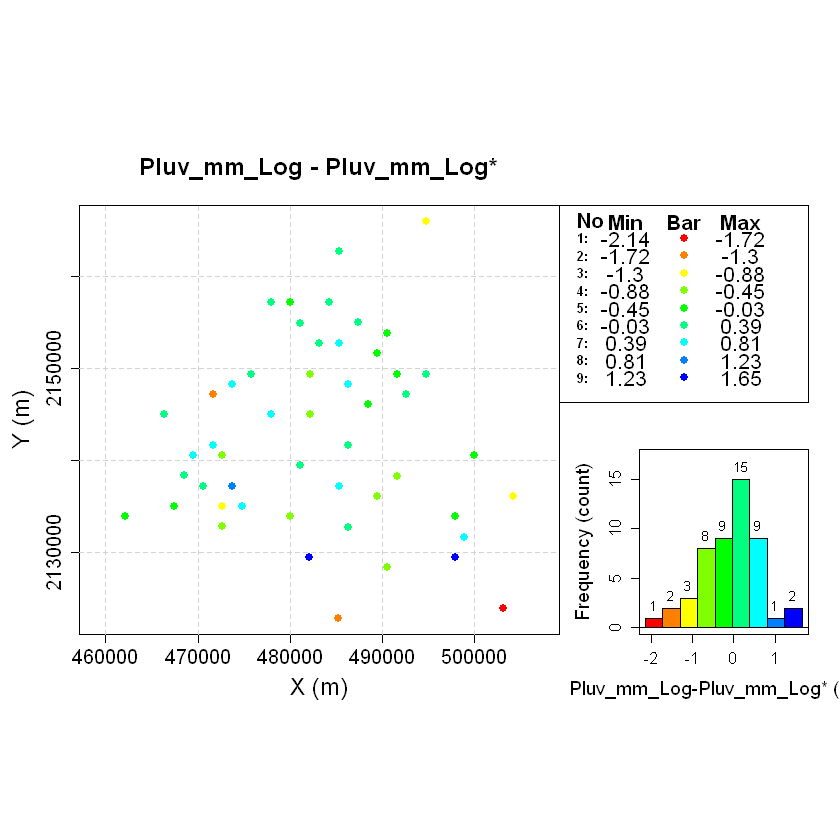

In [145]:
DEspacial(Pluv_mm_Log_CrossValid[,1], Pluv_mm_Log_CrossValid[,2], Pluv_mm_Log_CrossValid[,5],n_bins=9,
          'X (m)', 'Y (m)', 'Pluv_mm_Log-Pluv_mm_Log* (mm)', 'Pluv_mm_Log - Pluv_mm_Log*')

Los valores atípicos mostrados en el grafico espacial coinciden con los valores atípicos localizados en el análisis de la variable radar, en especial los tres que están debajo de la cota 2130000

In [146]:
# Pluv_mm_Log is the independent variable
X<-Pluv_mm_Log_CrossValid[,3] # the same as Pluv_mm_Log
# Pluv_mm_Log* is the dependent variable
Y<-Pluv_mm_Log_CrossValid[,4]

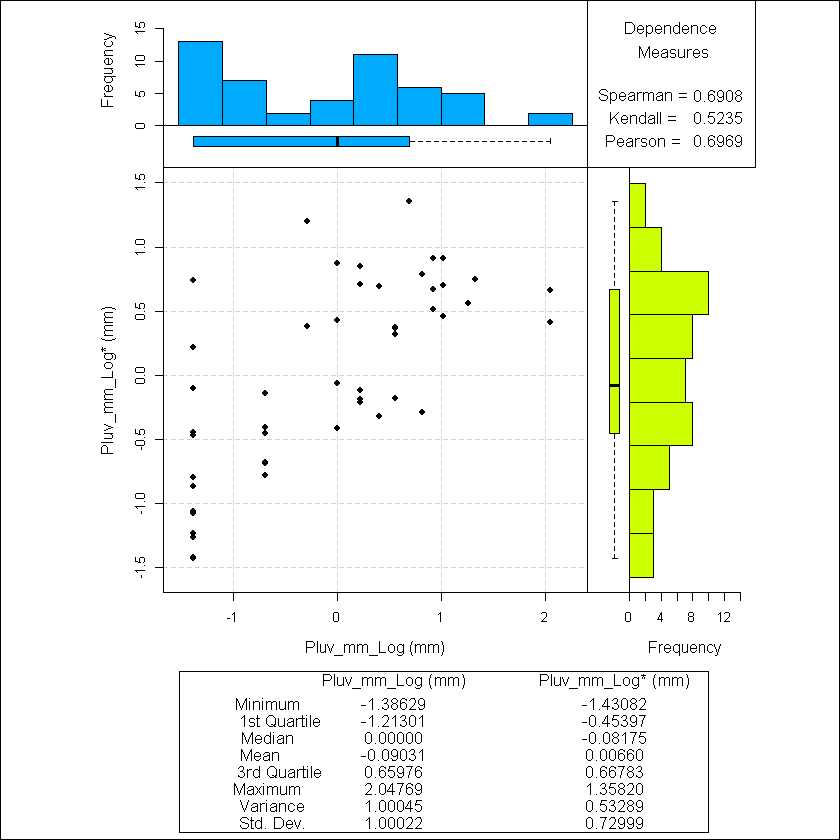

In [147]:
ScatterPlot(Pluv_mm_Log, Pluv_mm_Log_CrossValid[,4], 9, 
            Xmin = Pluv_mm_Log_Stat[2,2], Xmax = Pluv_mm_Log_Stat[7,2], 
            Ymin = Pluv_mm_Log_CrossValid_Stat[2,2],Ymax = Pluv_mm_Log_CrossValid_Stat[7,2], 
            XLAB = "Pluv_mm_Log (mm)", YLAB = "Pluv_mm_Log* (mm)")

Respecto a su grafico de dispersión podemos notar que los valores no tienen una buena dependencia, por lo tanto podemos considerar que la aproximación no es buena, pero podria ser aceptable.

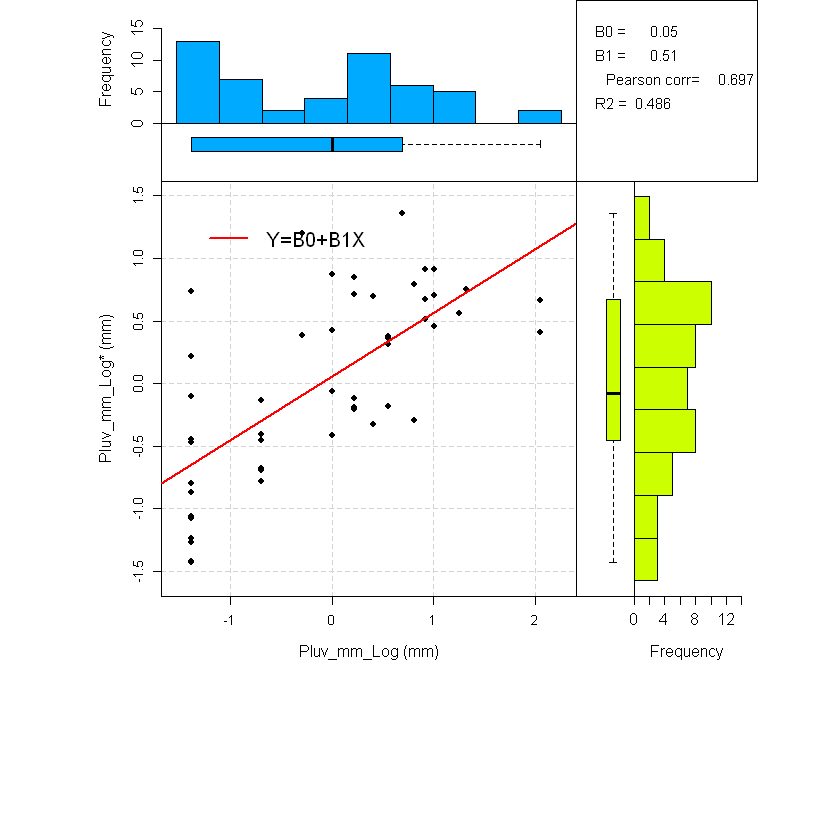

In [148]:
scaterplotReg(Pluv_mm_Log, Pluv_mm_Log_CrossValid[,4], 9, 
            Xmin = Pluv_mm_Log_Stat[2,2], Xmax = Pluv_mm_Log_Stat[7,2], 
            Ymin = Pluv_mm_Log_CrossValid_Stat[2,2],Ymax = Pluv_mm_Log_CrossValid_Stat[7,2], 
            XLAB = "Pluv_mm_Log (mm)", YLAB = "Pluv_mm_Log* (mm)")

# Estimación espacial

Ahora que ya tenemos el análisis variográfico, haremos la estimación espacial usando el método de kriging ordinario y cokriging.

Al igual que la sección de análisis variográfico, crearemos una nueva carpeta donde se guardarán las gráficas que obtengamos usando la siguiente línea.

In [149]:
dir.create(paste(getwd(),"/Results/EstimacionEspacial", sep=""))

Warning message in dir.create(paste(getwd(), "/Results/EstimacionEspacial", sep = "")):
"'C:\Users\danie\Dropbox\Semestre 2023-1\ejemplo lluvia\Results\EstimacionEspacial' already exists"


## Estimación espacial usando kriging ordinario en la variable Radar_mm_Log

Si seguimos los pasos que vimos en clase sobre los aspectos prácticos del Kriging (presentación CG6 a partir de la diapositiva 36), necesitamos tres elementos para hacer la estimación usando kriging ordinario. La primera es establecer la $\textbf{malla de estimación}$, la cual se recomienda debe ser aproximadamente igual a la distancia mínima de separación, En este ejercicio esa distancia ya se calculó en el análisis variográfico y está almacenada en la variable "DistMin".

La segunda es establecer la $\textbf{vecindad de búsqueda}$, esta nos permite determinar los puntos vecinos potenciales para la estimación. Esta distancia se determina tomando el alcance del variograma, sin embargo, como se vio en el análisis variográfico, el variograma puede ser isotrópico o anisotrópico.

* Para el caso isotrópico (siguiente imagen a la izquierda): tomar una circunferencia con centro en el punto a estimar y radio igual o menor al alcance del variograma.

* Para el caso anisotrópico (siguiente imagen a la derecha): tomar una elipse con centro en el punto a estimar y semiejes iguales o menores a los alcances del variograma anisotrópico.


![vecindad.png](images/vecindad.png)

En nuestro caso usamos un variográma adireccional que consideramos isotrópico, por lo tanto, los valores que necesitamos del variograma son los siguientes:

In [150]:
######## Radar_mm_Log
#modelos de variograma (1- exponential, 2- spherical, 3- gaussian)
Radar_mm_Log_vario_model<- 2
Radar_mm_Log_nugget<- 0.17
Radar_mm_Log_sill_and_nugget<- 0.8
Radar_mm_Log_rank <- 20000

La tercera condición es establecer el $\textbf{número de puntos mínimo y máximo}$ para hacer la estimación.

Recordando los aspectos prácticos del kriging podemos establecer que:

* mínimo de puntos entre 4 y 6
* máximo de puntos entre 10 y 25

En este caso el intervalo se estableció entre 4 y 10, los cuales se ingresan en las variables "minPoints" para mínimo de puntos y "maxPoints" para máximo de puntos

In [151]:
minPoints<-4
maxPoints<-10

Ya que ingresamos los parámetros iniciales del variograma y número de puntos procedemos a hacer la estimación usando kriging ordinario. Esto lo hacemos usando la función "KrigingOrd". Esta función se estructura de la siguiente forma: 

* Las coordenadas (CoorX, CoorY), la variable a usar (Prop1) que en este caso son las muestras obtenidas en el radar con transformación logarítmica (Radar_mm_Log) (NOTA: el vector debe contener toda la muestra, incluidos los valores atípicos. Si el variograma fue estimado usando muestras transformadas, entonces Prop1 debe usar las muestras transformadas)

* La información del variograma, que en este caso es el modelo (Radar_mm_Log_vario_model), valor del nugget (Radar_mm_Log_nugget), valor de la meseta más el nugget (Radar_mm_Log_sill_and_nugget) y el alcance (Radar_mm_Log_rank)

* El número de puntos mínimo (minPoints) y máximo (maxPoints) que previamente establecimos.

* Definimos el tamaño del espacio de trabajo. Para el eje X usamos (Xmin, Xmax) y para el eje Y usamos (Ymin, Ymax), estos valores los encontramos en los estadígrafos que calculamos de las coordenadas.

* Establecemos el tamaño de la celda, esto lo hacemos con las variables (TX,TY), como podemos observar, el tipo de celda en la siguiente función está determinada por la distancia mínima "DistMin" en ambas direcciones para que obtengamos celdas cuadradas ya que esa es la resolución mínima que tenemos. Si lo deseamos podemos poner diferentes distancias, sin embargo se debe justificar esa decisión, ya que podemos causar la creación de artefactos.

* Indicamos el tipo de transformación que tiene la variable que estamos usando. El parámetro invertir transformada "InvT" puede considerar tres tipos de transformaciones para asimetrías positivas: 1 si es logarítmica, 2 si es raíz cuadrada y 3 si es inversa. si la variable no tiene transformación o se usó otro tipo de transformación solo ponemos 0 (NOTA: en caso de usar otro tipo de transformación, las muestras obtenidas en la estimación kriging deben ser transformadas según la función. Por ejemplo, si la muestra fue diagnosticada con asimetría negativa y fue tratada con una transformación de potencia al cuadrado, entonces las muestras obtenidas con la estimación kriging deben transformarse usando la función raíz cuadrada, la cual se considera como función inversa de la potencia al cuadrado).

* Por último ingresamos las leyendas del gráfico: para el eje X (NameX), para el eje Y "NameY", el título de la imagen resultante del kriging "Titulo1" y el título de la imagen obtenida de la desviación estándar (Titulo2).



[using ordinary kriging]


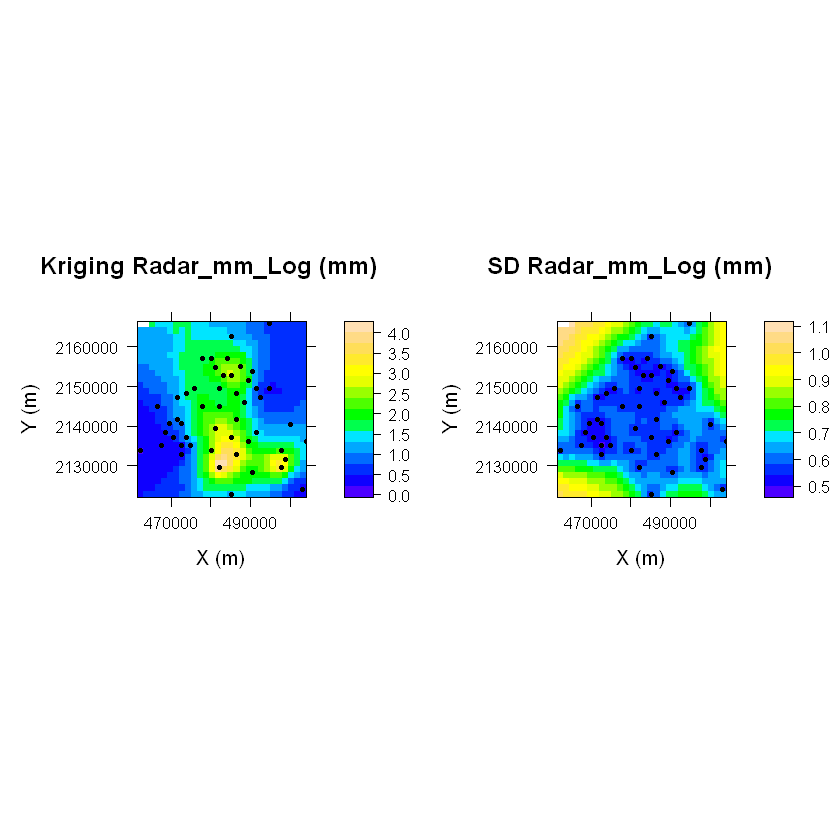

In [152]:
Radar_mm_Log_OrdKrig <- KrigingOrd(CoorX = XCoord, CoorY = YCoord, 
                             Prop1 = Radar_mm_Log, Modelo = Radar_mm_Log_vario_model, Nugget = Radar_mm_Log_nugget, 
                             SillYNugget = Radar_mm_Log_sill_and_nugget, Alcance = Radar_mm_Log_rank,
                             minPar = minPoints, maxPar = maxPoints, 
                             Xmin = XCoord_Stat[2,2], Xmax = XCoord_Stat[7,2], 
                             Ymin = YCoord_Stat[2,2], Ymax = YCoord_Stat[7,2], 
                             TX=DistMin, TY=DistMin, InvT=1, NameX="X (m)", 
                             NameY="Y (m)", Titulo1="Kriging Radar_mm_Log (mm)", 
                             Titulo2="SD Radar_mm_Log (mm)")

El resultado es la imagen anterior, a la izquierda tenemos la estimación que se obtuvo usando kriging ordinario y a la derecha su desviación estándar, si analizamos estas imágenes podemos notar que las estimaciones con la menor desviación estándar se encuentran en el centro, esto se debe a su abundancia de puntos vecinos, mientras que las estimaciones con desviación estándar alta se encuentran a las orillas debido a la pobre distribución de muestras en esas zonas, si ejecutamos la línea "Radar_mm_Log_OrdKrig" en la consola, obtenemos una tabla dividida en cuatro columnas con la información de la estimación: la columna V1 muestra las coordenadas en X, la columna V2 muestra las coordenadas en Y, la columna V3 muestra los valores estimados por kriging ordinario y la columna V4 muestra los valores de la desviación estándar del valor estimado.

In [153]:
Radar_mm_Log_OrdKrig

V1,V2,V3,V4
462178.0,2122836,0.3807191,1.0056316
463703.8,2122836,0.6513284,0.9727598
465229.6,2122836,0.6350795,0.9675436
466755.4,2122836,0.6090698,0.9611977
468281.2,2122836,0.6489124,0.9547559
469807.0,2122836,0.6067122,0.9299016
471332.8,2122836,0.6787958,0.9180130
472858.6,2122836,0.7732874,0.9032500
474384.4,2122836,0.9930957,0.8897243
475910.2,2122836,1.1150180,0.8653273


Sí ejecutamos la siguiente línea solo nos muestra los primeros seis renglones de la tabla.

In [154]:
head(Radar_mm_Log_OrdKrig)

V1,V2,V3,V4
462178.0,2122836,0.3807191,1.0056316
463703.8,2122836,0.6513284,0.9727598
465229.6,2122836,0.6350795,0.9675436
466755.4,2122836,0.6090698,0.9611977
468281.2,2122836,0.6489124,0.9547559
469807.0,2122836,0.6067122,0.9299016


En caso de que usemos un variograma anisotrópico debemos usar la función "KrigingOrdAnis", esta función necesita los siguientes parámetros:

* Las coordenadas (CoorX, CoorY), la variable a usar (Prop1) que en este caso son las muestras obtenidas en los pluviómetros con transformación logarítmica (Radar_mm_Log)

* La información del variograma, que en este caso es el modelo (Radar_mm_Log_vario_model), valor del nugget (Radar_mm_Log_nugget), valor de la meseta más el nugget (Radar_mm_Log_sill_and_nugget) y el alcance (Radar_mm_Log_rank)

* El número de puntos mínimo (minPoints) y máximo (maxPoints) que previamente establecimos.

* Establecemos el tamaño de la celda, esto lo hacemos con las variables (malla), en este caso la función no permite ser flexible con las medidas de la celda, por lo que siempre será cuadrada.

* Indicamos el tipo de transformación que tiene la variable que estamos usando. El parámetro "InvT" puede considerar tres tipos de transformaciones positivas: 1 si es logarítmica, 2 si es raíz cuadrada y 3 si es inversa. si la variable no tiene transformación solo ponemos 0.

* Indicamos los valores del variograma anisotrópico: ángulo de máxima anisotropía (MaxAnis) y su proporción (proporcion). Estos valores son calculados en el análisis variográfico.

* Por último ingresamos las leyendas del gráfico: para el eje X (NameX), para el eje Y "NameY", el título de la imagen resultante del kriging "Titulo1" y el título de la imagen obtenida de la desviación estándar (Titulo2).

[using ordinary kriging]


Warning message in sqrt(kriging$var1.var):
"NaNs produced"


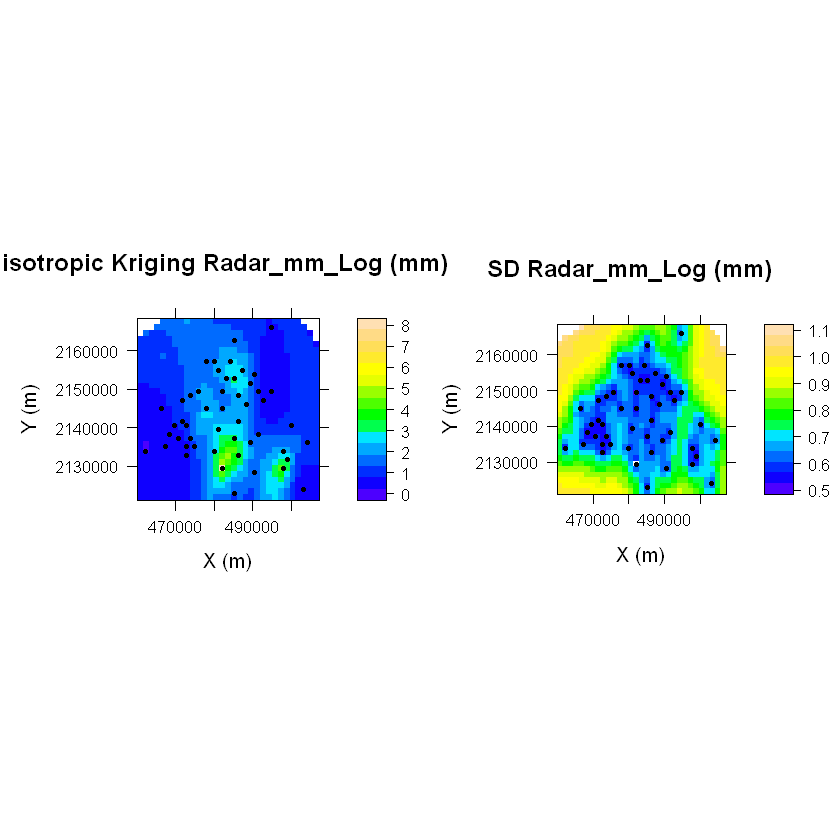

In [155]:
Radar_mm_Log_OrdKrigAnis <- KrigingOrdAnis(CoorX = XCoord, CoorY = YCoord, 
               Prop1 = Radar_mm_Log, Modelo = Radar_mm_Log_vario_model, Nugget = Radar_mm_Log_nugget, 
               SillYNugget = Radar_mm_Log_sill_and_nugget, Alcance = Radar_mm_Log_rank,
               minPar = minPoints, maxPar = maxPoints,
               malla = DistMin, InvT = 1, MaxAnis = 0, proporcion = 0.5,
               NameX="X (m)", 
               NameY="Y (m)", Titulo1="Anisotropic Kriging Radar_mm_Log (mm)", 
               Titulo2="SD Radar_mm_Log (mm)")

## Estimación espacial usando kriging ordinario en la variable Pluv_mm_Log

Al igual que la variable radar, para la estimación espacial usando kriging ordinario para la variable Pluv_mm_Log necesitamos los mismos elementos: dimensiones de la malla, variograma y número de puntos. El primer y tercer punto son iguales en ambas variables, solo cambia los valores del variograma, los cuales son los siguientes:

In [156]:
Pluv_mm_Log_vario_model<- 2
Pluv_mm_Log_nugget<- 0.08
Pluv_mm_Log_sill_and_nugget<- 1.1
Pluv_mm_Log_rank <- 15000

ya que tenemos los valores del variograma, usamos la función "KrigingOrd" y estimamos.

[using ordinary kriging]


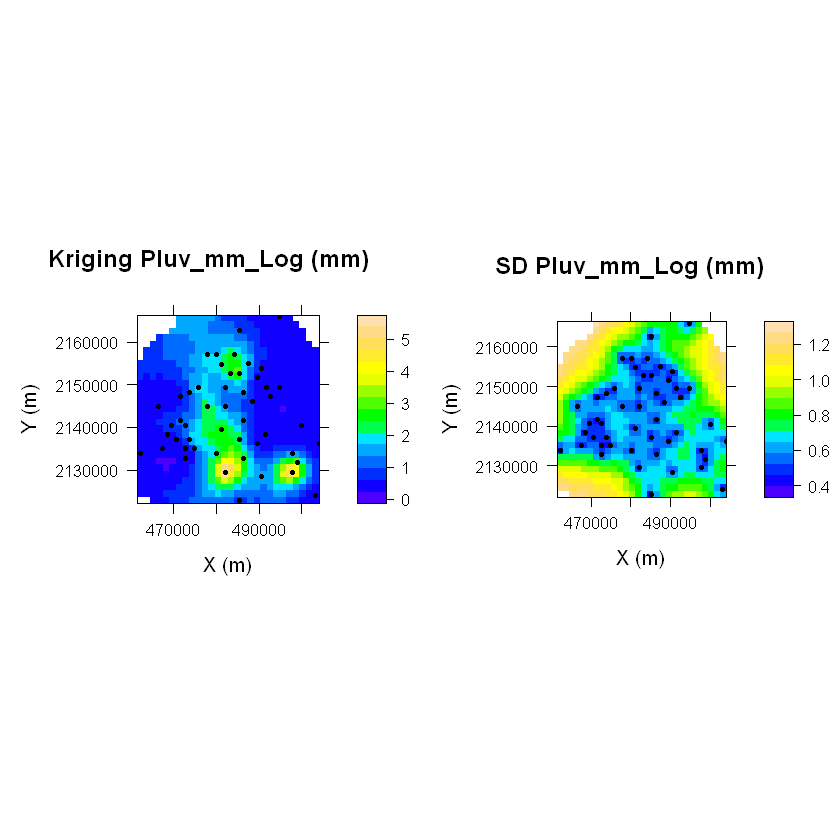

In [157]:
Pluv_mm_Log_OrdKrig <- KrigingOrd(CoorX = XCoord, CoorY = YCoord, 
                                   Prop1 = Pluv_mm_Log, Modelo = Pluv_mm_Log_vario_model, Nugget = Pluv_mm_Log_nugget, 
                                   SillYNugget = Pluv_mm_Log_sill_and_nugget, Alcance = Pluv_mm_Log_rank,
                                   minPar = minPoints, maxPar = maxPoints, 
                                   Xmin = XCoord_Stat[2,2], Xmax = XCoord_Stat[7,2], 
                                   Ymin = YCoord_Stat[2,2], Ymax = YCoord_Stat[7,2], 
                                   TX=DistMin, TY=DistMin, InvT=1, NameX="X (m)", 
                                   NameY="Y (m)", Titulo1="Kriging Pluv_mm_Log (mm)", 
                                   Titulo2="SD Pluv_mm_Log (mm)") 

Si analizamos la imagen resultante podemos ver la desviación estándar solo es buena cerca de los puntos donde se encuentran los pluviómetros.

In [158]:
head(Pluv_mm_Log_OrdKrig)

V1,V2,V3,V4
465229.6,2122836,0.2500000,1.249798
466755.4,2122836,0.3720087,1.234793
468281.2,2122836,0.3604417,1.233255
469807.0,2122836,0.8629939,1.182966
471332.8,2122836,0.6924827,1.150607
472858.6,2122836,0.8631012,1.151633


Calculamos los estadígrafos del kriging ordinario.

In [159]:
Pluv_mm_Log_OrdKrig_stat<-Estadisticas(Pluv_mm_Log_OrdKrig[,3])
Pluv_mm_Log_OrdKrig_stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,774.0000
minimos,Minimum,0.2174
cuantiles1,1st. Quartile,0.3728
medianas,Median,0.8514
medias,Mean,1.0599
cuantiles3,3rd. Quartile,1.4867
maximos,Maximum,5.3877
rangos,Rank,5.1704
rangosInt,Interquartile Rank,1.1139


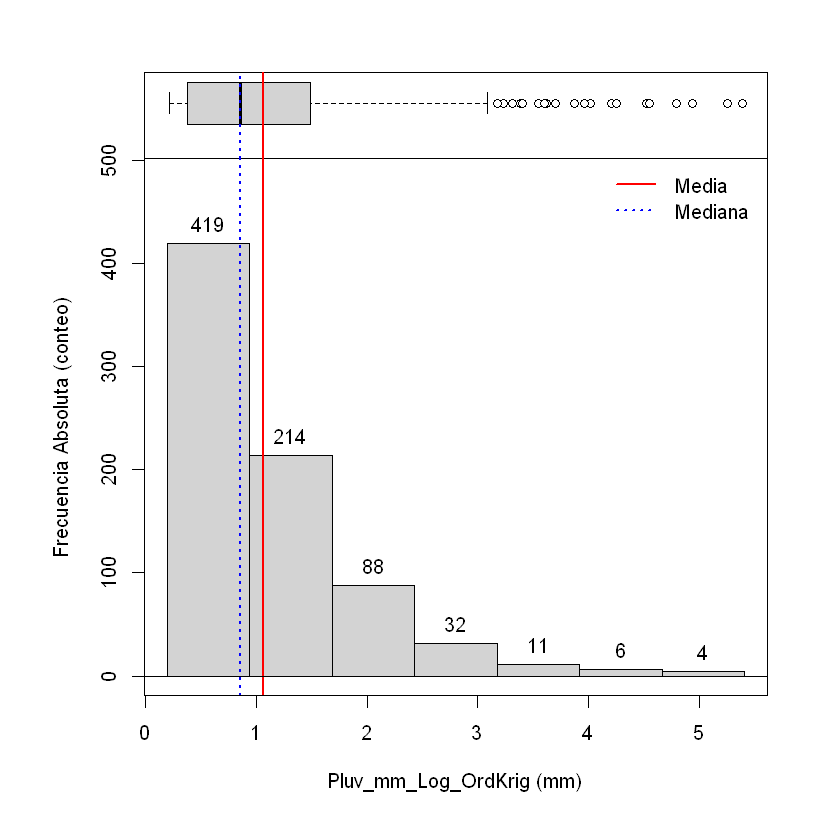

In [69]:
HistBoxplot(x=Pluv_mm_Log_OrdKrig[,3], mean = Pluv_mm_Log_OrdKrig_stat[5,2], median = Pluv_mm_Log_OrdKrig_stat[4,2], main ="",  
            xlab = "Pluv_mm_Log_OrdKrig (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

También podemos obtener su variograma y evaluar cuanto se ajusta el resultado de la estimación usando kriging 

variog: computing omnidirectional variogram


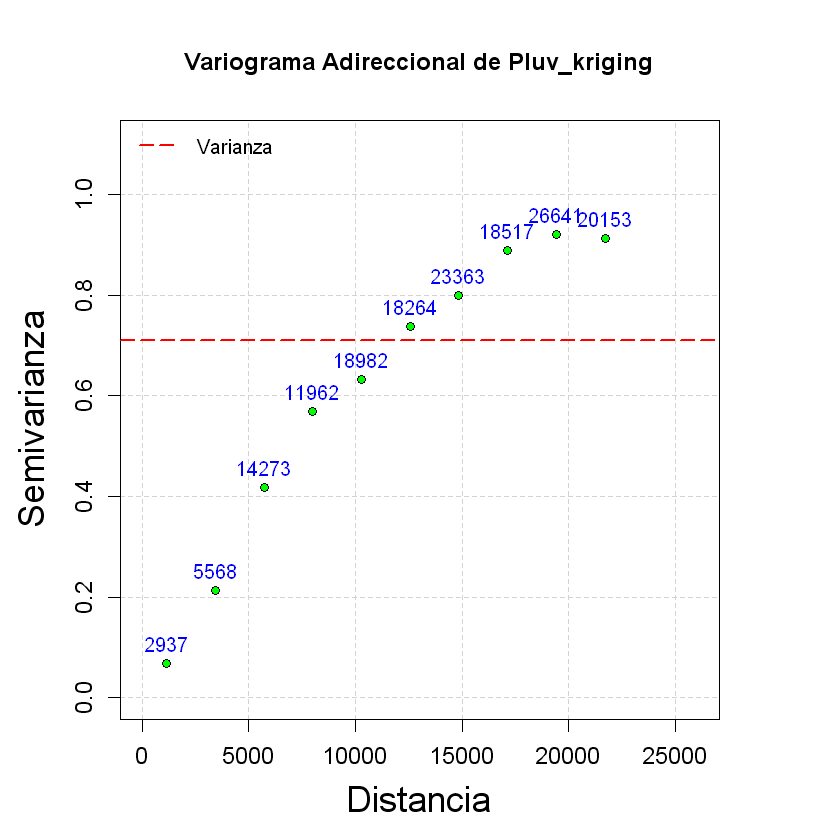

In [161]:
Pluv_ordikrig_1_Log_VarioEstimation<-Variograma(Pluv_mm_Log_OrdKrig[,1], Pluv_mm_Log_OrdKrig[,2], 
                                           Pluv_mm_Log_OrdKrig[,3], 0, 90, 1*N_lags, lag_value, 1, 
                                                "Variograma Adireccional de Pluv_kriging")

variog: computing omnidirectional variogram


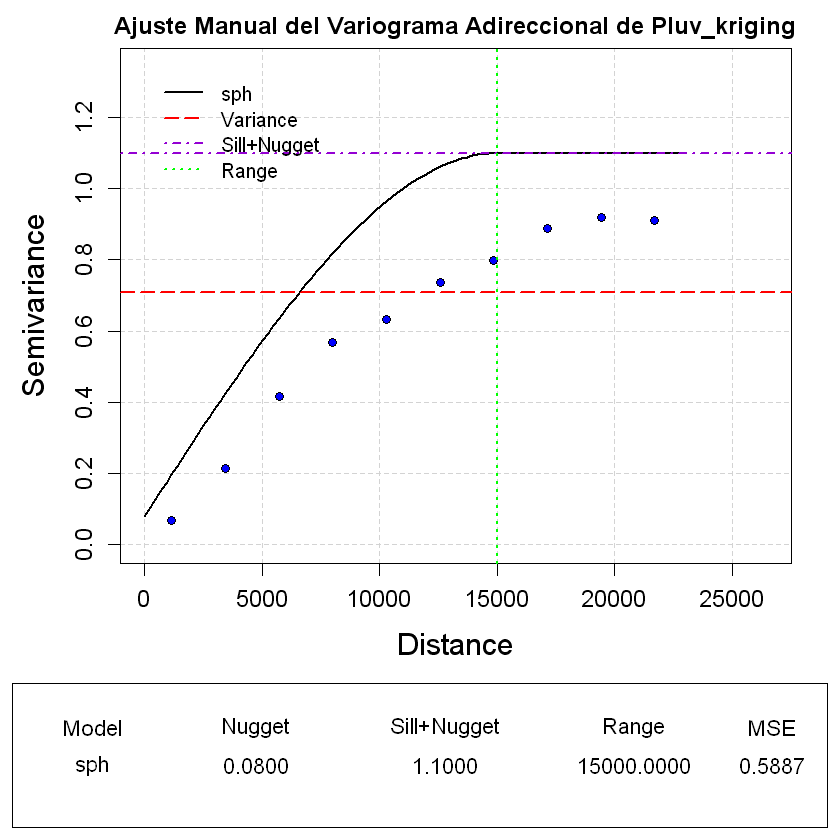

In [162]:
Pluv_mm_Log_vario_model<- 2
Pluv_mm_Log_nugget<- 0.08
Pluv_mm_Log_sill_and_nugget<- 1.1
Pluv_mm_Log_rank <- 15000

Pluv_SGS_1_EyeModelVarioFit<-EyeModel(Pluv_mm_Log_OrdKrig[,1], Pluv_mm_Log_OrdKrig[,2], 
                                      Pluv_mm_Log_OrdKrig[,3], 0, 90, N_lags, lag_value, 1, 
                                      Pluv_mm_Log_vario_model, Pluv_mm_Log_nugget, Pluv_mm_Log_sill_and_nugget, Pluv_mm_Log_rank,
                                      "Ajuste Manual del Variograma Adireccional de Pluv_kriging")

## Estimación espacial usando Co-kriging ordinario

### Análisis variográfico bivariado

Para obtener la estimación por co-kriging debemos hacer un análisis variográfico bivariado. Si revisamos lo aprendido en la clase, la manera más aceptada es usar un modelo de corregionalización lineal.

Este modelo consiste en:

* Modelar cada semivariograma simple y semivariograma cruzado individualmente
* Determinar el número de estructuras anidadas de manera que sea mínimo (es deseable que sea cuanto más tres)
* Comprobar que todos los determinantes de los menores de orden dos son no negativos.
* Verificar que todas las matrices de corregionalización sean positivas semidefinidas, en caso contrario hacer los cambios necesarios hasta satisfacer la condición o volver al paso 2.

Para cumplir con el primer y segundo paso vamos a estimar tres variogramas dos para cada variable (radar y pluviómetros) y el variograma cruzado.

Comenzamos con definir los parámetros básicos del semivariograma: número de intervalos(N_lags), distancia mínima (DistMin), distancia máxima (DistMax) y el valor del intervalo (lag_value)

In [163]:
N_lags<-10
DistMin<-min(dist(Data_File[,1:2])) # Minimum distance in data
DistMax<-max(dist(Data_File[,1:2])) # Maximum distance in data
lag_value<-max((DistMax/2)/N_lags, DistMin)

Para estimar el variograma cruzado usamos la función "CrossVariograma", esta función necesita los siguientes parámetros:

* Las coordenadas (CoorX, CoorY), las variables a usar (P1,P2) que en este caso son las muestras obtenidas en los pluviómetros con transformación logarítmica (Pluv_mm_Log) y la imagen del Radar con transformación logarítmica (Radar_mm_Log)

* Los parámetros para estimar el semivariograma: número de intervalos (NInt), el valor del intervalo (lags), dirección (Direccion) y su tolerancia angular (Tol), como en este caso es variograma adireccional la dirección es de 0º y su tolerancia es de 90º.

* Títulos de las imágenes para la primera variable (NomP1), segunda variable (NomP2) y variograma cruzado (NomP1P2)

$\textbf{Nota:}$ Es importante mencionar que en caso de que la dependencia de las variables sea negativa, entonces una de las variables debe ser multiplicada por -1, de lo contrario el modelo de corregionalización dará valores negativos

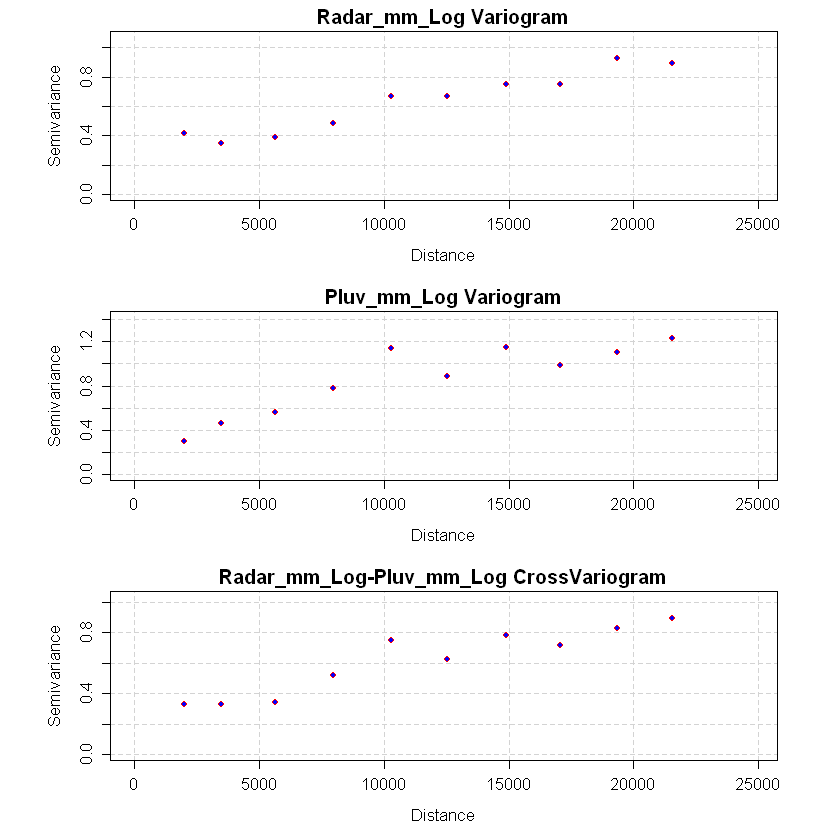

In [164]:
Radar_mm_Log_Pluv_mm_Log_CrossVario<-CrossVariograma(CoorX = XCoord, CoorY = YCoord, 
                                             P1 = Radar_mm_Log, P2 = Pluv_mm_Log, 
                                             NInt = N_lags, lags = lag_value,
                                             Direccion = 0, Tol = 90, 
                                             NomP1 = 'Radar_mm_Log Variogram',
                                             NomP2 = 'Pluv_mm_Log Variogram',
                                             NomP1P2 = 'Radar_mm_Log-Pluv_mm_Log CrossVariogram')

Esto nos da como resultado una imagen donde podemos ver tres variogramas: el de la variable Radar_mm_Log, variable Pluv_mm_Log y el variograma cruzado.

Para estimar el modelo de variograma debemos ingresar los datos de cada modelo, para cada variograma simple iniciamos conservando el valor de la meseta y el nugget, el alcance y modelo de variograma serán determinados por la variable que nos interesa estimar mediante co-kriging, en este caso Pluv_mm_Log.

In [165]:
# Radar_mm_Log
Radar_mm_Log_vario_model<- 2
Radar_mm_Log_nugget<- 0.17
Radar_mm_Log_sill_minus_nugget<- 0.63
Radar_mm_Log_rank <- 15000

In [166]:
# Pluv_mm_Log
Pluv_mm_Log_vario_model<- 2
Pluv_mm_Log_nugget<- 0.08
Pluv_mm_Log_sill_minus_nugget<- 1.02
Pluv_mm_Log_rank <- 15000

In [167]:
# Cross-variogram
Radar_mm_Log_Pluv_mm_Log_vario_model<- 2 # spherical
Radar_mm_Log_Pluv_mm_Log_nugget<- 0.001
Radar_mm_Log_Pluv_mm_Log_sill_minus_nugget<- 0.8
Radar_mm_Log_Pluv_mm_Log_rank <- 15000

Para obtener el modelo del variograma cruzado usamos la función "ModelVariogram", esta función necesita los siguientes parámetros:

* Las coordenadas (CoorX, CoorY), las variables a usar (Radar_mm_Log, Pluv_mm_Log) que en este caso son las muestras obtenidas en los pluviómetros con transformación logarítmica (Pluv_mm_Log) y la imagen del Radar con transformación logarítmica (Radar_mm_Log)

* Los parámetros para estimar el semivariograma: número de intervalos (N_lags), el valor del intervalo (lag_value), dirección (Direccion) y su tolerancia angular (Tol), como en este caso es variograma adireccional la dirección es de 0º y su tolerancia es de 90º.

* Los valores de cada variograma que colocamos en las lineas anteriores (Radar_mm_Log_Pluv_mm_Log_vario_model, Radar_mm_Log_sill_minus_nugget, Pluv_mm_Log_sill_minus_nugget, Radar_mm_Log_Pluv_mm_Log_sill_minus_nugget, Radar_mm_Log_nugget, Pluv_mm_Log_nugget, Radar_mm_Log_Pluv_mm_Log_nugget, Radar_mm_Log_Pluv_mm_Log_rank)

* Títulos para cada variograma ('Radar_mm_Log Variogram', 'Pluv_mm_Log Variogram', 'Radar_mm_Log-Pluv_mm_Log CrossVariogram')

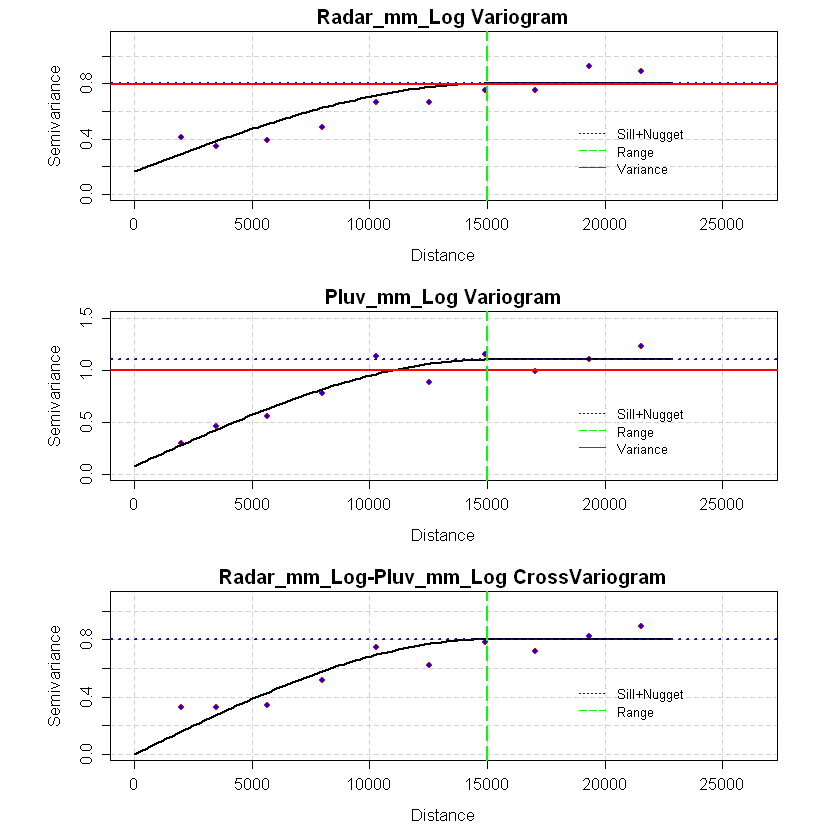

In [168]:
ModelVariogram(XCoord, YCoord, 
               Radar_mm_Log, Pluv_mm_Log, 
               N_lags, lag_value, 0, 90, 
               Radar_mm_Log_Pluv_mm_Log_vario_model, 
               Radar_mm_Log_sill_minus_nugget, Pluv_mm_Log_sill_minus_nugget, 
               Radar_mm_Log_Pluv_mm_Log_sill_minus_nugget, Radar_mm_Log_nugget, Pluv_mm_Log_nugget, 
               Radar_mm_Log_Pluv_mm_Log_nugget, Radar_mm_Log_Pluv_mm_Log_rank, 
               'Radar_mm_Log Variogram', 'Pluv_mm_Log Variogram', 'Radar_mm_Log-Pluv_mm_Log CrossVariogram')

Ya que estimamos los variogramas, debemos verificar que los determinantes del nugget y meseta sean positivas semidefinidas, es decir 

$$\begin{pmatrix}
\gamma_{PP}(\underline{h}) & \gamma_{PR}(\underline{h}) \\
\gamma_{RP}(\underline{h}) &  \gamma_{RR}(\underline{h})
\end{pmatrix}
=
\begin{pmatrix}
0.08 & 0.001 \\
0.001 & 0.17
\end{pmatrix}\gamma_{0}(\underline{h})
+\begin{pmatrix}
1.02 & 0.8 \\
0.8 &  0.63
\end{pmatrix}\gamma_{1}(\underline{h})$$

Para hacer esto usamos la función "det" para cada caso, la cual requiere que los valores sean ingresados en una matriz.

In [169]:
NugetMatrix <- matrix(c(Pluv_mm_Log_nugget,
                        Radar_mm_Log_Pluv_mm_Log_nugget,
                        Radar_mm_Log_Pluv_mm_Log_nugget,
                        Radar_mm_Log_nugget), ncol = 2)
det(NugetMatrix)

[1] 0.013599

$$det
\begin{pmatrix}
0.08 & 0.001 \\
0.001 & 0.17
\end{pmatrix}
=0.013599>0$$

el determinante es positivo

In [170]:
SemiVariMatrix1 <- matrix(c(Pluv_mm_Log_sill_minus_nugget,
                     Radar_mm_Log_Pluv_mm_Log_sill_minus_nugget,
                     Radar_mm_Log_Pluv_mm_Log_sill_minus_nugget,
                     Radar_mm_Log_sill_minus_nugget), ncol = 2)
det(SemiVariMatrix1)

[1] 0.0026

$$det
\begin{pmatrix}
1.02 & 0.8 \\
0.8 &  0.63
\end{pmatrix}
=0.0026>0$$

el determinante es positivo

ya que sabemos que los determinantes son positivos semidefinidos debemos hacer la validación cruzada, al igual que en el análisis variográfico, el método consiste en estimar por Cokriging los valores en los puntos muestrales usando el procedimiento de leave one out.

Esto lo podemos hacer usando la función "CrossValidation2". la cual necesita de los siguientes parámetros:

* Las coordenadas (XCoor, YCoor), las variables a usar (Radar_mm_Log, Pluv_mm_Log) que en este caso son las muestras obtenidas en los pluviómetros con transformación logarítmica (Pluv_mm_Log) y la imagen del Radar con transformación logarítmica (Radar_mm_Log)

* Los parámetros para estimar el semivariograma: número de intervalos (N_lags), el valor del intervalo (lag_value)

* Los valores de nugget, meseta, alcance y modelo de cada variograma simple y cruzado.

In [171]:
Pluv_mm_Log_CrossValid2<- CrossValidation2(XCoord, YCoord, 
                                        Pluv_mm_Log, Radar_mm_Log, 
                                        N_lags, lag_value, Radar_mm_Log_Pluv_mm_Log_vario_model, 
                                        Pluv_mm_Log_sill_minus_nugget, Radar_mm_Log_sill_minus_nugget, 
                                        Radar_mm_Log_Pluv_mm_Log_sill_minus_nugget, Pluv_mm_Log_nugget, 
                                        Radar_mm_Log_nugget, Radar_mm_Log_Pluv_mm_Log_nugget, 
                                        Radar_mm_Log_Pluv_mm_Log_rank)

Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
Linear Model of Coregionalization foun

In [172]:
head(Pluv_mm_Log_CrossValid2)

,X,Y,Z,Z*,Z-Z*
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,485303,2162682,0.0000000,-0.09802348,0.09802348
2,484253,2157150,0.9162907,0.67624411,0.24004662
3,487403,2154937,0.5596158,0.64957678,-0.08996099
4,490552,2153830,-0.6931472,-0.31209350,-0.38105368
5,489502,2151601,-0.6931472,0.29077563,-0.98392281
6,480054,2157142,0.4054651,0.42329067,-0.01782556


El resultado es una tabla donde las filas 1 y 2 tienen la información de las coordenadas, la fila 3 tiene los valores de la variable $\textbf(Z)$, la fila 4 muestra los valores estimados con el método de validación cruzada, estimando el valor con el método de co-kriging usando el variograma cruzado propuesto $\textbf(Z^*)$, la fila 5 es la diferencia entre la variable y los valores estimados $\textbf(Z-Z^*)$

Y también podemos obtener sus estadígrafos usando la función "Val_Estadisticos"

In [173]:
Pluv_mm_Log_CrossValid2_Sta <- Val_Estadisticos(Pluv_mm_Log_CrossValid2[,c(3,4,5)])
Pluv_mm_Log_CrossValid2_Sta

,Z,Z*,Z-Z*
,<dbl>,<dbl>,<dbl>
No_muestras,50.00000,50.00000,50.00000
Minimo,-1.38629,-2.19414,-1.41856
Cuartil_1er,-1.21301,-0.56034,-0.14604
Mediana,0.00000,0.14359,0.04081
Media,-0.09031,-0.08377,-0.00654
Cuartil_3er,0.65976,0.59301,0.39143
Maximo,2.04769,1.56279,0.80785
Rango,3.43399,3.75693,2.22641
Rango_Intercuartil,1.87277,1.15334,0.53747


También graficamos su histograma

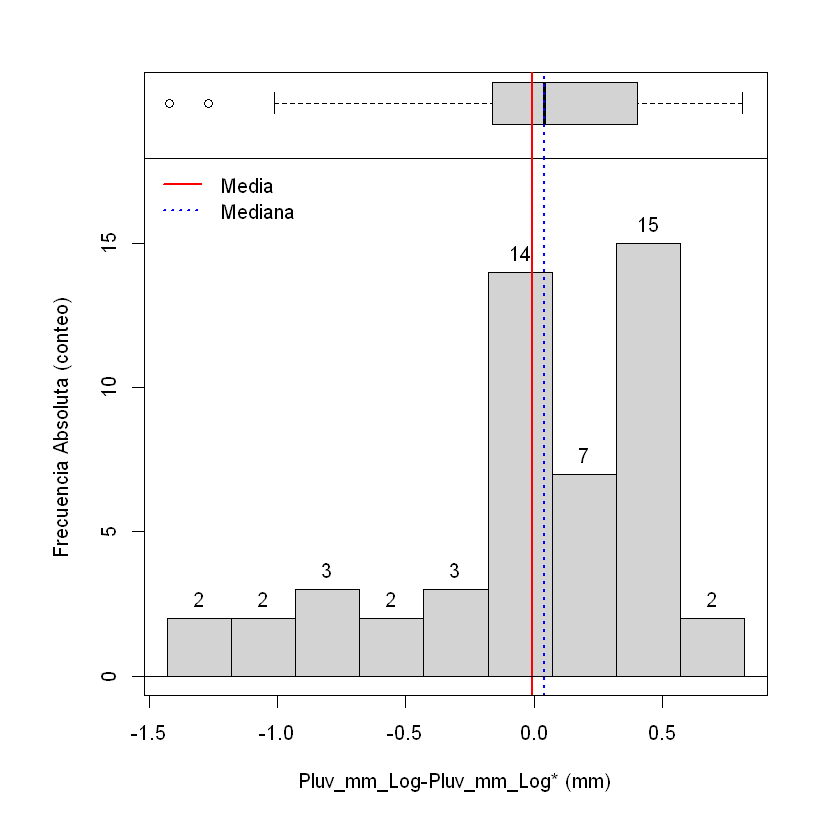

In [174]:
HistBoxplot(x=Pluv_mm_Log_CrossValid2[,5], mean = Pluv_mm_Log_CrossValid2_Sta[5,3], 
            median = Pluv_mm_Log_CrossValid2_Sta[4,3], 
            main ="", xlab = "Pluv_mm_Log-Pluv_mm_Log* (mm)", ylab = "Frecuencia Absoluta (conteo)", 
            AbsFreq = TRUE, PercentFreq = FALSE )

Y evaluamos los posibles valores atípico, a diferencia de la estimación por kriging, podemos notar que hay dos valores atípicos localizados a la izquierda del histograma y su ubicación espacial (puntos rojos) es muy distinta.

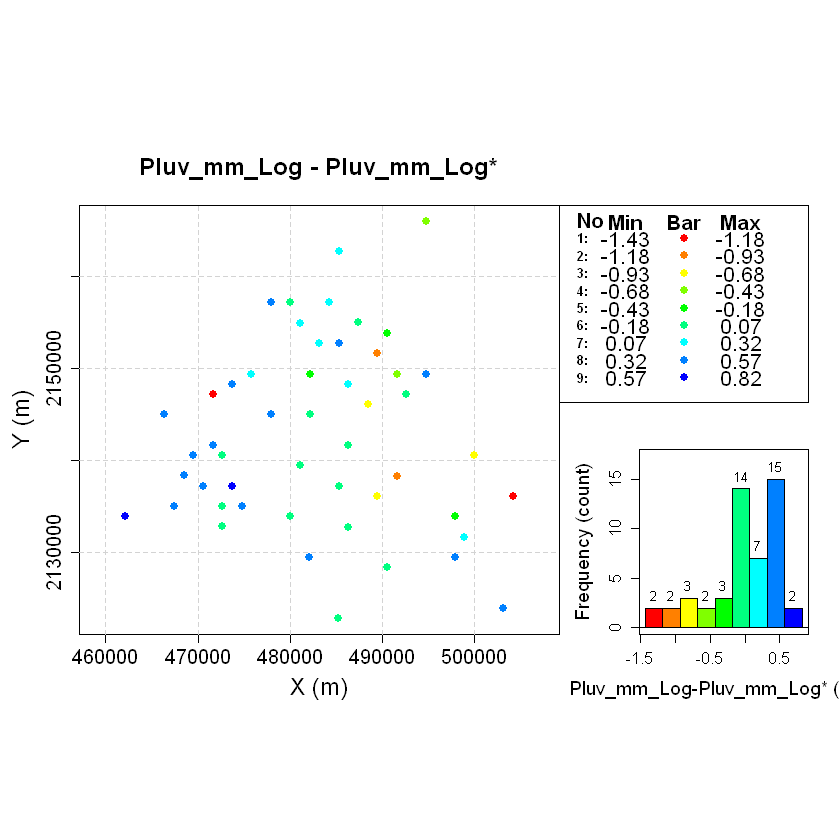

In [175]:
DEspacial(Pluv_mm_Log_CrossValid2[,1], Pluv_mm_Log_CrossValid2[,2], Pluv_mm_Log_CrossValid2[,5],n_bins=9,
          'X (m)', 'Y (m)', 'Pluv_mm_Log-Pluv_mm_Log* (mm)', 'Pluv_mm_Log - Pluv_mm_Log*')

### Estimación usando co-kriging ordinario para la variable Pluv_mm_Log

Ya que tenemos el modelo de corregionalización podemos hacer la estimación usando co-kriging ordinario. Para hacerlo usamos la función "CoKrigingOrd"

* Las coordenadas (CoorX, CoorY), las variables a usar (Radar_mm_Log, Pluv_mm_Log) que en este caso son las muestras obtenidas en los pluviómetros con transformación logarítmica (Pluv_mm_Log) y la imagen del Radar con transformación logarítmica (Radar_mm_Log)

* La información de los variogramas simples y cruzado

* El número de puntos mínimo (minPoints) y máximo (maxPoints) que previamente establecimos.

* Definimos el tamaño del espacio de trabajo. Para el eje X usamos (Xmin, Xmax) y para el eje Y usamos (Ymin, Ymax), estos valores los encontramos en los estadígrafos que calculamos de las coordenadas.

* Establecemos el tamaño de la celda, esto lo hacemos con las variables (TX,TY), como podemos observar, el tipo de celda en la siguiente función está determinada por la distancia mínima "DistMin" en ambas direcciones para que obtengamos celdas cuadradas ya que esa es la resolución mínima que tenemos. Si lo deseamos podemos poner diferentes distancias, sin embargo se debe justificar esa decisión, ya que podríamos causar la creación de artefactos.

* Indicamos el tipo de transformación que tiene la variable que estamos usando. El parámetro "InvT" puede considerar tres tipos de transformaciones positivas: 1 si es logarítmica, 2 si es raíz cuadrada y 3 si es inversa. si la variable no tiene transformación solo ponemos 0.

* Por último ingresamos las leyendas del gráfico: para el eje X (NameX), para el eje Y "NameY", el título de la imagen resultante del kriging "Titulo1" y el título de la imagen obtenida de la desviación estándar (Titulo2).


Linear Model of Coregionalization found. Good.
[using ordinary cokriging]


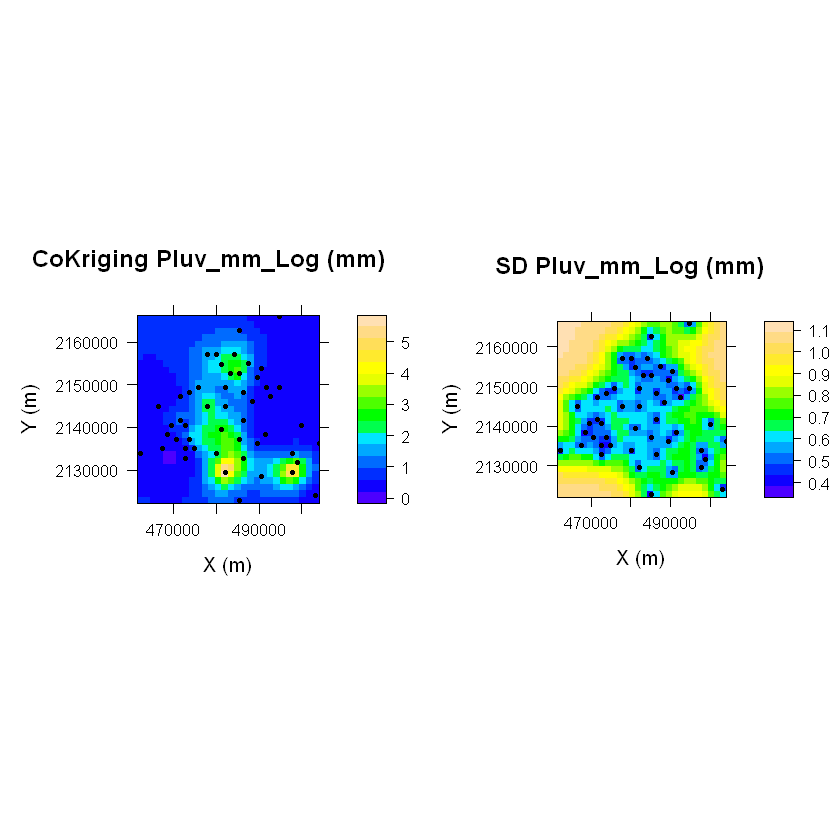

In [176]:
Pluv_mm_Log_CoKrig <- CoKrigingOrd(XCoord, YCoord, 
                              Pluv_mm_Log, Radar_mm_Log,
                              Radar_mm_Log_Pluv_mm_Log_vario_model, 
                              Pluv_mm_Log_sill_minus_nugget, Radar_mm_Log_sill_minus_nugget, 
                              Radar_mm_Log_Pluv_mm_Log_sill_minus_nugget, 
                              Pluv_mm_Log_nugget, Radar_mm_Log_nugget,
                              Radar_mm_Log_Pluv_mm_Log_nugget, Radar_mm_Log_Pluv_mm_Log_rank, 
                              minPar = minPoints, maxPar = maxPoints,
                              Xmin = XCoord_Stat[2,2], Xmax = XCoord_Stat[7,2], 
                              Ymin = YCoord_Stat[2,2], Ymax = YCoord_Stat[7,2],
                              TX=DistMin, TY=DistMin, InvT=1, NameX="X (m)", 
                              NameY="Y (m)", Titulo1="CoKriging Pluv_mm_Log (mm)", 
                              Titulo2="SD Pluv_mm_Log (mm)")

# Simulación secuencial Gaussiana condicional

Ya que exploramos las ventajas y desventajas del kriging y cokriging, podemos comparar sus resultados con otros métodos, en este caso la simulación. Las diferencias que hay entre los métodos de estimación (kriging) y la simulación son:

Estimaciones

*  Dependen fuertemente número de puntos y de su distribución espacial
*  No requieren de mucho esfuerzo de computo

Simulaciones

*  No dependen tan fuertemente del número de puntos y de su distribución espacial
*  Son más demandantes computacionalmente

El tipo de simulación que se presentará es la simulación secuencial Gaussiana condicional, esta puede ser perfeccionada agregándole todo una suerte de información cualitativa disponible del fenómeno real. Por ejemplo, si usamos los datos de los pluviómetros entonces podemos disponer del variograma y su distribución espacial.

Para usar este tipo de simulación necesitamos transformar la variable que nos interesa simular, en este caso es "Pluv_mm", esto lo hacemos usando la función "nscore". Al vector resultante le calculamos sus estadígrafos y su histograma.

In [177]:
Normalized_Pluv <- nscore(Pluv_mm)
Normalized_Pluv_Stat <- Estadisticas(Normalized_Pluv$nscore)
Normalized_Pluv_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,5.000000e+01
minimos,Minimum,-2.326300e+00
cuantiles1,1st. Quartile,-6.591000e-01
medianas,Median,0.000000e+00
medias,Mean,0.000000e+00
cuantiles3,3rd. Quartile,6.591000e-01
maximos,Maximum,2.326300e+00
rangos,Rank,4.652700e+00
rangosInt,Interquartile Rank,1.318100e+00


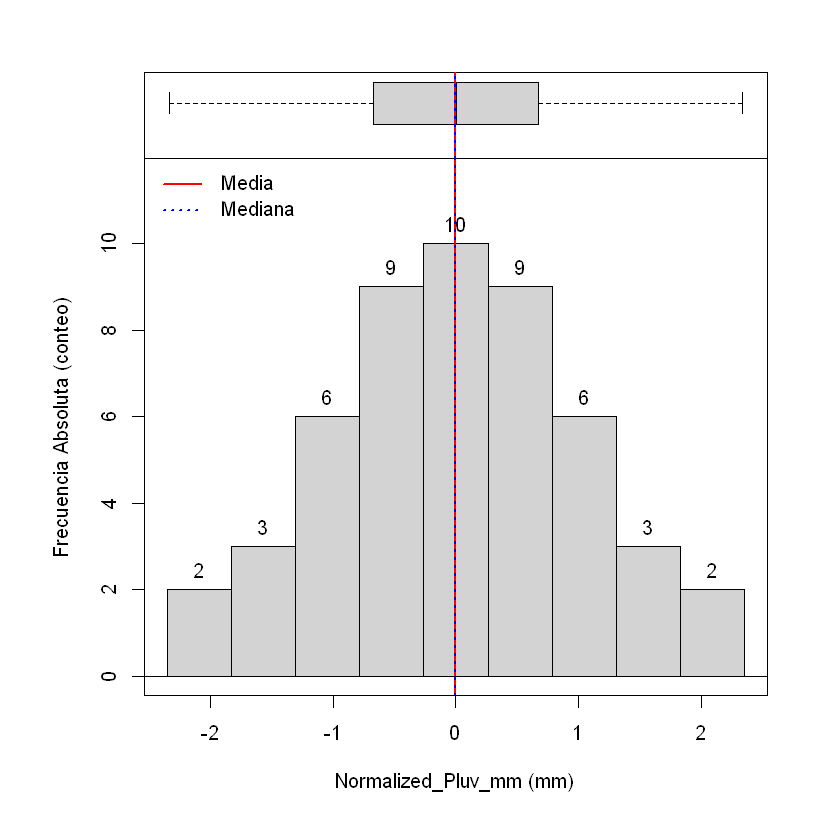

In [178]:
HistBoxplot(x=Normalized_Pluv$nscore, mean = Normalized_Pluv_Stat[5,2], median = Normalized_Pluv_Stat[4,2], main ="",  
            xlab = "Normalized_Pluv_mm (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = nb)

También graficamos la función de distribución acumulativa de las observaciones normalizadas.

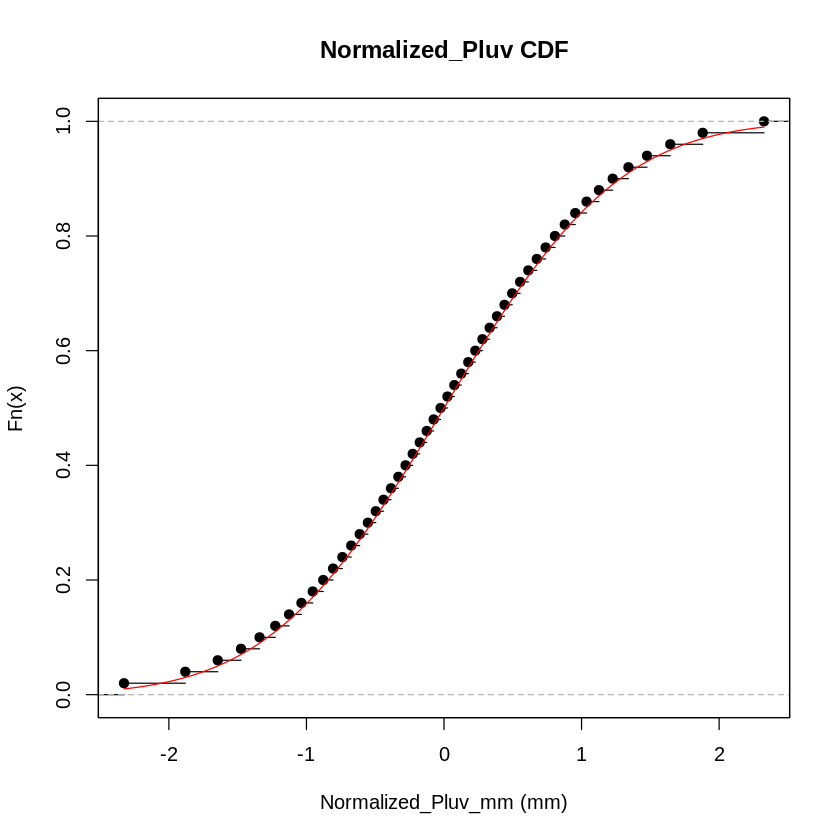

In [251]:
plot(ecdf(Normalized_Pluv$nscore), main="Normalized_Pluv CDF",xlab = "Normalized_Pluv_mm (mm)",
     xlim=c(Normalized_Pluv_Stat[2,2], Normalized_Pluv_Stat[7,2]), ylim=c(0,1))
par(new=TRUE)
curve(pnorm, from = Normalized_Pluv_Stat[2,2], to = Normalized_Pluv_Stat[7,2], 
      ylim=c(0,1),col=("red"),xaxt='n',yaxt='n',ann=FALSE)

Despues debemos hacer el análisis variográfico para saber cuanto cambia el modelo de variograma propuesto.

In [252]:
N_lags <- 10
lag_value <- ((DistMax/2)/N_lags)
Normalized_Pluv_vario_model<- 2
Normalized_Pluv_nugget<- 0.08
Normalized_Pluv_sill_and_nugget<- 1.1
Normalized_Pluv_rank <- 15000

variog: computing omnidirectional variogram


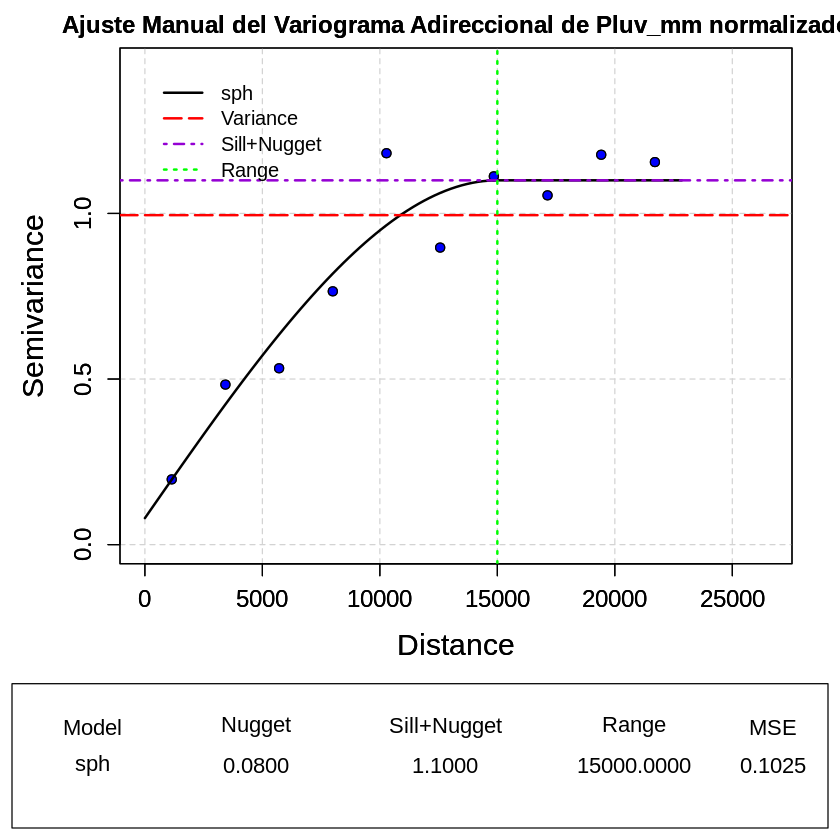

In [253]:
Normalized_Pluv_EyeModelVarioFit<-EyeModel(XCoord, YCoord, 
                                             Normalized_Pluv$nscore, 0, 90, N_lags, lag_value, 1, 
                                             Normalized_Pluv_vario_model, Normalized_Pluv_nugget, 
                                             Normalized_Pluv_sill_and_nugget, Normalized_Pluv_rank,
                                             "Ajuste Manual del Variograma Adireccional de Pluv_mm normalizado")

Si comparamos el modelo de variograma obtenido con las muestras con transformación logarítmica y el modelo de variograma con las muestras normalizadas no tienen gran diferencia. El error del primero es de 0.1135 y el segundo es de 0.1025, ambos casos tienen los mismos valores en sus parámetros. Para confirmar si el modelo es bueno hay que realizar la validación cruzada.

In [254]:
Normalized_Pluv_mm_CrossValid<- CrossValidation(XCoord, YCoord, 
                                         Normalized_Pluv$nscore, Normalized_Pluv_vario_model, 
                                         Normalized_Pluv_nugget, Normalized_Pluv_sill_and_nugget, 
                                         Normalized_Pluv_rank, MaxAnis=0, proporcion=1)
Normalized_Pluv_mm_CrossValid

,X,Y,Z,Z*,Z-Z*
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,485303,2162682,-0.12566135,-0.036030698,-0.089630649
2,484253,2157150,0.87789630,0.614404802,0.263491493
3,487403,2154937,0.43991317,0.491000101,-0.051086936
4,490552,2153830,-0.61281299,-0.429077658,-0.183735333
5,489502,2151601,-0.55338472,-0.260236417,-0.293148302
6,480054,2157142,0.33185335,0.681074572,-0.349221226
7,481104,2154828,0.73884685,0.761316532,-0.022469683
8,483203,2152713,0.95416525,0.957217968,-0.003052715
9,475855,2149399,0.49585035,0.395288476,0.100561871


In [255]:
Normalized_Pluv_mm_CrossValid_Sta<- Val_Estadisticos(Normalized_Pluv_mm_CrossValid[,c(3,4,5)])
Normalized_Pluv_mm_CrossValid_Sta

,Z,Z*,Z-Z*
,<dbl>,<dbl>,<dbl>
No_muestras,50.00000,50.00000,50.00000
Minimo,-2.32635,-1.65343,-1.69403
Cuartil_1er,-0.65907,-0.38554,-0.67950
Mediana,0.00000,-0.00328,-0.01276
Media,0.00000,0.09369,-0.09369
Cuartil_3er,0.65907,0.74189,0.33342
Maximo,2.32635,1.36361,1.39515
Rango,4.65270,3.01704,3.08918
Rango_Intercuartil,1.31814,1.12743,1.01291


Evaluando los estadígrafos podemos notar que la media es cercana a cero y su varianza es de 0.5, incluso si los comparamos con los resultados de la validación cruzada con las muestras con transformación logarítmica es muy similar.

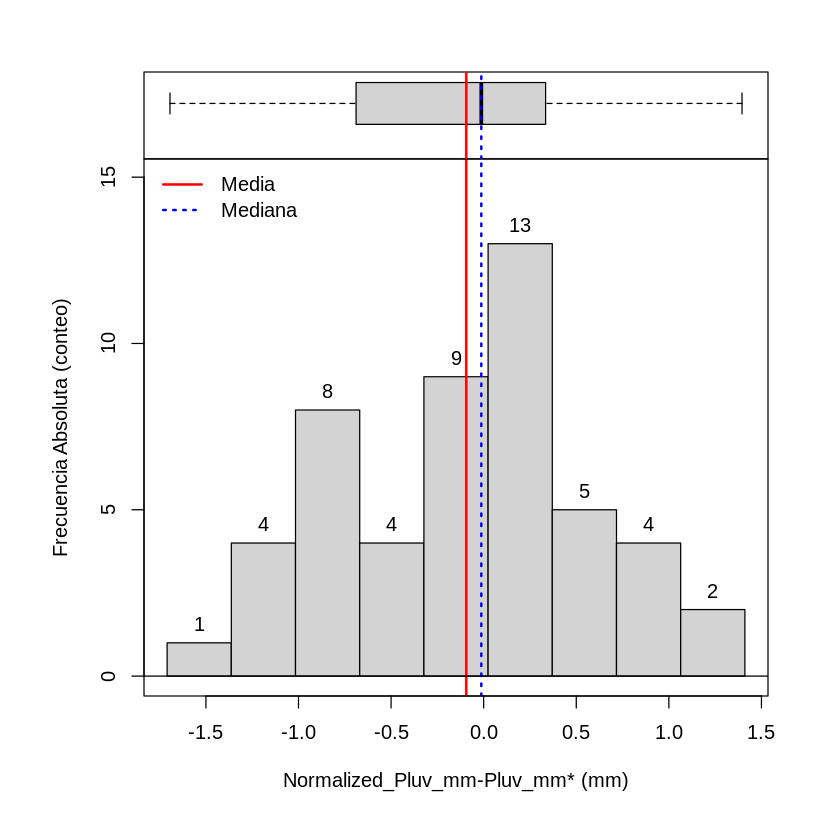

In [256]:
HistBoxplot(x=Normalized_Pluv_mm_CrossValid[,5], mean = Normalized_Pluv_mm_CrossValid_Sta[5,3], 
            median = Normalized_Pluv_mm_CrossValid_Sta[4,3], main ="", 
            xlab = "Normalized_Pluv_mm-Pluv_mm* (mm)", ylab = "Frecuencia Absoluta (conteo)", 
            AbsFreq = TRUE, PercentFreq = FALSE )

Respecto al histograma podemos ver que aparentemente no hay valores atípicos. Sin embargo, al analizar el grafico de la distribución espacial podemos notar que los valores atípicos espaciales son los mismos que los reportados con la transformación logarítmica.

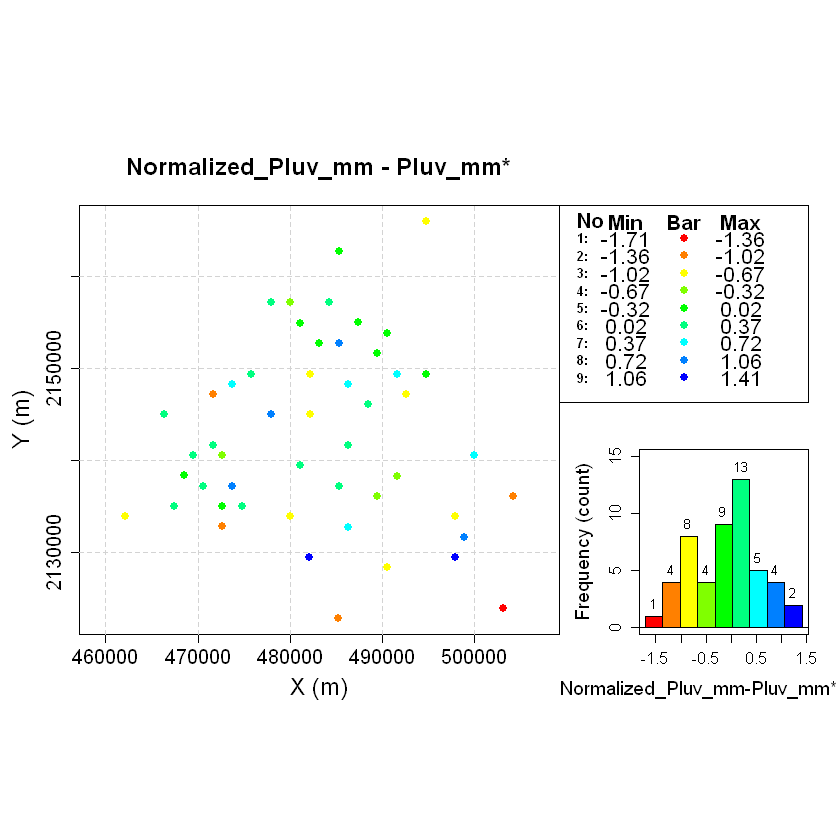

In [179]:
DEspacial(Normalized_Pluv_mm_CrossValid[,1], Normalized_Pluv_mm_CrossValid[,2], Normalized_Pluv_mm_CrossValid[,5],
          n_bins=9,'X (m)', 'Y (m)', 'Normalized_Pluv_mm-Pluv_mm* (mm)', 'Normalized_Pluv_mm - Pluv_mm*')

In [258]:
# Pluv_mm_Log is the independent variable
X<-Normalized_Pluv_mm_CrossValid[,3] # the same as Pluv_mm_Log
# Pluv_mm_Log* is the dependent variable
Y<-Normalized_Pluv_mm_CrossValid[,4]

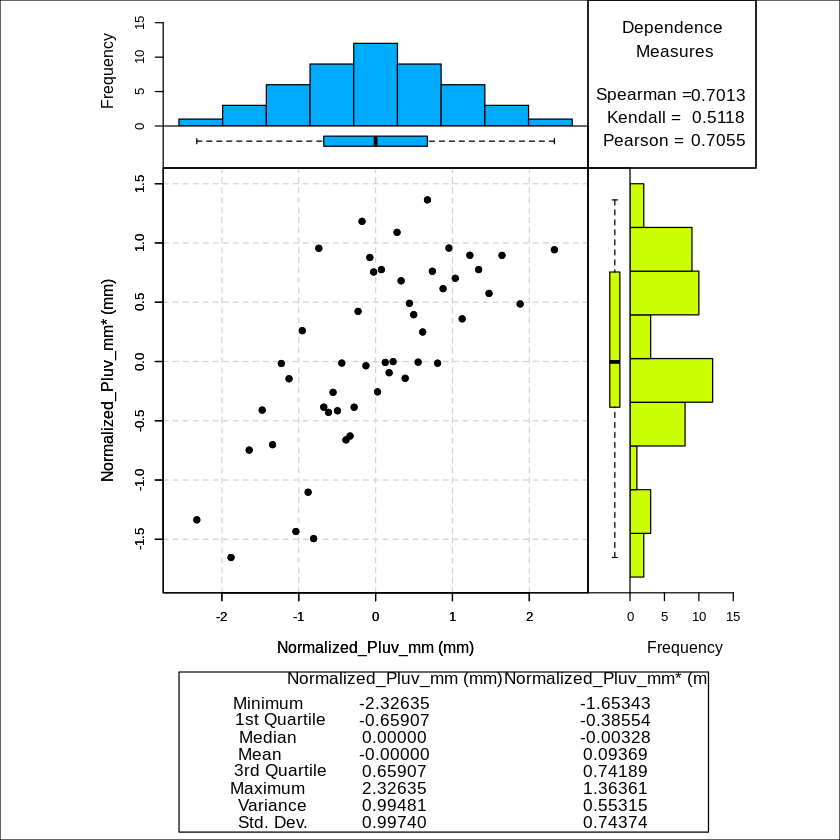

In [259]:
Normalized_Pluv_mm_CrossValid_stat <- Estadisticas(Normalized_Pluv_mm_CrossValid[,4])

ScatterPlot(Normalized_Pluv$nscore, Normalized_Pluv_mm_CrossValid[,4], 9, 
            Xmin = Normalized_Pluv_Stat[2,2], Xmax = Normalized_Pluv_Stat[7,2], 
            Ymin = Normalized_Pluv_mm_CrossValid_stat[2,2],Ymax = Normalized_Pluv_mm_CrossValid_stat[7,2], 
            XLAB = "Normalized_Pluv_mm (mm)", YLAB = "Normalized_Pluv_mm* (mm)")

Respecto a los resultados del scatterplot entre la muestra normalizada y la estimada por kriging durante la validación cruzada tiene valores de dependencia muy similares al reportado con la transformación logarítmica.

Ya que tenemos el modelo de variograma podemos hacer la simulación condicional. Para implementar la simulación se usa la función "SGS". Esta función se estructura de la siguiente forma: 

* Las coordenadas (CoorX, CoorY), la variable a usar (Prop1) que en este caso son las muestras obtenidas de los pluviómetros con transformación logarítmica (Pluv_mm_Log)

* La información del variograma, que en este caso es el modelo (Pluv_mm_Log_vario_model), valor del nugget (Pluv_mm_Log_nugget), valor de la meseta más el nugget (Pluv_mm_Log_sill_and_nugget) y el alcance (Pluv_mm_Log_rank)

* El número de puntos mínimo (minPoints) y máximo (maxPoints) que previamente establecimos.

* Definimos el tamaño del espacio de trabajo. Para el eje X usamos (Xmin, Xmax) y para el eje Y usamos (Ymin, Ymax), estos valores los encontramos en los estadígrafos que calculamos de las coordenadas.

* Establecemos el tamaño de la celda, esto lo hacemos con las variables (TX,TY), como podemos observar, el tipo de celda en la siguiente función está determinada por la distancia mínima "DistMin" en ambas direcciones para que obtengamos celdas cuadradas ya que esa es la resolución mínima que tenemos. Si lo deseamos podemos poner diferentes distancias, sin embargo, se debe justificar esa decisión, ya que podríamos causar la creación de artefactos.

* Se indica el tipo de transformación que tiene la variable (InvT). Dado que la variable tiene transformación normal solo se asigna 0.

* Las leyendas del gráfico: para el eje X (NameX), para el eje Y "NameY" y el título de la imagen resultante de la simulación "Titulo1".

* Por último, indicamos el número de simulaciones que deseamos calcular (n_sim)


drawing 10 GLS realisations of beta...
[using conditional Gaussian simulation]


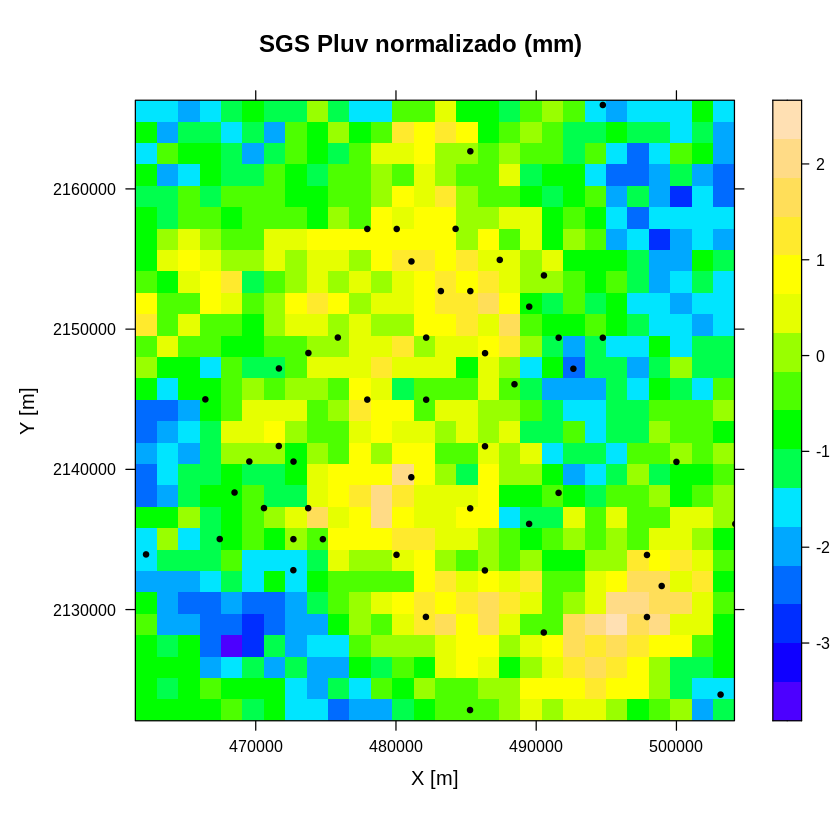

In [260]:
Normalized_Pluv_SGS <- SGS(XCoord, YCoord, 
                             Prop1 = Normalized_Pluv$nscore, Modelo = Normalized_Pluv_vario_model, Nugget = Normalized_Pluv_nugget, 
                             SillYNugget = Normalized_Pluv_sill_and_nugget, Alcance = Normalized_Pluv_rank,
                             minPar = minPoints, maxPar = maxPoints, 
                             Xmin = XCoord_Stat[2,2], Xmax = XCoord_Stat[7,2], 
                             Ymin = YCoord_Stat[2,2], Ymax = YCoord_Stat[7,2], 
                             TX=DistMin, TY=DistMin, InvT=0, NameX="X [m]", 
                             NameY="Y [m]", Titulo1="SGS Pluv normalizado (mm)", n_sim = 10)

Si ejecutamos el vector "Normalized_Pluv_SGS" podemos ver que su estructura esta distribuida de la siguiente forma: las dos primeras columnas contienen las coordenadas de las muestras simuladas y a partir de la tercera columna tenemos las simulaciónes, en este caso se hicieron 10.

In [261]:
Normalized_Pluv_SGS

,Var1,Var2,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10
1,462178.0,2122836,-0.66299105,-0.8623175025,0.43215951,-2.52753901,-1.19335377,-0.4315005,-0.9006367,-0.50143337,-1.317278266,0.02539632
2,463703.8,2122836,-0.62352318,-0.2331287116,-0.11634643,-2.77805448,-1.98672140,-0.3460704,-0.5205204,-0.39295018,-1.560826063,-1.22304380
3,465229.6,2122836,-0.94393462,-0.1454488039,-0.78333366,-3.27597833,-1.82643652,-1.0365682,-0.3754648,-0.85980320,-1.217267752,-1.06547368
4,466755.4,2122836,-0.84493256,-0.6005839705,-1.42271006,-2.97451234,-1.09744942,-1.7997661,-1.2179853,-1.41486204,-1.253554702,-1.81762946
5,468281.2,2122836,-0.40814364,0.2467078567,-2.06416965,-3.23289490,-1.05820143,-1.8974713,-1.1238300,-1.42221272,-0.893636405,-1.25342858
6,469807.0,2122836,-1.32952034,-0.3239098489,-1.15473807,-3.13896084,-1.56942105,-1.3745326,-0.9962589,-0.60932386,-0.825295448,-1.36861587
7,471332.8,2122836,-0.59410715,-0.6116937399,-1.53655005,-2.71978426,-1.27345097,-1.5670389,-0.1888343,-1.07281864,-0.727846742,0.04379145
8,472858.6,2122836,-1.57488728,0.3948004246,-1.06966329,-3.30156374,-0.82314223,-2.3569682,-0.4962820,-0.32161966,-1.071304917,0.09282583
9,474384.4,2122836,-1.64972818,-1.1044524908,-0.77907926,-1.87534153,-0.14211869,-2.2856016,-1.2509035,0.40333429,0.107270822,-0.08084378
10,475910.2,2122836,-2.40519738,-1.0904313326,-1.16386724,-1.43611860,-0.63454801,-2.3788283,-1.3915793,-0.24077427,0.155062586,0.26177603


Obtenemos el variograma resultante de una de las simulaciones para comprobar que la simulación se basa en el modelo de variograma propuesto.

variog: computing omnidirectional variogram


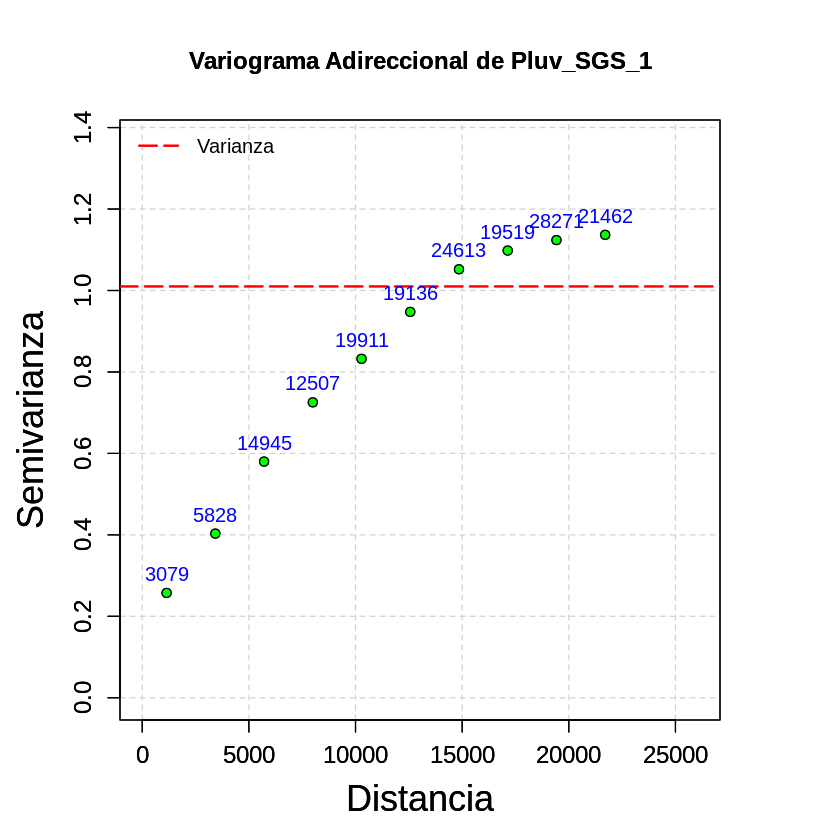

In [262]:
Pluv_SGS_1_Log_VarioEstimation<-Variograma(Normalized_Pluv_SGS[,1], Normalized_Pluv_SGS[,2], 
                                           Normalized_Pluv_SGS[,3], 0, 90, 1*N_lags, lag_value, 1, 
                                           "Variograma Adireccional de Pluv_SGS_1")

In [263]:
SGS_Pluv_vario_model<- 2
SGS_Pluv_nugget<- 0.08
SGS_Pluv_sill_and_nugget<- 1.1
SGS_Pluv_rank <- 15000

variog: computing omnidirectional variogram


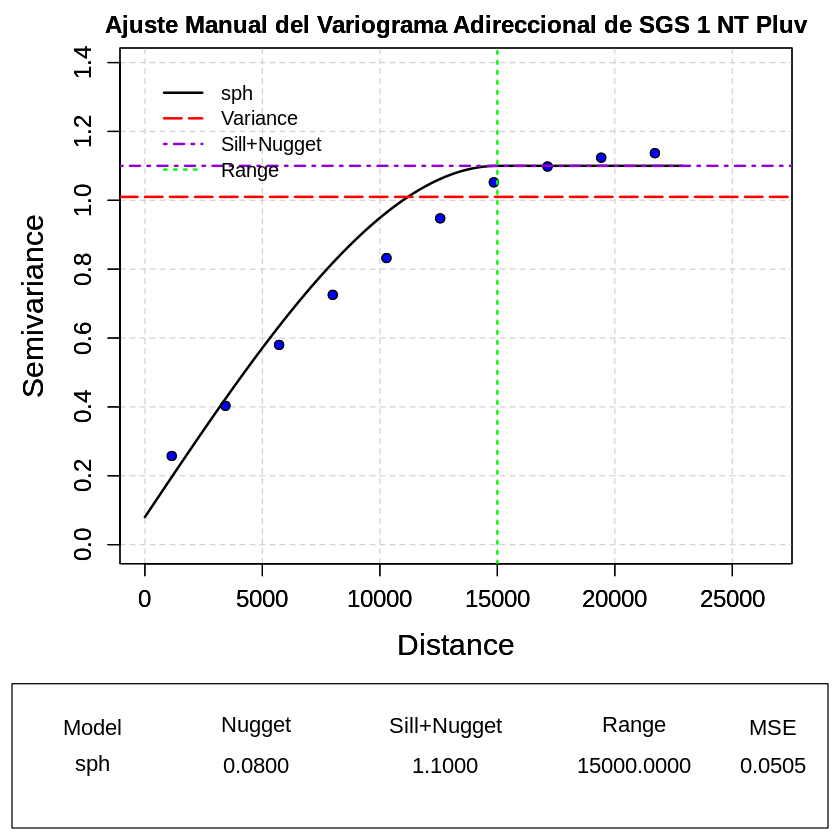

In [264]:
Pluv_SGS_1_EyeModelVarioFit<-EyeModel(Normalized_Pluv_SGS[,1], Normalized_Pluv_SGS[,2], 
                                      Normalized_Pluv_SGS[,3], 0, 90, N_lags, lag_value, 1, 
                                      SGS_Pluv_vario_model, SGS_Pluv_nugget, SGS_Pluv_sill_and_nugget, 
                                      SGS_Pluv_rank,
                                      "Ajuste Manual del Variograma Adireccional de SGS 1 NT Pluv")

Ya que tenemos las simulaciones hay que invertir los valores simulados para obtener los resultados en el dominio original. para esto usamos la función "backtr", esta nos pide los siguientes requisitos:

* El vector con las muestras simuladas
* Las muestras normalizadas
* Indicar si la función tiene cola (tails)
* Indicar si se requiere el grafico de la distribución acumulativa, si el valor es TRUE se mostrará un gráfico con las muestras transformadas

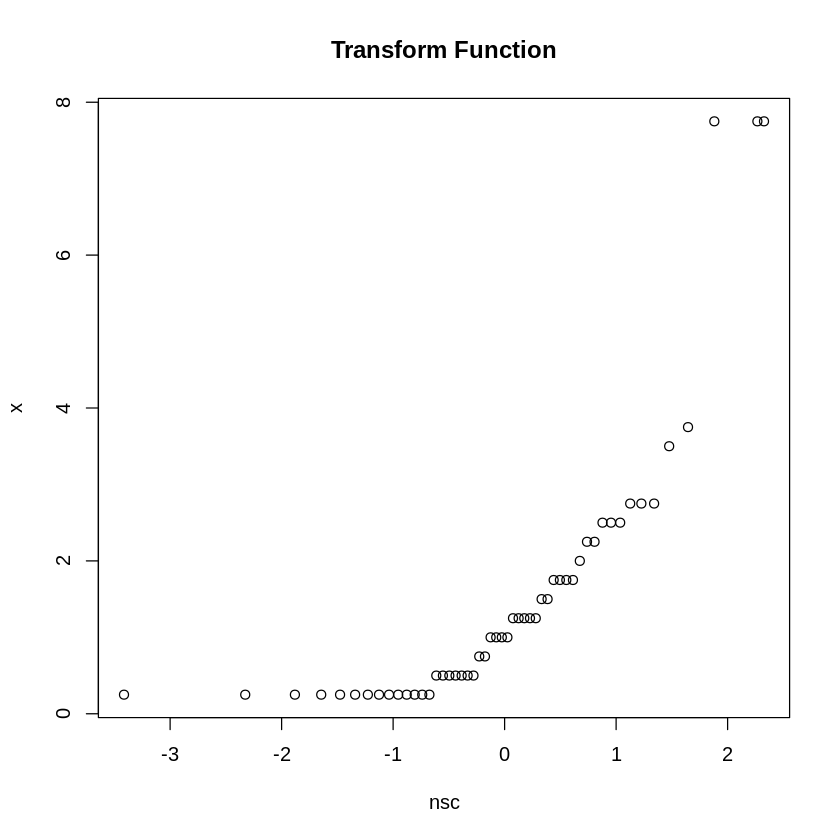

In [265]:
Pluv_SGS_1 <- backtr(Normalized_Pluv_SGS[,3], Normalized_Pluv, tails='none', draw=TRUE)

Ya que tenemos las muestras en el dominio original podemos obtener su estadígrafos e histograma, los cuales podemos comparar con las muestras originales:

In [266]:
Pluv_SGS_1_Stat <- Estadisticas(Pluv_SGS_1)
Pluv_SGS_1_Stat  # estadígrafos de la simulación 1
Pluv_mm_Stat  #estadígrafos originales

,Statistics,Values
,<chr>,<dbl>
muestras,n,812.0000
minimos,Minimum,0.2500
cuantiles1,1st. Quartile,0.2500
medianas,Median,0.5000
medias,Mean,1.0258
cuantiles3,3rd. Quartile,1.5000
maximos,Maximum,7.7500
rangos,Rank,7.5000
rangosInt,Interquartile Rank,1.2500


,Statistics,Values
,<chr>,<dbl>
muestras,n,50.0000
minimos,Minimum,0.2500
cuantiles1,1st. Quartile,0.3125
medianas,Median,1.0000
medias,Mean,1.4700
cuantiles3,3rd. Quartile,1.9375
maximos,Maximum,7.7500
rangos,Rank,7.5000
rangosInt,Interquartile Rank,1.6250


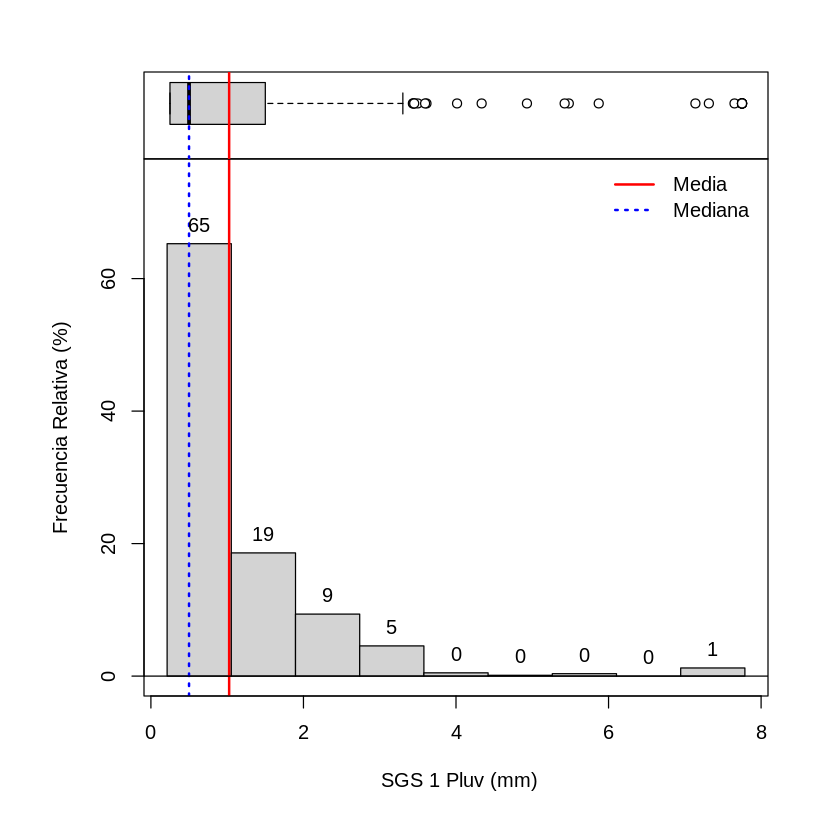

In [267]:
HistBoxplot(x=Pluv_SGS_1, mean = Pluv_SGS_1_Stat[5,2], median = Pluv_SGS_1_Stat[4,2], main ="", 
            xlab = " SGS 1 Pluv (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin =nb)

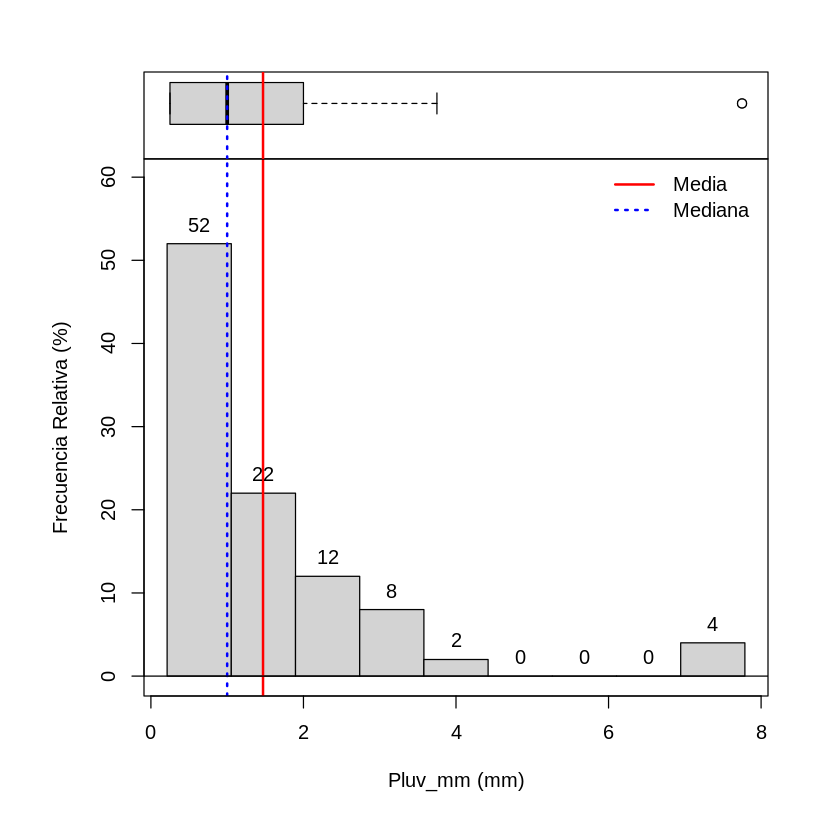

In [268]:
HistBoxplot(x=Pluv_mm, mean = Pluv_mm_Stat[5,2], median = Pluv_mm_Stat[4,2], main ="", 
            xlab = "Pluv_mm (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin =nb)

Comparando los estadígrafos podemos ver que son muy similares, respecto al histograma su forma es muy similar, salvo por las muestras ubicadas a la derecha. 

Para graficar la simulación 1 usamos el grafico "spplot", el cual necesita lo siguiente:

* Los vectores de las coordenadas y la simulación en formato de tabla (dataframe)
* La variable simulada (c(variable simulada)), esta variable debe estar nombrada.
* Títulos (Titulo1) y nombres de los ejes (NameX, NameY)
* Paleta de colores (col.regions)
* Barra de escalas (scales)
* Ubicación de las muestras condicionantes (sp.layout)

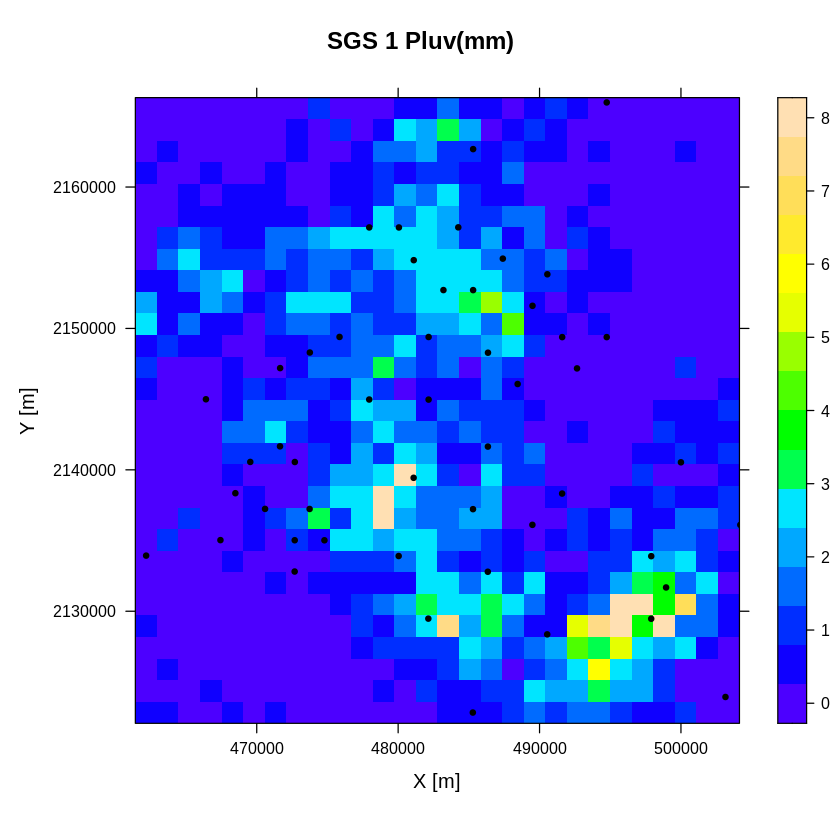

In [269]:
DatosOrg <- as.data.frame(cbind(XCoord, YCoord, Pluv_mm))
colnames(DatosOrg) <- c("X", "Y", "V1")
coordinates(DatosOrg) <- ~X + Y
Salida <- as.data.frame(cbind(Normalized_Pluv_SGS[,1], Normalized_Pluv_SGS[,2], Pluv_SGS_1))
Salida1<-Salida
gridded(Salida) <- ~V1+V2
NameX="X [m]" 
NameY="Y [m]"
Titulo1="SGS 1 Pluv(mm)"
spplot(Salida, c("Pluv_SGS_1"), main=Titulo1, xlab = NameX , ylab = NameY , col.regions=topo.colors,
       do.log = TRUE,
       key.space=list(x = 0.1, y = 0.95, corner = c(0, 1)),
       scales=list(draw = TRUE),
       sp.layout = list("sp.points", DatosOrg, pch = 20, col = "black"))

También necesitamos la distribución espacial de la media, desviación estándar y cuantiles de las 10 simulaciones. Eso lo hacemos de la siguiente forma:

Primero obtenemos la transformada inversa de las 10 simulaciones usando el siguiente ciclo

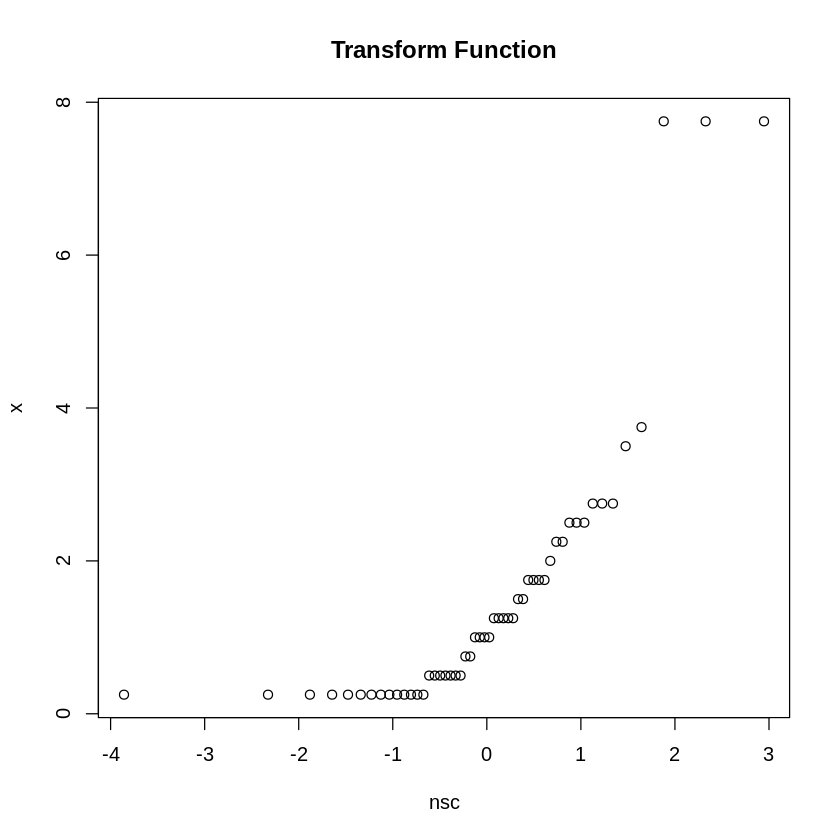

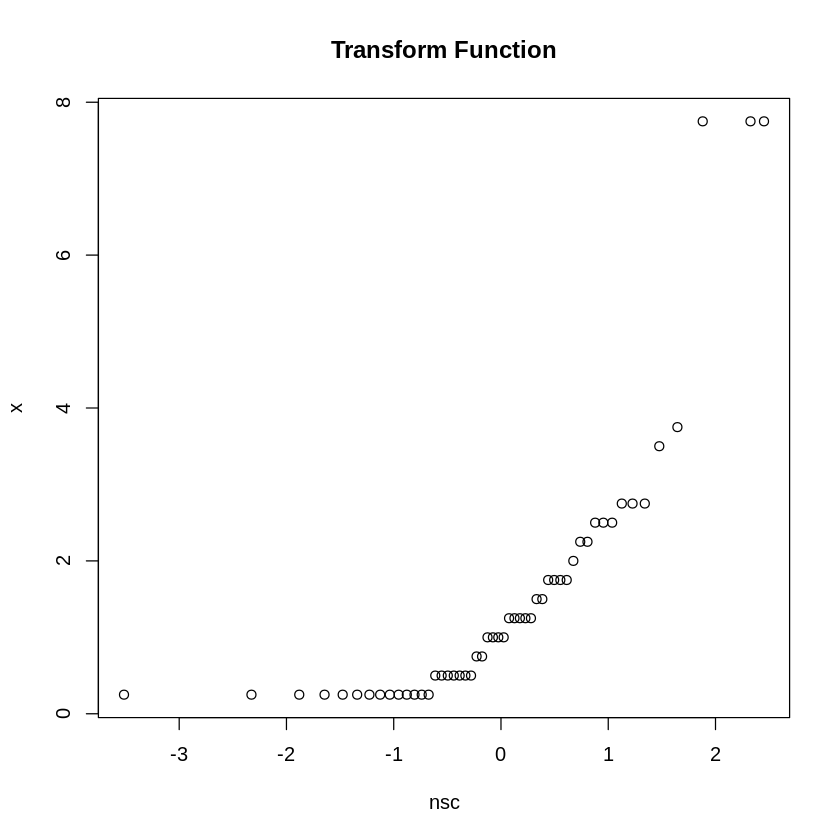

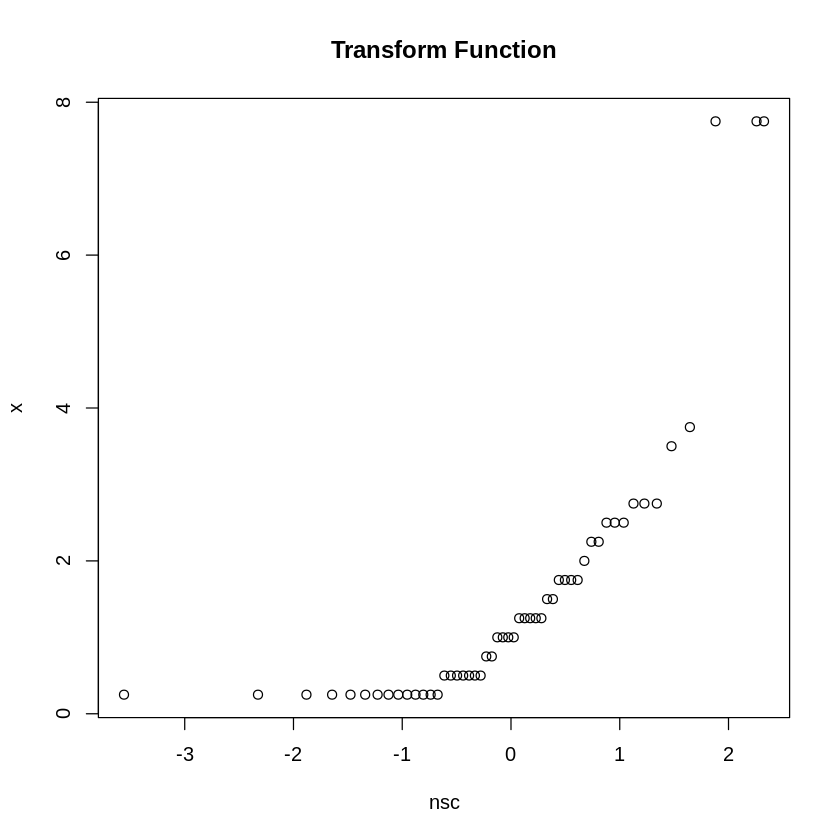

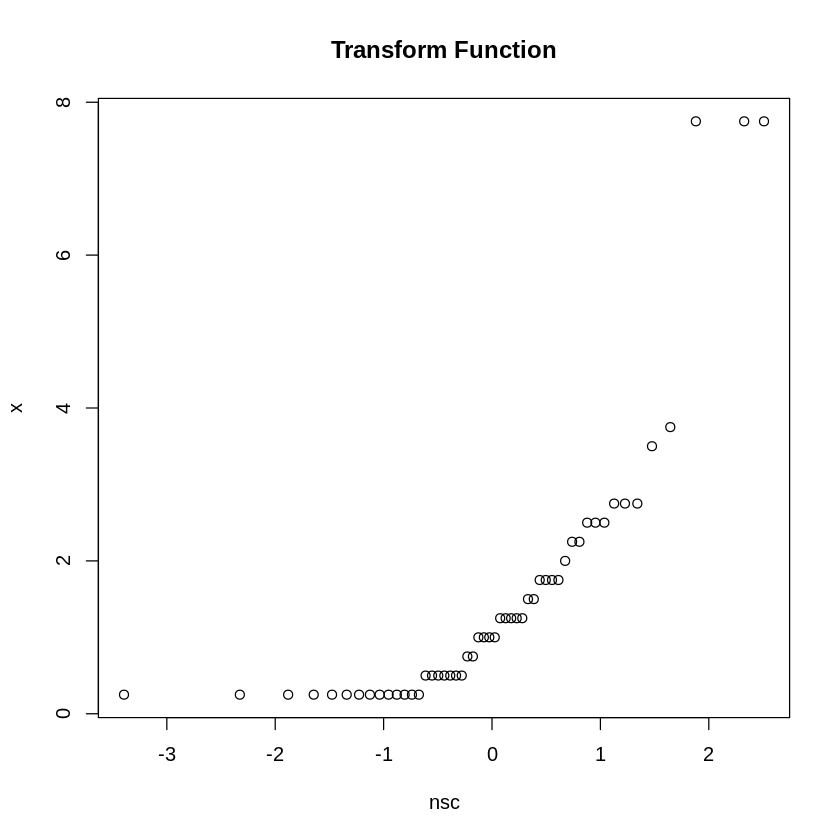

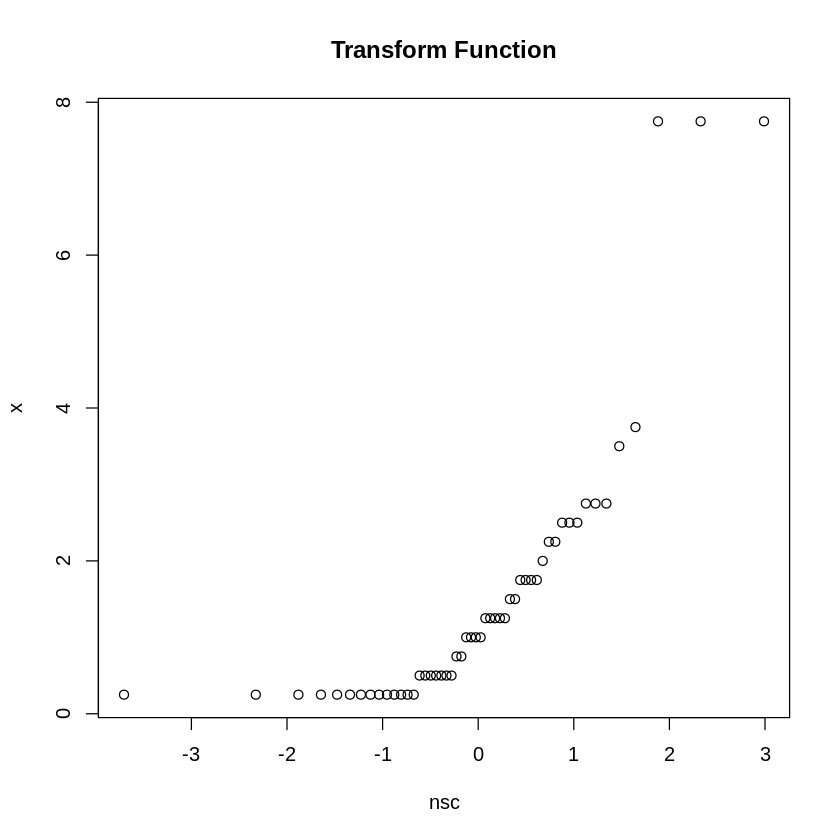

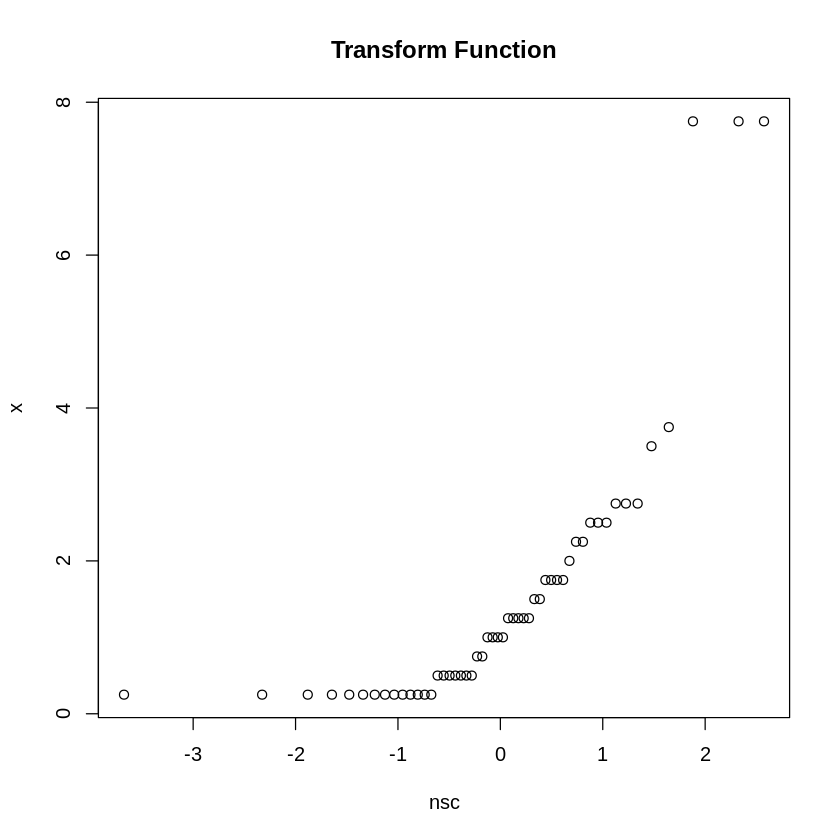

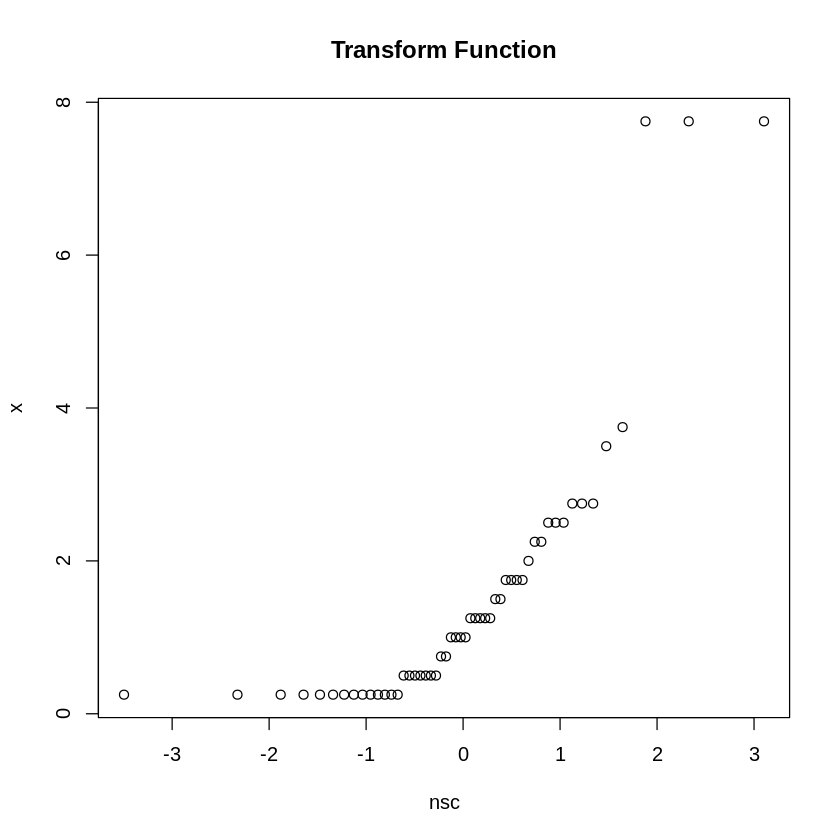

ERROR: Error in Normalized_Pluv_SGS[, i]: subscript out of bounds


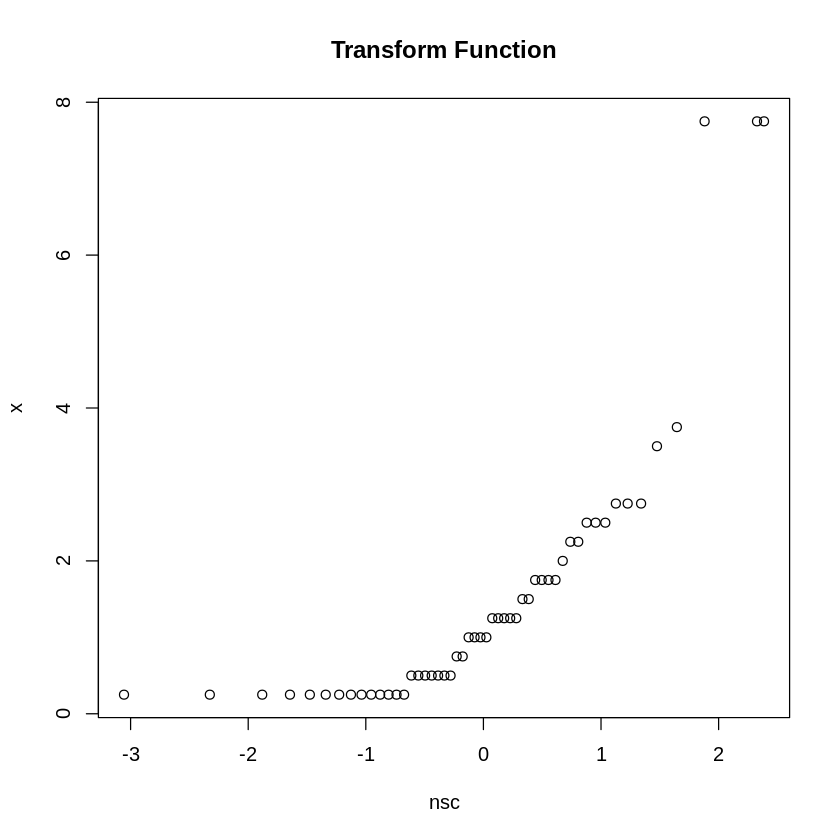

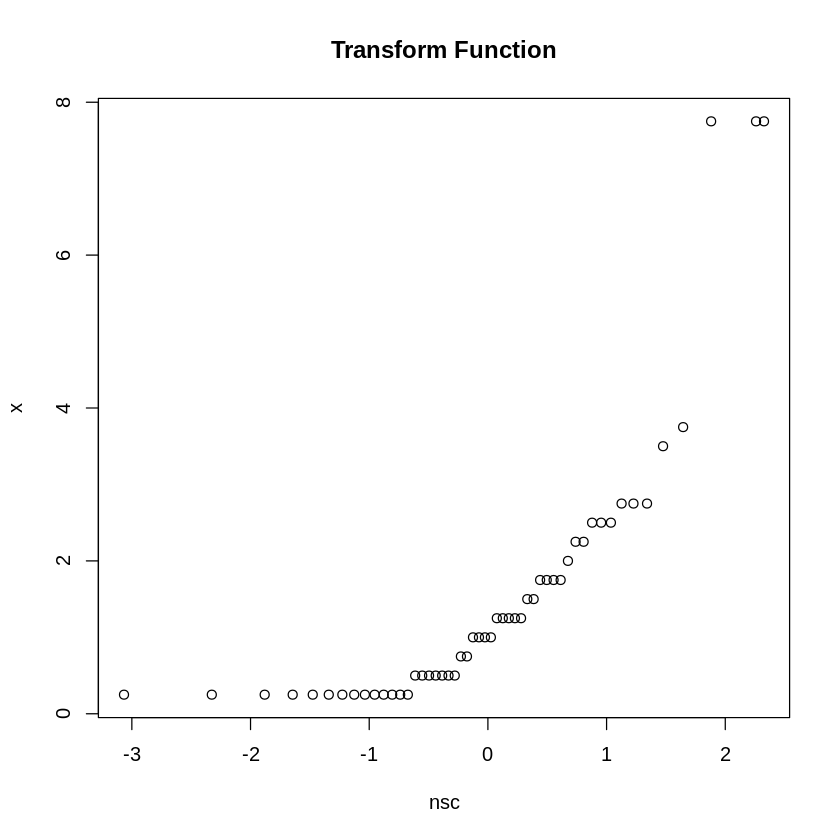

In [270]:
Pluv_SGS_nsim = Pluv_SGS_1
for (i in seq(from= 4, to = 102, by =1)) {
  sim_back = backtr(Normalized_Pluv_SGS[,i], Normalized_Pluv, tails='none', draw=TRUE)
  Pluv_SGS_nsim = cbind(Pluv_SGS_nsim, sim_back)
}

Para obtener el promedio de la propiedad estadística que nos interesa usamos la función "apply"

In [271]:
Pluv_SGS_nsim_mean <- apply(Pluv_SGS_nsim, 1, mean)
Pluv_SGS_nsim_sd <- apply(Pluv_SGS_nsim, 1, sd)
Pluv_SGS_nsim_quantiles <- apply(Pluv_SGS_nsim, 1, quantile)
Pluv_SGS_nsim_range <- Pluv_SGS_nsim_quantiles[5,] - Pluv_SGS_nsim_quantiles[1,]

In [272]:
Pluv_SGS_nsim_mean_Stat <- Estadisticas(Pluv_SGS_nsim_mean)
Pluv_SGS_nsim_mean_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,812.0000
minimos,Minimum,0.2500
cuantiles1,1st. Quartile,0.5000
medianas,Median,0.8615
medias,Mean,1.1953
cuantiles3,3rd. Quartile,1.6499
maximos,Maximum,5.7964
rangos,Rank,5.5464
rangosInt,Interquartile Rank,1.1499


In [273]:
Pluv_SGS_nsim_sd_Stat <- Estadisticas(Pluv_SGS_nsim_sd)
Pluv_SGS_nsim_sd_Stat

,Statistics,Values
,<chr>,<dbl>
muestras,n,812.0000
minimos,Minimum,0.0000
cuantiles1,1st. Quartile,0.3872
medianas,Median,0.6519
medias,Mean,0.7858
cuantiles3,3rd. Quartile,0.9233
maximos,Maximum,2.8635
rangos,Rank,2.8635
rangosInt,Interquartile Rank,0.5361


Para obtener el mapa usamos la función "spplot", los parámetros son los mismos, solo cambia el vector que nos interesa, en este caso es la media.

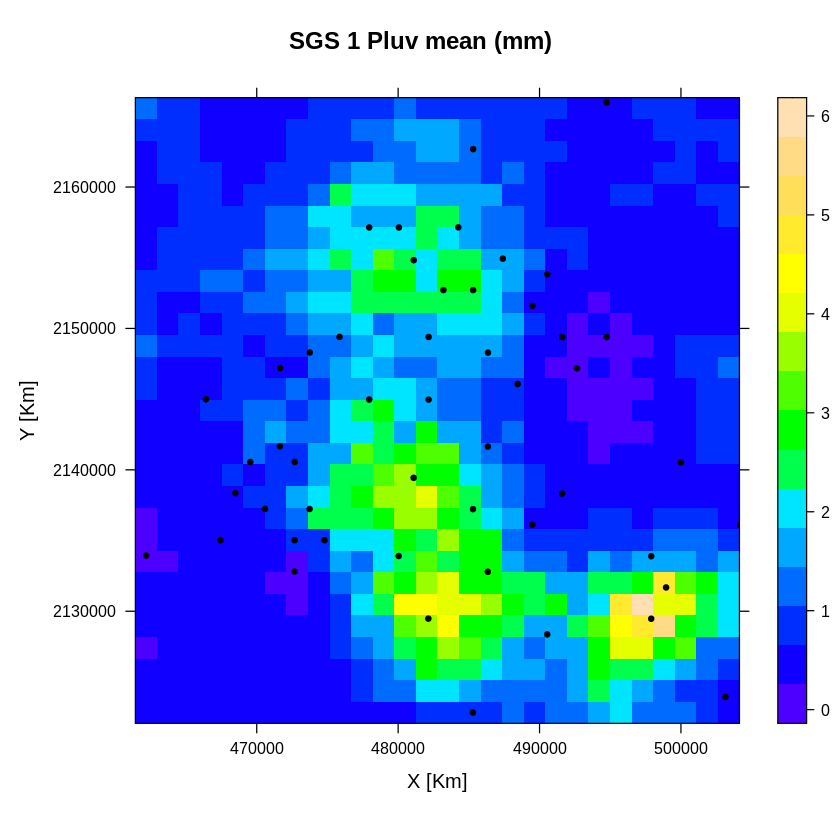

In [274]:
DatosOrg <- as.data.frame(cbind(XCoord, YCoord, Pluv_mm))
colnames(DatosOrg) <- c("X", "Y", "V1")
coordinates(DatosOrg) <- ~X + Y
Salida <- as.data.frame(cbind(Normalized_Pluv_SGS[,1], Normalized_Pluv_SGS[,2], Pluv_SGS_nsim_mean))
Salida1<-Salida
gridded(Salida) <- ~V1+V2
NameX="X [Km]" 
NameY="Y [Km]"
Titulo1="SGS 1 Pluv mean (mm)"
spplot(Salida, c("Pluv_SGS_nsim_mean"), main=Titulo1, xlab = NameX , ylab = NameY , col.regions=topo.colors,
       do.log = TRUE,
       key.space=list(x = 0.1, y = 0.95, corner = c(0, 1)),
       scales=list(draw = TRUE),
       sp.layout = list("sp.points", DatosOrg, pch = 20, col = "black"))

Para obtener el mapa de la desviación estándar usamos las siguientes instrucciones:

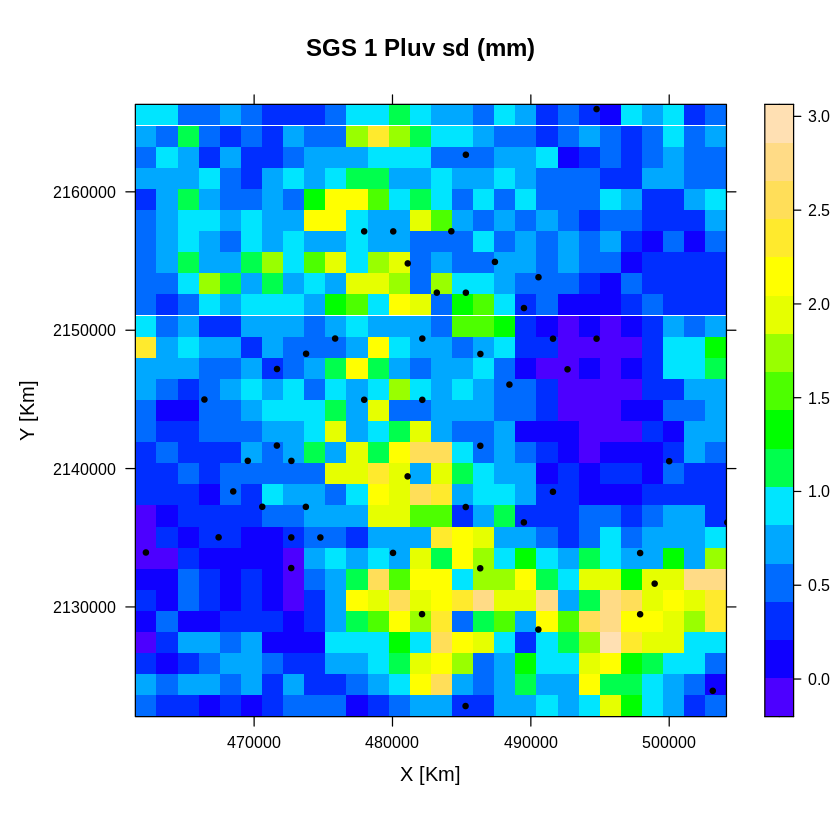

In [275]:
DatosOrg <- as.data.frame(cbind(XCoord, YCoord, Pluv_mm))
colnames(DatosOrg) <- c("X", "Y", "V1")
coordinates(DatosOrg) <- ~X + Y
Salida <- as.data.frame(cbind(Normalized_Pluv_SGS[,1], Normalized_Pluv_SGS[,2], Pluv_SGS_nsim_sd))
Salida1<-Salida
gridded(Salida) <- ~V1+V2
NameX="X [Km]" 
NameY="Y [Km]"
Titulo1="SGS 1 Pluv sd (mm)"
spplot(Salida, c("Pluv_SGS_nsim_sd"), main=Titulo1, xlab = NameX , ylab = NameY , col.regions=topo.colors,
       do.log = TRUE,
       key.space=list(x = 0.1, y = 0.95, corner = c(0, 1)),
       scales=list(draw = TRUE),
       sp.layout = list("sp.points", DatosOrg, pch = 20, col = "black"))

y del rango es el siguiente:

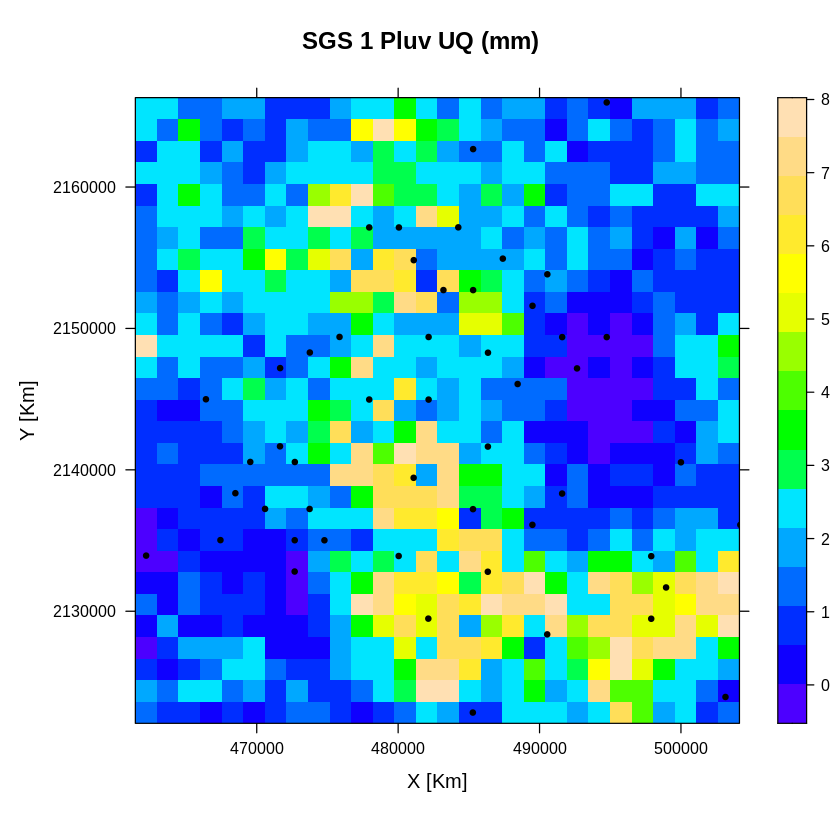

In [276]:
DatosOrg <- as.data.frame(cbind(XCoord, YCoord, Pluv_mm))
colnames(DatosOrg) <- c("X", "Y", "V1")
coordinates(DatosOrg) <- ~X + Y
Salida <- as.data.frame(cbind(Normalized_Pluv_SGS[,1], Normalized_Pluv_SGS[,2], Pluv_SGS_nsim_range))
Salida1<-Salida
gridded(Salida) <- ~V1+V2
NameX="X [Km]" 
NameY="Y [Km]"
Titulo1="SGS 1 Pluv UQ (mm)"
spplot(Salida, c("Pluv_SGS_nsim_range"), main=Titulo1, xlab = NameX , ylab = NameY , col.regions=topo.colors,
       do.log = TRUE,
       key.space=list(x = 0.1, y = 0.95, corner = c(0, 1)),
       scales=list(draw = TRUE),
       sp.layout = list("sp.points", DatosOrg, pch = 20, col = "black"))

Para obtener el resultado de las 10 simulaciones debemos promediarlas y después estimar el variograma y generar los gráficos de pixel igual que el caso de una simulación.

Con este último ejercicio se concluye este trabajo, en caso de tener dudas por favor comunícate con los instructores.

In [85]:
save.image() #important line, this is for save the R workspace, this include variables and results

Bibliografia

Diaz-Viera, Martin & Herrera-Zamarrón, Graciela Del Socorro & Valdes-Manzanilla, Arturo. (2009). A Linear Coregionalization Model For Spatial Rainfall Estimation In The Mexico City Valley Combining Rain Gages Data And Meteorological Radar Images. Ingeniería hidráulica en México. XXIV. 63-90. 

KRAJEWSKI, W.F. Cokriging radar-rainfall and rain gage data.J. Geophys. Res. Vol. 92, 1987, pp. 9571-9580.